In [3]:
pip install xlrd;

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
pip install openpyxl;

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
pip install xlsxwriter;

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [6]:
import pandas as pd;
import numpy as np;
from matplotlib import pyplot as plt;
from matplotlib import dates as mdate;
import seaborn as sn;
import datetime;
import itertools;

In [7]:
pd.set_option('display.max_columns',999, 'display.max_rows',999)

In [8]:
df = pd.read_excel(io='ParkingDataCorrected_DailyDemandCharts.xlsx', sheet_name='ParkingDataDayLevelTable');

In [9]:
df['CommericalOfficeAtAboveFloorsArea_ksqft'] = df['NonFreightIntensiveTotalArea_ksqft']-df['NonFreightIntensiveAtGFArea_ksqft']
print('df shape is', df.shape)
df.head()

df shape is (336, 60)


BuildingID                  Address  NumberOfFloors  GroundFloorArea_sqft  \
0           1  1025 Connecticut Ave NW              10                 30467   
1           1  1025 Connecticut Ave NW              10                 30467   
2           1  1025 Connecticut Ave NW              10                 30467   
3           1  1025 Connecticut Ave NW              10                 30467   
4           1  1025 Connecticut Ave NW              10                 30467   

   GroundFloorArea_ksqft  AverageAreaOfFloorsAboveGroundFloor_sqft  \
0                 30.467                                     30467   
1                 30.467                                     30467   
2                 30.467                                     30467   
3                 30.467                                     30467   
4                 30.467                                     30467   

   AverageAreaOfFloorsAboveGroundFloor_ksqft  TotalPerimeter_ft  \
0                                     30.467                716   
1                                     30.467                716   
2                                     30.467                716   
3                                     30.467                716   
4                                     30.467                716   

   NonSharingPerimeter_ft  SharingPerimeter_ft  \
0                     431                  285   
1                     431                  285   
2                     431                  285   
3                     431                  285   
4                     431                  285   

   PercentageOfPerimeterShared_Percent  NumberOfSharedSidesWithBuildings  \
0                                 39.8                                 1   
1                                 39.8                                 1   
2                                 39.8                                 1   
3                                 39.8                                 1   
4                                 39.8                                 1   

  InBlockLocation  NumberOfEntrances  NumberOfLoadingDocks  \
0          Corner                  2                     1   
1          Corner                  2                     1   
2          Corner                  2                     1   
3          Corner                  2                     1   
4          Corner                  2                     1   

   OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  NumberOfSupermarket  \
0                                    320             164                    0   
1                                    320             164                    0   
2                                    320             164                    0   
3                                    320             164                    0   
4                                    320             164                    0   

   NumberOfRetailAndOthers  NumberOfAccomodationAndFood  \
0                        5                            2   
1                        5                            2   
2                        5                            2   
3                        5                            2   
4                        5                            2   

   NumberOfFreightIntensive  NumberOfNonFreightIntensiveAtGF  \
0                         7                                2   
1                         7                                2   
2                         7                                2   
3                         7                                2   
4                         7                                2   

   SupermarketPerimeterPercentage  RetailAndOthersPerimeterPercentage  \
0                             0.0                                39.1   
1                             0.0                                39.1   
2                             0.0                                39.1   
3                             0.0               

In [10]:
df_buildingChar = df.drop(columns=['Weekday','WeekdayOrWeekend','VehicleTypePurpose','ObservedNumberOfVehiclesPerDay',\
                                   'AdditionalEstimatedNumberOfVehiclesPerDay','NumberOfVehiclesPerDay',\
                                  'GroundFloorArea_sqft','AverageAreaOfFloorsAboveGroundFloor_sqft',\
                                   'SupermarketArea_sqft', 'RetailAndOthersArea_sqft', 'AccomodationAndFoodArea_sqft',\
                                   'NonFreightIntensiveAtGFArea_sqft', 'ResidentialAreaTotal_sqft', 'NonFreightIntensiveTotalArea_sqft',\
                                   'SupermarketAreaPerEmployee_sqftperemployee', 'RetailAndOthersAreaPerEmployee_sqftperemployee',\
                                   'AccomodationAndFoodAreaPerEmployee_sqftemployee', 'NonFreightIntensiveAreaPerEmployee_sqftperemployee','MetroAccessAdjacent',\
                                  'NumberOfSupermarketEmployee', 'NumberOfRetailAndOthersEmployee', 'NumberOfAccomodationAndFoodEmployee',\
                                            'NumberOfNonFreightIntensiveAtGFEmployee', 'NumberOfNonFreightIntensiveEmployeeTotal',\
                                  'AverageAreaOfFloorsAboveGroundFloor_ksqft','NonSharingPerimeter_ft','PercentageOfPerimeterShared_Percent',\
                                  'NumberOfSharedSidesWithBuildings','InBlockLocation','NumberOfEntrances', 'SupermarketPerimeterPercentage','RetailAndOthersPerimeterPercentage',\
                                   'AccomodationAndFoodPerimeterPercentage','NonFreightIntensiveAtGFPerimeterPercentage','ResidentialUnitsAtAboveFloors',\
                                   'NumberOfFreightIntensive','CommercialOfficeAtAboveFloors',\
                                  'NumberOfNonFreightIntensiveTotal','NonFreightIntensiveTotalArea_ksqft']).drop_duplicates();
df_buildingChar.reset_index(drop=True, inplace=True)
print('df_buildingChar shape is',df_buildingChar.shape)
df_buildingChar.head()

df_buildingChar shape is (12, 21)


BuildingID                  Address  NumberOfFloors  GroundFloorArea_ksqft  \
0           1  1025 Connecticut Ave NW              10                 30.467   
1           2           1212 4th St SE               8                 88.000   
2           3              130 M St NE              13                 85.424   
3           4             1301 U St NW               8                 35.330   
4           5        1400 Irving St NW               7                 46.241   

   TotalPerimeter_ft  SharingPerimeter_ft  NumberOfLoadingDocks  \
0                716                  285                     1   
1               1312                    0                     1   
2               1228                  612                     1   
3                916                  121                     0   
4               1237                   30                     0   

   OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  NumberOfSupermarket  \
0                                    320             164                    0   
1                                    540             400                    1   
2                                    180               0                    1   
3                                    315             200                    0   
4                                    460               0                    0   

   NumberOfRetailAndOthers  NumberOfAccomodationAndFood  \
0                        5                            2   
1                        1                            3   
2                        0                            1   
3                        1                            4   
4                        0                            6   

   NumberOfNonFreightIntensiveAtGF  SupermarketArea_ksqft  \
0                                2                0.00000   
1                                3               31.06400   
2                                0               41.00352   
3                                1                0.00000   
4                                1                0.00000   

   RetailAndOthersArea_ksqft  AccomodationAndFoodArea_ksqft  \
0                  11.912597                       3.960710   
1                   4.048000                      10.560000   
2                   0.000000                      11.105120   
3                   4.062950                      11.305600   
4                   0.000000                      12.762516   

   NonFreightIntensiveAtGFArea_ksqft  NumberOfResidentialUnits  \
0                           5.301258                         0   
1                           7.920000                       217   
2                           0.000000                       643   
3                           1.413200                       190   
4                           2.312050                       373   

   ResidentialAreaTotal_ksqft  NumberOfCommericalOfficeAtAboveFloors  \
0                      0.0000                                    354   
1                    190.4000                                      0   
2                    651.2928                                      0   
3                    165.6200                                      0   
4                    201.7200                                      0   

   CommericalOfficeAtAboveFloorsArea_ksqft  
0                                 219.3624  
1                                   0.0000  
2                                   0.0000  
3                                   0.0000  
4                                   0.0000

In [11]:
#df_buildingChar.to_csv("df_buildingChar.csv", index=False);

In [12]:
df_buildingChar.describe(include='all')

BuildingID       Address  NumberOfFloors  GroundFloorArea_ksqft  \
count    12.000000            12       12.000000              12.000000   
unique         NaN            12             NaN                    NaN   
top            NaN  1629 K St NW             NaN                    NaN   
freq           NaN             1             NaN                    NaN   
mean      6.500000           NaN        9.333333              48.333500   
std       3.605551           NaN        2.146173              29.222009   
min       1.000000           NaN        6.000000              13.795000   
25%       3.750000           NaN        8.000000              30.289000   
50%       6.500000           NaN        9.000000              39.793000   
75%       9.250000           NaN       10.500000              56.036750   
max      12.000000           NaN       13.000000             106.885000   

        TotalPerimeter_ft  SharingPerimeter_ft  NumberOfLoadingDocks  \
count           12.000000            12.000000             12.000000   
unique                NaN                  NaN                   NaN   
top                   NaN                  NaN                   NaN   
freq                  NaN                  NaN                   NaN   
mean           999.916667           112.250000              0.583333   
std            271.089203           183.929396              0.514929   
min            510.000000             0.000000              0.000000   
25%            854.000000             0.000000              0.000000   
50%            946.500000            15.000000              1.000000   
75%           1246.000000           143.250000              1.000000   
max           1312.000000           612.000000              1.000000   

        OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  \
count                               12.000000       12.000000   
unique                                    NaN             NaN   
top                                       NaN             NaN   
freq                                      NaN             NaN   
mean                               402.916667      190.583333   
std                                180.384165      145.089601   
min                                180.000000        0.000000   
25%                                311.250000       82.500000   
50%                                350.000000      195.000000   
75%                                480.000000      271.000000   
max                                820.000000      400.000000   

        NumberOfSupermarket  NumberOfRetailAndOthers  \
count             12.000000                12.000000   
unique                  NaN                      NaN   
top                     NaN                      NaN   
freq                    NaN                      NaN   
mean               0.333333                 1.166667   
std                0.492366                 1.403459   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 1.000000   
75%                1.000000                 1.250000   
max                1.000000                 5.000000   

        NumberOfAccomodationAndFood  NumberOfNonFreightIntensiveAtGF  \
count                     12.000000                        12.000000   
unique                          NaN                              NaN   
top                             NaN                              NaN   
freq                            NaN                              NaN   
mean                       3.166667                         1.833333   
std                        2.037527                         1.800673   
min                        1.000000                         0.000000   
25%                        2.000000                         1.000000   
50%                        3.000000                         1.000000   
75%                        3.250000                         2.000000

In [13]:
df_groupedByVehicleType = df.groupby(['VehicleTypePurpose']);

In [14]:
df_groupedByVehicleType.groups.keys()

dict_keys(['Courier Service Vehicle', 'Large Vehicle', 'Other', 'Service Vehicle'])

In [15]:
largeVehicle_df=df_groupedByVehicleType.get_group('Large Vehicle').reset_index(drop=True).rename(columns={'NumberOfVehiclesPerDay':'LargeVehicle_NumberOfVehiclesPerDay'});
courierServiceVehicle_df=df_groupedByVehicleType.get_group('Courier Service Vehicle').reset_index(drop=True).rename(columns={'NumberOfVehiclesPerDay':'CourierServiceVehicle_NumberOfVehiclesPerDay'});
serviceVehicle_df=df_groupedByVehicleType.get_group('Service Vehicle').reset_index(drop=True).rename(columns={'NumberOfVehiclesPerDay':'ServiceVehicle_NumberOfVehiclesPerDay'});

In [16]:
allVehicle_df = pd.merge(largeVehicle_df, courierServiceVehicle_df[['BuildingID','Weekday','CourierServiceVehicle_NumberOfVehiclesPerDay']],\
         left_on=['BuildingID', 'Weekday'], right_on=['BuildingID','Weekday'], how='inner');
allVehicle_df = pd.merge(allVehicle_df, serviceVehicle_df[['BuildingID','Weekday','ServiceVehicle_NumberOfVehiclesPerDay']],\
         left_on=['BuildingID', 'Weekday'], right_on=['BuildingID','Weekday'], how='inner');
allVehicle_df = allVehicle_df.drop(columns=['VehicleTypePurpose','ObservedNumberOfVehiclesPerDay','AdditionalEstimatedNumberOfVehiclesPerDay']);
allVehicle_df = allVehicle_df.drop(columns=['GroundFloorArea_sqft','AverageAreaOfFloorsAboveGroundFloor_sqft', \
                                            'SupermarketArea_sqft', 'RetailAndOthersArea_sqft', 'AccomodationAndFoodArea_sqft', \
                                            'NonFreightIntensiveAtGFArea_sqft', 'ResidentialAreaTotal_sqft', 'NonFreightIntensiveTotalArea_sqft',\
                                           'SupermarketAreaPerEmployee_sqftperemployee', 'RetailAndOthersAreaPerEmployee_sqftperemployee', \
                                            'AccomodationAndFoodAreaPerEmployee_sqftemployee', 'NonFreightIntensiveAreaPerEmployee_sqftperemployee',\
                                           'NumberOfSupermarketEmployee', 'NumberOfRetailAndOthersEmployee', 'NumberOfAccomodationAndFoodEmployee',\
                                            'NumberOfNonFreightIntensiveAtGFEmployee', 'NumberOfNonFreightIntensiveEmployeeTotal'])
allVehicle_df['AllVehicle_NumberOfVehiclesPerDay'] = \
        allVehicle_df['LargeVehicle_NumberOfVehiclesPerDay']+allVehicle_df['CourierServiceVehicle_NumberOfVehiclesPerDay']+allVehicle_df['ServiceVehicle_NumberOfVehiclesPerDay'];
print("allVehicle_df shape is", allVehicle_df.shape)
allVehicle_df.head()

allVehicle_df shape is (84, 43)


BuildingID                  Address  NumberOfFloors  GroundFloorArea_ksqft  \
0           1  1025 Connecticut Ave NW              10                 30.467   
1           1  1025 Connecticut Ave NW              10                 30.467   
2           1  1025 Connecticut Ave NW              10                 30.467   
3           1  1025 Connecticut Ave NW              10                 30.467   
4           1  1025 Connecticut Ave NW              10                 30.467   

   AverageAreaOfFloorsAboveGroundFloor_ksqft  TotalPerimeter_ft  \
0                                     30.467                716   
1                                     30.467                716   
2                                     30.467                716   
3                                     30.467                716   
4                                     30.467                716   

   NonSharingPerimeter_ft  SharingPerimeter_ft  \
0                     431                  285   
1                     431                  285   
2                     431                  285   
3                     431                  285   
4                     431                  285   

   PercentageOfPerimeterShared_Percent  NumberOfSharedSidesWithBuildings  \
0                                 39.8                                 1   
1                                 39.8                                 1   
2                                 39.8                                 1   
3                                 39.8                                 1   
4                                 39.8                                 1   

  InBlockLocation  NumberOfEntrances  NumberOfLoadingDocks  \
0          Corner                  2                     1   
1          Corner                  2                     1   
2          Corner                  2                     1   
3          Corner                  2                     1   
4          Corner                  2                     1   

   OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  NumberOfSupermarket  \
0                                    320             164                    0   
1                                    320             164                    0   
2                                    320             164                    0   
3                                    320             164                    0   
4                                    320             164                    0   

   NumberOfRetailAndOthers  NumberOfAccomodationAndFood  \
0                        5                            2   
1                        5                            2   
2                        5                            2   
3                        5                            2   
4                        5                            2   

   NumberOfFreightIntensive  NumberOfNonFreightIntensiveAtGF  \
0                         7                                2   
1                         7                                2   
2                         7                                2   
3                         7                                2   
4                         7                                2   

   SupermarketPerimeterPercentage  RetailAndOthersPerimeterPercentage  \
0                             0.0                                39.1   
1                             0.0                                39.1   
2                             0.0                                39.1   
3                             0.0                                39.1   
4                             0.0                                39.1   

   AccomodationAndFoodPerimeterPercentage  \
0                                    13.0   
1                                    13.0   
2                                    13.0   
3                                    13.0   
4                                    13.0   

   NonFreightIntensiveAtGFPerimeterPercentage

In [17]:
#allVehicle_df.to_csv("allVehicle_df.csv", index=False)

In [18]:
allVehicle_df.describe(include='all')

BuildingID       Address  NumberOfFloors  GroundFloorArea_ksqft  \
count    84.000000            84       84.000000               84.00000   
unique         NaN            12             NaN                    NaN   
top            NaN  1629 K St NW             NaN                    NaN   
freq           NaN             7             NaN                    NaN   
mean      6.500000           NaN        9.333333               48.33350   
std       3.472786           NaN        2.067146               28.14598   
min       1.000000           NaN        6.000000               13.79500   
25%       3.750000           NaN        8.000000               30.28900   
50%       6.500000           NaN        9.000000               39.79300   
75%       9.250000           NaN       10.500000               56.03675   
max      12.000000           NaN       13.000000              106.88500   

        AverageAreaOfFloorsAboveGroundFloor_ksqft  TotalPerimeter_ft  \
count                                   84.000000          84.000000   
unique                                        NaN                NaN   
top                                           NaN                NaN   
freq                                          NaN                NaN   
mean                                    36.599750         999.916667   
std                                     13.804329         261.107013   
min                                     13.795000         510.000000   
25%                                     29.710000         854.000000   
50%                                     35.083500         946.500000   
75%                                     42.373500        1246.000000   
max                                     67.843000        1312.000000   

        NonSharingPerimeter_ft  SharingPerimeter_ft  \
count                84.000000            84.000000   
unique                     NaN                  NaN   
top                        NaN                  NaN   
freq                       NaN                  NaN   
mean                887.666667           112.250000   
std                 317.918165           177.156651   
min                 421.000000             0.000000   
25%                 671.500000             0.000000   
50%                 859.000000            15.000000   
75%                1223.500000           143.250000   
max                1312.000000           612.000000   

        PercentageOfPerimeterShared_Percent  NumberOfSharedSidesWithBuildings  \
count                             84.000000                         84.000000   
unique                                  NaN                               NaN   
top                                     NaN                               NaN   
freq                                    NaN                               NaN   
mean                              12.175000                          0.583333   
std                               16.730989                          0.643940   
min                                0.000000                          0.000000   
25%                                0.000000                          0.000000   
50%                                1.200000                          0.500000   
75%                               18.975000                          1.000000   
max                               49.800000                          2.000000   

       InBlockLocation  NumberOfEntrances  NumberOfLoadingDocks  \
count               84          84.000000             84.000000   
unique               3                NaN                   NaN   
top             Corner                NaN                   NaN   
freq                42                NaN                   NaN   
mean               NaN           2.000000              0.583333   
std                NaN           0.821401              0.495968   
min                NaN           1.000000              0.000000   
25%                NaN           1.000000              0.000000   
50%  

<h1> Correlation Martrix For Independent And Dependant Variables For Parking Demand

In [19]:
correlation_matrix=allVehicle_df.drop(columns=['BuildingID']).corr(method='pearson');
correlation_matrix

NumberOfFloors  \
NumberOfFloors                                      1.000000   
GroundFloorArea_ksqft                               0.254687   
AverageAreaOfFloorsAboveGroundFloor_ksqft           0.220925   
TotalPerimeter_ft                                  -0.148701   
NonSharingPerimeter_ft                             -0.426275   
SharingPerimeter_ft                                 0.545808   
PercentageOfPerimeterShared_Percent                 0.548180   
NumberOfSharedSidesWithBuildings                    0.422389   
NumberOfEntrances                                   0.447030   
NumberOfLoadingDocks                                0.383886   
OnStreetFrontageParkingSpaceLength_ft              -0.276311   
AlleyLength_ft                                      0.020631   
NumberOfSupermarket                                 0.487508   
NumberOfRetailAndOthers                            -0.050303   
NumberOfAccomodationAndFood                         0.006930   
NumberOfFreightIntensive                            0.083887   
NumberOfNonFreightIntensiveAtGF                     0.015683   
SupermarketPerimeterPercentage                      0.540877   
RetailAndOthersPerimeterPercentage                 -0.068212   
AccomodationAndFoodPerimeterPercentage             -0.245153   
NonFreightIntensiveAtGFPerimeterPercentage          0.114687   
SupermarketArea_ksqft                               0.533219   
RetailAndOthersArea_ksqft                          -0.114246   
AccomodationAndFoodArea_ksqft                       0.159278   
NonFreightIntensiveAtGFArea_ksqft                  -0.052905   
NumberOfResidentialUnits                            0.339892   
ResidentialAreaTotal_ksqft                          0.428523   
NumberOfCommericalOfficeAtAboveFloors               0.272587   
NumberOfNonFreightIntensiveTotal                    0.272988   
NonFreightIntensiveTotalArea_ksqft                  0.282708   
LargeVehicle_NumberOfVehiclesPerDay                 0.319518   
CommericalOfficeAtAboveFloorsArea_ksqft             0.286304   
CourierServiceVehicle_NumberOfVehiclesPerDay        0.351201   
ServiceVehicle_NumberOfVehiclesPerDay               0.472565   
AllVehicle_NumberOfVehiclesPerDay                   0.483411   

                                              GroundFloorArea_ksqft  \
NumberOfFloors                                             0.254687   
GroundFloorArea_ksqft                                      1.000000   
AverageAreaOfFloorsAboveGroundFloor_ksqft                  0.769845   
TotalPerimeter_ft                                          0.779962   
NonSharingPerimeter_ft                                     0.528753   
SharingPerimeter_ft                                        0.200689   
PercentageOfPerimeterShared_Percent                        0.042970   
NumberOfSharedSidesWithBuildings                           0.008215   
NumberOfEntrances                                          0.221624   
NumberOfLoadingDocks                                       0.435715   
OnStreetFrontageParkingSpaceLength_ft                      0.597481   
AlleyLength_ft                                             0.133256   
NumberOfSupermarket                                        0.676495   
NumberOfRetailAndOthers                                   -0.207822   
NumberOfAccomodationAndFood                                0.442353   
NumberOfFreightIntensive                                   0.430835   
NumberOfNonFreightIntensiveAtGF                           -0.181579   
SupermarketPerimeterPercentage                             0.798030   
RetailAndOthersPerimeterPercentage                        -0.287097   
AccomodationAndFoodPerimeterPercentage                     0.115317   
NonFreightIntensiveAtGFPerimeterPercentage                -0.477040   
SupermarketArea_ksqft                                      0.900426   
RetailAndOthersArea_ksqft                                 -0.089058   
AccomodationAndFoodArea_ksqft        

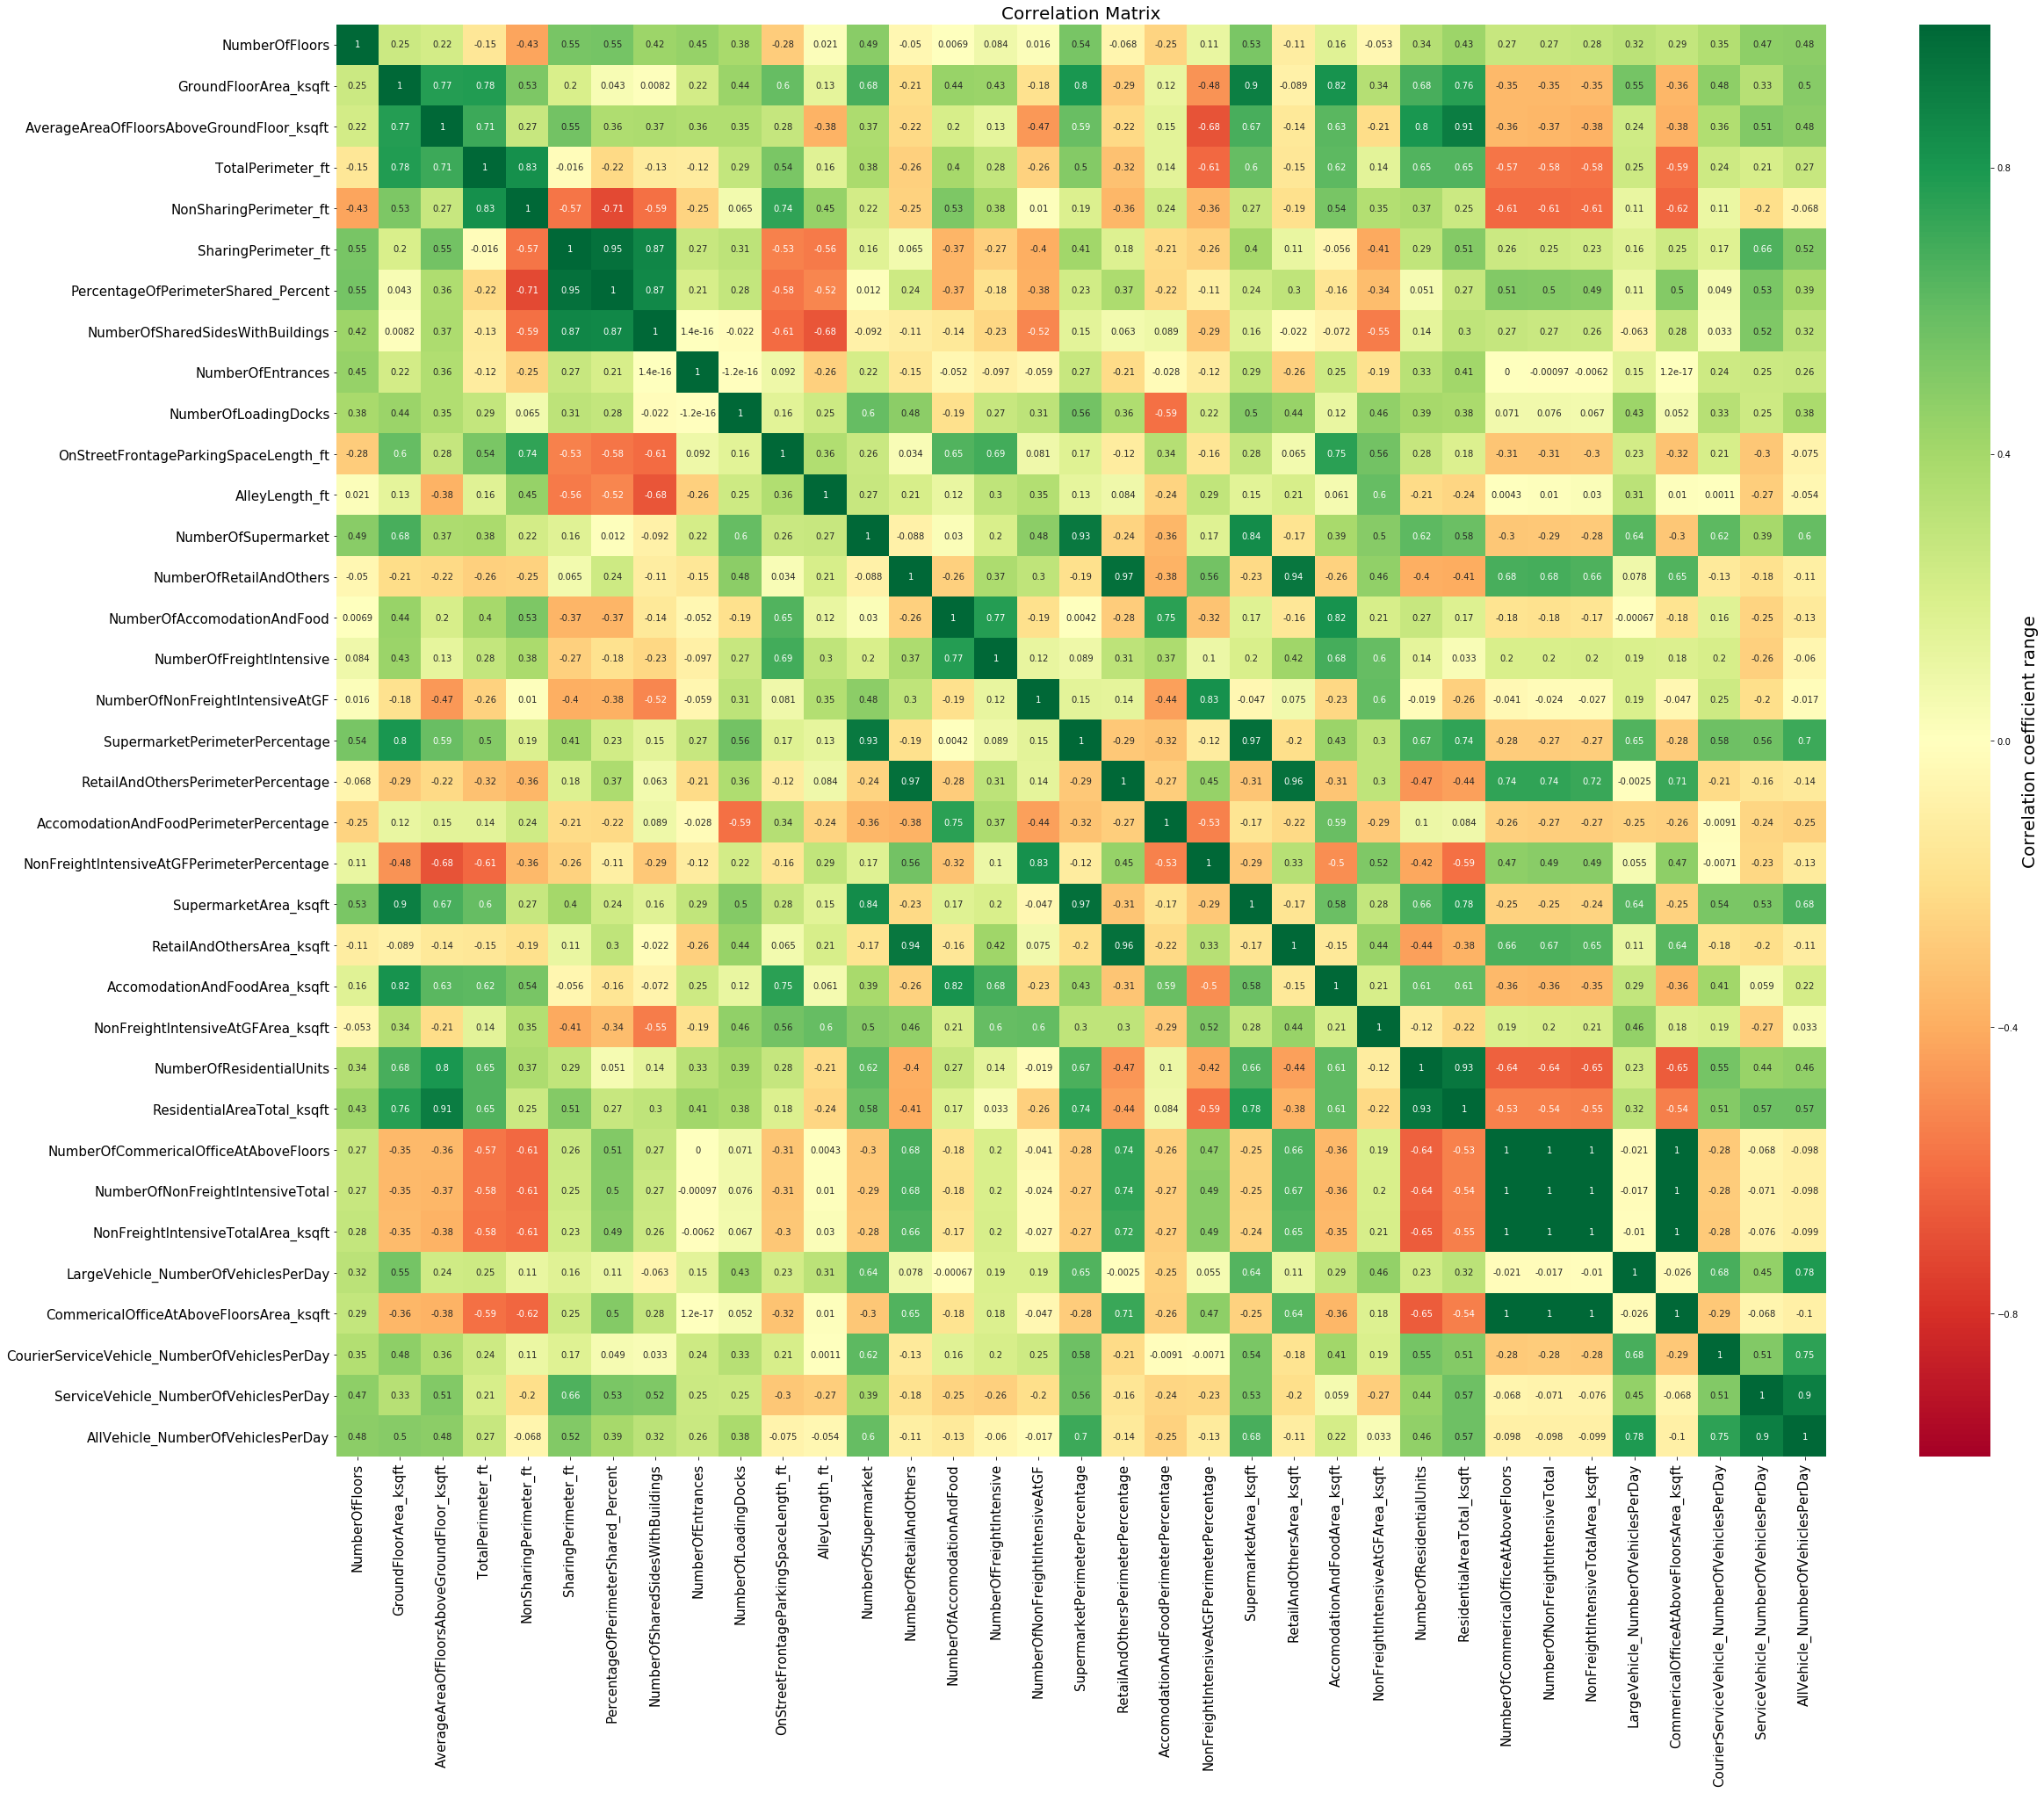

In [20]:
plt.figure(figsize=(38,30))
plt.tick_params(labelsize=15)
plt.title("Correlation Matrix", fontsize=20)
ax = sn.heatmap(correlation_matrix, cmap='RdYlGn', vmax=1, vmin=-1, annot=True, cbar_kws={'label':'Correlation coefficient range'});
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.savefig('Correlation Matrix.png')

In [21]:
#correlation_matrix.to_csv("Correlation_Matrix.csv")

<h1> Number Of Large Vehicle Daily Parking Demand Across Week For Each Building

In [22]:
pivot_mean=allVehicle_df.astype({'LargeVehicle_NumberOfVehiclesPerDay':'float'}).pivot_table(index='Weekday', columns='BuildingID', values='LargeVehicle_NumberOfVehiclesPerDay', aggfunc= 'mean', margins=True);

pivot_mean.drop(['All'], axis=0, inplace=True)
pivot_mean.rename(columns={'All': 'All Buildings Average'}, inplace=True)
pivot_mean.loc['Weekly Total']=pivot_mean.sum()
pivot_mean=pivot_mean.rename(columns={1:5, 2:2, 3:1, 4:6, 5:12, 6:10, 7:7, 8:4, 9:8, 10:11, 11:9, 12:3})[[1,2,3,4,5,6,7,8,9,10,11,12,'All Buildings Average']]
numberOfVehiclePerDay_across_week_for_each_building_largeVehicle = pivot_mean.reindex(index=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday', 'Weekly Total'])
numberOfVehiclePerDay_across_week_for_each_building_largeVehicle

BuildingID        1      2      3      4      5      6     7     8     9  \
Weekday                                                                    
Monday         34.0   39.0   32.0   20.0   28.0   18.0  10.0   8.0  14.0   
Tuesday        49.0   56.0   36.0   28.0   24.0   23.0  17.0   9.0  28.0   
Wednesday      30.0   30.0   29.0   21.0   27.0   14.0  14.0  18.0  15.0   
Thursday       30.0   42.0   38.0   30.0   24.0   10.0  19.0   8.0  17.0   
Friday         23.0   48.0   38.0   19.0   15.0   27.0  10.0   9.0  13.0   
Saturday       17.0   25.0   25.0   13.0   10.0    6.0   6.0   9.0   7.0   
Sunday         10.0   11.0    6.0    4.0    1.0    3.0  11.0   6.0   4.0   
Weekly Total  193.0  251.0  204.0  135.0  129.0  101.0  87.0  67.0  98.0   

BuildingID      10    11    12  All Buildings Average  
Weekday                                                
Monday         9.0   8.0   5.0              18.750000  
Tuesday       16.0  13.0   1.0              25.000000  
Wednesday     10.0  10.0   3.0              18.416667  
Thursday      13.0  11.0   3.0              20.416667  
Friday        12.0  16.0   8.0              19.833333  
Saturday       8.0   9.0   3.0              11.500000  
Sunday         2.0   5.0   0.0               5.250000  
Weekly Total  70.0  72.0  23.0             119.166667

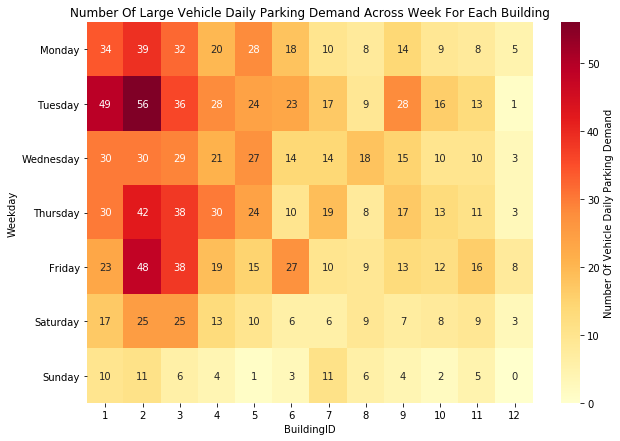

In [23]:
plt.figure(figsize=(10,7))
plt.title("Number Of Large Vehicle Daily Parking Demand Across Week For Each Building")
sn.heatmap(numberOfVehiclePerDay_across_week_for_each_building_largeVehicle.loc[numberOfVehiclePerDay_across_week_for_each_building_largeVehicle.index!='Weekly Total', numberOfVehiclePerDay_across_week_for_each_building_largeVehicle.columns!='All Buildings Average'],\
           cmap='YlOrRd', annot=True, cbar_kws={'label':'Number Of Vehicle Daily Parking Demand'});
plt.savefig('Number Of Large Vehicle Daily Parking Demand Across Week For Each Building.png')

<h1> Number Of Courier Service Vehicle Daily Parking Demand Across Week For Each Building

In [24]:
pivot_mean=allVehicle_df.astype({'CourierServiceVehicle_NumberOfVehiclesPerDay':'float'}).pivot_table(index='Weekday', columns='BuildingID', values='CourierServiceVehicle_NumberOfVehiclesPerDay', aggfunc= 'mean', margins=True);
pivot_mean.drop(['All'], axis=0, inplace=True)
pivot_mean.rename(columns={'All': 'All Buildings Average'}, inplace=True)
pivot_mean.loc['Weekly Total']=pivot_mean.sum()
pivot_mean=pivot_mean.rename(columns={1:5, 2:2, 3:1, 4:6, 5:12, 6:10, 7:7, 8:4, 9:8, 10:11, 11:9, 12:3})[[1,2,3,4,5,6,7,8,9,10,11,12,'All Buildings Average']]
numberOfVehiclePerDay_across_week_for_each_building_courierServiceVehicle = pivot_mean.reindex(index=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday', 'Weekly Total'])
numberOfVehiclePerDay_across_week_for_each_building_courierServiceVehicle

BuildingID       1     2     3     4     5     6     7     8     9    10  \
Weekday                                                                    
Monday        15.0  10.0  15.0  15.0   6.0   8.0   1.0   6.0   8.0   3.0   
Tuesday       14.0  11.0  16.0   6.0   4.0   3.0   3.0   8.0   4.0   2.0   
Wednesday     20.0   5.0  21.0  14.0   4.0   9.0   5.0   7.0   3.0   3.0   
Thursday      16.0  13.0  19.0  17.0   4.0   9.0   6.0  10.0   8.0   3.0   
Friday        11.0  14.0  12.0  15.0   3.0   9.0   4.0   9.0   6.0   3.0   
Saturday       7.0   4.0   9.0   8.0   1.0   6.0   0.0   5.0   0.0   0.0   
Sunday         0.0   0.0   2.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   
Weekly Total  83.0  57.0  94.0  78.0  22.0  44.0  19.0  45.0  29.0  14.0   

BuildingID      11    12  All Buildings Average  
Weekday                                          
Monday         3.0   4.0               7.833333  
Tuesday        5.0   5.0               6.750000  
Wednesday      7.0   6.0               8.666667  
Thursday       4.0   6.0               9.583333  
Friday         7.0   7.0               8.333333  
Saturday       5.0   5.0               4.166667  
Sunday         0.0   1.0               0.500000  
Weekly Total  31.0  34.0              45.833333

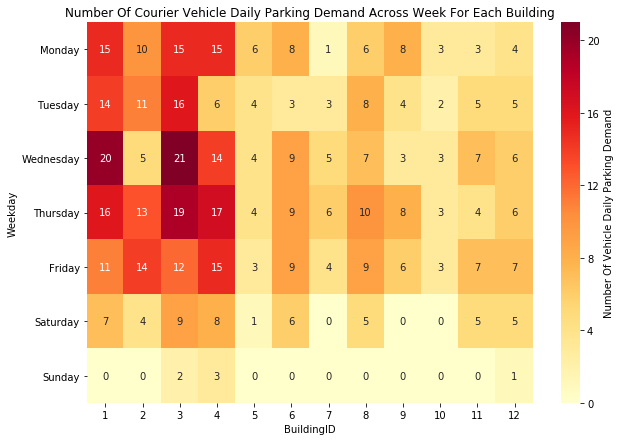

In [25]:
plt.figure(figsize=(10,7))
plt.title("Number Of Courier Vehicle Daily Parking Demand Across Week For Each Building")
sn.heatmap(numberOfVehiclePerDay_across_week_for_each_building_courierServiceVehicle.loc[numberOfVehiclePerDay_across_week_for_each_building_courierServiceVehicle.index!='Weekly Total', numberOfVehiclePerDay_across_week_for_each_building_courierServiceVehicle.columns!='All Buildings Average'],\
           cmap='YlOrRd', annot=True, cbar_kws={'label':'Number Of Vehicle Daily Parking Demand'});
plt.savefig('Number Of Courier Service Vehicle Daily Parking Demand Across Week For Each Building.png')

<h1> Number Of Service Vehicle Daily Parking Demand Across Week For Each Building

In [26]:
pivot_mean=allVehicle_df.astype({'ServiceVehicle_NumberOfVehiclesPerDay':'float'}).pivot_table(index='Weekday', columns='BuildingID', values='ServiceVehicle_NumberOfVehiclesPerDay', aggfunc= 'mean', margins=True);
pivot_mean.drop(['All'], axis=0, inplace=True)
pivot_mean.rename(columns={'All': 'All Buildings Average'}, inplace=True)
pivot_mean.loc['Weekly Total']=pivot_mean.sum()
pivot_mean=pivot_mean.rename(columns={1:5, 2:2, 3:1, 4:6, 5:12, 6:10, 7:7, 8:4, 9:8, 10:11, 11:9, 12:3})[[1,2,3,4,5,6,7,8,9,10,11,12,'All Buildings Average']]
numberOfVehiclePerDay_across_week_for_each_building_serviceVehicle = pivot_mean.reindex(index=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday', 'Weekly Total'])
numberOfVehiclePerDay_across_week_for_each_building_serviceVehicle

BuildingID        1      2     3      4     5     6      7     8     9    10  \
Weekday                                                                        
Monday         77.0   18.0  13.0   23.0  13.0   1.0   25.0  10.0   8.0   8.0   
Tuesday       109.0   17.0  12.0   23.0  18.0  11.0   17.0   7.0   8.0  15.0   
Wednesday     108.0   17.0  12.0   11.0  13.0  11.0   18.0  11.0  11.0  14.0   
Thursday      110.0   17.0  20.0   18.0  13.0  15.0   11.0  14.0   5.0  17.0   
Friday         60.0   22.0  27.0    7.0  14.0  20.0   23.0  12.0  10.0  13.0   
Saturday       20.0    6.0   8.0    6.0  16.0  11.0    5.0  10.0   7.0   9.0   
Sunday          4.0    5.0   4.0   13.0   4.0   6.0    1.0   4.0   3.0   8.0   
Weekly Total  488.0  102.0  96.0  101.0  91.0  75.0  100.0  68.0  52.0  84.0   

BuildingID      11    12  All Buildings Average  
Weekday                                          
Monday         9.0  12.0              18.083333  
Tuesday       16.0  12.0              22.083333  
Wednesday     12.0  12.0              20.833333  
Thursday      12.0  19.0              22.583333  
Friday        10.0  14.0              19.333333  
Saturday       5.0  10.0               9.416667  
Sunday         1.0   5.0               4.833333  
Weekly Total  65.0  84.0             117.166667

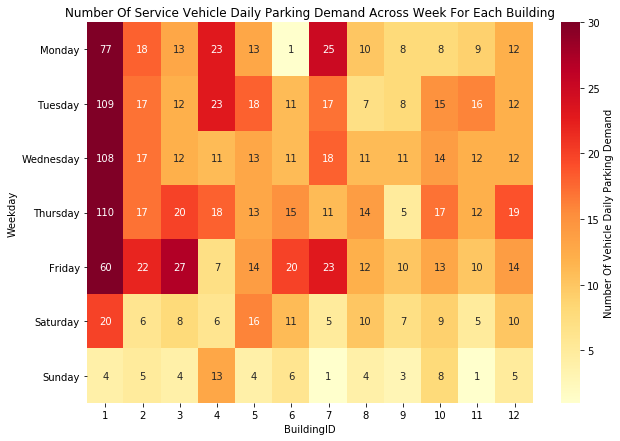

In [27]:
plt.figure(figsize=(10,7));

plt.title("Number Of Service Vehicle Daily Parking Demand Across Week For Each Building");

sn.heatmap(numberOfVehiclePerDay_across_week_for_each_building_serviceVehicle.loc[numberOfVehiclePerDay_across_week_for_each_building_serviceVehicle.index!='Weekly Total',  numberOfVehiclePerDay_across_week_for_each_building_serviceVehicle.columns!='All Buildings Average'],\
           cmap='YlOrRd', vmax=30, annot=True, fmt='g', cbar_kws={'label':'Number Of Vehicle Daily Parking Demand'});

plt.savefig('Number Of Service Vehicle Daily Parking Demand Across Week For Each Building.png');


<h1> Number Of Total Vehicle Daily Parking Demand Across Week For Each Building

In [28]:
pivot_mean=allVehicle_df.astype({'AllVehicle_NumberOfVehiclesPerDay':'float'}).pivot_table(index='Weekday', columns='BuildingID', values='AllVehicle_NumberOfVehiclesPerDay', aggfunc= 'mean', margins=True);
pivot_mean.drop(['All'], axis=0, inplace=True)
pivot_mean.rename(columns={'All': 'All Buildings Average'}, inplace=True)
pivot_mean.loc['Weekly Total']=pivot_mean.sum()
pivot_mean=pivot_mean.rename(columns={1:5, 2:2, 3:1, 4:6, 5:12, 6:10, 7:7, 8:4, 9:8, 10:11, 11:9, 12:3})[[1,2,3,4,5,6,7,8,9,10,11,12,'All Buildings Average']]
numberOfVehiclePerDay_across_week_for_each_building_allVehicle = pivot_mean.reindex(index=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday', 'Weekly Total'])
numberOfVehiclePerDay_across_week_for_each_building_allVehicle

BuildingID        1      2      3      4      5      6      7      8      9  \
Weekday                                                                       
Monday        126.0   67.0   60.0   58.0   47.0   27.0   36.0   24.0   30.0   
Tuesday       172.0   84.0   64.0   57.0   46.0   37.0   37.0   24.0   40.0   
Wednesday     158.0   52.0   62.0   46.0   44.0   34.0   37.0   36.0   29.0   
Thursday      156.0   72.0   77.0   65.0   41.0   34.0   36.0   32.0   30.0   
Friday         94.0   84.0   77.0   41.0   32.0   56.0   37.0   30.0   29.0   
Saturday       44.0   35.0   42.0   27.0   27.0   23.0   11.0   24.0   14.0   
Sunday         14.0   16.0   12.0   20.0    5.0    9.0   12.0   10.0    7.0   
Weekly Total  764.0  410.0  394.0  314.0  242.0  220.0  206.0  180.0  179.0   

BuildingID       10     11     12  All Buildings Average  
Weekday                                                   
Monday         20.0   20.0   21.0              44.666667  
Tuesday        33.0   34.0   18.0              53.833333  
Wednesday      27.0   29.0   21.0              47.916667  
Thursday       33.0   27.0   28.0              52.583333  
Friday         28.0   33.0   29.0              47.500000  
Saturday       17.0   19.0   18.0              25.083333  
Sunday         10.0    6.0    6.0              10.583333  
Weekly Total  168.0  168.0  141.0             282.166667

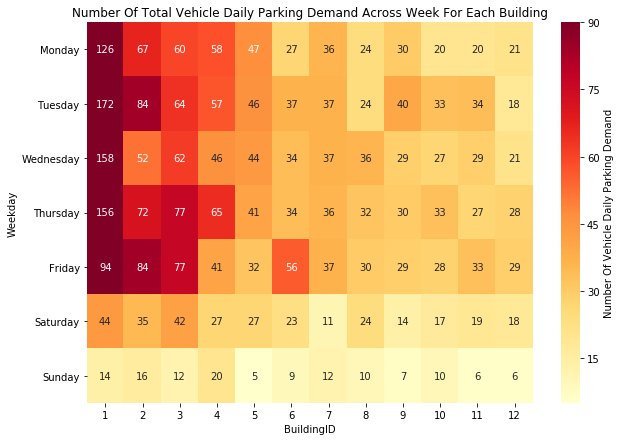

In [29]:
plt.figure(figsize=(10,7))
plt.title("Number Of Total Vehicle Daily Parking Demand Across Week For Each Building")
sn.heatmap(numberOfVehiclePerDay_across_week_for_each_building_allVehicle.loc[numberOfVehiclePerDay_across_week_for_each_building_allVehicle.index!='Weekly Total', numberOfVehiclePerDay_across_week_for_each_building_allVehicle.columns!='All Buildings Average'],\
           cmap='YlOrRd', vmax=90, annot=True, fmt='g', cbar_kws={'label':'Number Of Vehicle Daily Parking Demand'});
plt.savefig('Number Of Total Vehicle Daily Parking Demand Across Week For Each Building.png')

<h1> Percentage Of Weekly Large Vehicle Parking Demand Distribution Across Days Of Week For Each Building

In [30]:
pivot_mean=allVehicle_df.astype({'LargeVehicle_NumberOfVehiclesPerDay':'float'}).pivot_table(index='Weekday', columns='BuildingID', values='LargeVehicle_NumberOfVehiclesPerDay', aggfunc= 'mean', margins=True);
pivot_mean.drop(['All'], axis=0, inplace=True)
pivot_mean.rename(columns={'All': 'All Buildings Average'}, inplace=True)
pivot_mean=pivot_mean.rename(columns={1:5, 2:2, 3:1, 4:6, 5:12, 6:10, 7:7, 8:4, 9:8, 10:11, 11:9, 12:3})[[1,2,3,4,5,6,7,8,9,10,11,12,'All Buildings Average']]
percent_dist_across_week_for_each_building_largeVehicle = (100*pivot_mean.div(pivot_mean.sum(), axis=1)).reindex(index=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday', 'All'])
percent_dist_across_week_for_each_building_largeVehicle.loc['All'] = percent_dist_across_week_for_each_building_largeVehicle.sum()
percent_dist_across_week_for_each_building_largeVehicle

BuildingID           1           2           3           4           5  \
Weekday                                                                  
Monday       17.616580   15.537849   15.686275   14.814815   21.705426   
Tuesday      25.388601   22.310757   17.647059   20.740741   18.604651   
Wednesday    15.544041   11.952191   14.215686   15.555556   20.930233   
Thursday     15.544041   16.733068   18.627451   22.222222   18.604651   
Friday       11.917098   19.123506   18.627451   14.074074   11.627907   
Saturday      8.808290    9.960159   12.254902    9.629630    7.751938   
Sunday        5.181347    4.382470    2.941176    2.962963    0.775194   
All         100.000000  100.000000  100.000000  100.000000  100.000000   

BuildingID           6           7           8           9          10  \
Weekday                                                                  
Monday       17.821782   11.494253   11.940299   14.285714   12.857143   
Tuesday      22.772277   19.540230   13.432836   28.571429   22.857143   
Wednesday    13.861386   16.091954   26.865672   15.306122   14.285714   
Thursday      9.900990   21.839080   11.940299   17.346939   18.571429   
Friday       26.732673   11.494253   13.432836   13.265306   17.142857   
Saturday      5.940594    6.896552   13.432836    7.142857   11.428571   
Sunday        2.970297   12.643678    8.955224    4.081633    2.857143   
All         100.000000  100.000000  100.000000  100.000000  100.000000   

BuildingID          11          12  All Buildings Average  
Weekday                                                    
Monday       11.111111   21.739130              15.734266  
Tuesday      18.055556    4.347826              20.979021  
Wednesday    13.888889   13.043478              15.454545  
Thursday     15.277778   13.043478              17.132867  
Friday       22.222222   34.782609              16.643357  
Saturday     12.500000   13.043478               9.650350  
Sunday        6.944444    0.000000               4.405594  
All         100.000000  100.000000             100.000000

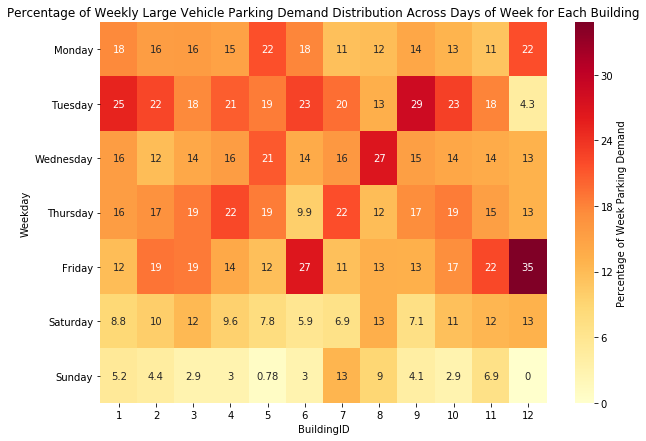

In [31]:
plt.figure(figsize=(10,7))
plt.title("Percentage of Weekly Large Vehicle Parking Demand Distribution Across Days of Week for Each Building")
sn.heatmap(percent_dist_across_week_for_each_building_largeVehicle.loc[percent_dist_across_week_for_each_building_largeVehicle.index!='All', percent_dist_across_week_for_each_building_largeVehicle.columns!='All Buildings Average'],\
           cmap='YlOrRd', annot=True, cbar_kws={'label':'Percentage of Week Parking Demand'});
plt.savefig('Percentage of Weekly Large Vehicle Parking Demand Distribution Across Days of Week for Each Building.png')

<h1> Percentage Of Weekly Courier Service Vehicle Parking Demand Distribution Across Days Of Week For Each Building

In [32]:
pivot_mean=allVehicle_df.astype({'CourierServiceVehicle_NumberOfVehiclesPerDay':'float'}).pivot_table(index='Weekday', columns='BuildingID', values='CourierServiceVehicle_NumberOfVehiclesPerDay', aggfunc= 'mean', margins=True);
pivot_mean.drop(['All'], axis=0, inplace=True)
pivot_mean.rename(columns={'All': 'All Buildings Average'}, inplace=True)
pivot_mean=pivot_mean.rename(columns={1:5, 2:2, 3:1, 4:6, 5:12, 6:10, 7:7, 8:4, 9:8, 10:11, 11:9, 12:3})[[1,2,3,4,5,6,7,8,9,10,11,12,'All Buildings Average']]
percent_dist_across_week_for_each_building_courierServiceVehicle = (100*pivot_mean.div(pivot_mean.sum(), axis=1)).reindex(index=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday', 'All'])
percent_dist_across_week_for_each_building_courierServiceVehicle.loc['All'] = percent_dist_across_week_for_each_building_courierServiceVehicle.sum()
percent_dist_across_week_for_each_building_courierServiceVehicle

BuildingID           1           2           3           4           5  \
Weekday                                                                  
Monday       18.072289   17.543860   15.957447   19.230769   27.272727   
Tuesday      16.867470   19.298246   17.021277    7.692308   18.181818   
Wednesday    24.096386    8.771930   22.340426   17.948718   18.181818   
Thursday     19.277108   22.807018   20.212766   21.794872   18.181818   
Friday       13.253012   24.561404   12.765957   19.230769   13.636364   
Saturday      8.433735    7.017544    9.574468   10.256410    4.545455   
Sunday        0.000000    0.000000    2.127660    3.846154    0.000000   
All         100.000000  100.000000  100.000000  100.000000  100.000000   

BuildingID           6           7           8           9          10  \
Weekday                                                                  
Monday       18.181818    5.263158   13.333333   27.586207   21.428571   
Tuesday       6.818182   15.789474   17.777778   13.793103   14.285714   
Wednesday    20.454545   26.315789   15.555556   10.344828   21.428571   
Thursday     20.454545   31.578947   22.222222   27.586207   21.428571   
Friday       20.454545   21.052632   20.000000   20.689655   21.428571   
Saturday     13.636364    0.000000   11.111111    0.000000    0.000000   
Sunday        0.000000    0.000000    0.000000    0.000000    0.000000   
All         100.000000  100.000000  100.000000  100.000000  100.000000   

BuildingID          11          12  All Buildings Average  
Weekday                                                    
Monday        9.677419   11.764706              17.090909  
Tuesday      16.129032   14.705882              14.727273  
Wednesday    22.580645   17.647059              18.909091  
Thursday     12.903226   17.647059              20.909091  
Friday       22.580645   20.588235              18.181818  
Saturday     16.129032   14.705882               9.090909  
Sunday        0.000000    2.941176               1.090909  
All         100.000000  100.000000             100.000000

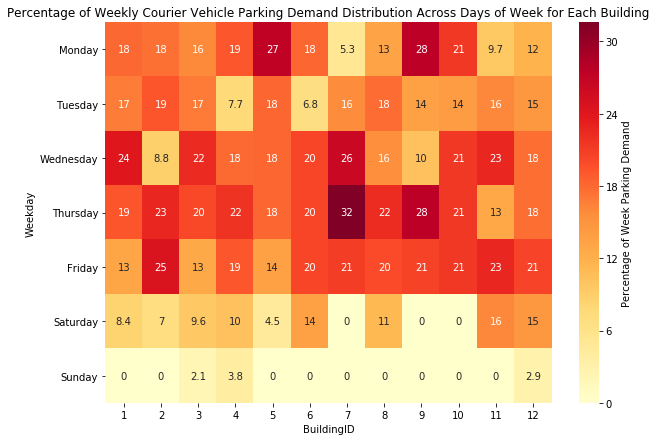

In [33]:
plt.figure(figsize=(10,7))
plt.title("Percentage of Weekly Courier Vehicle Parking Demand Distribution Across Days of Week for Each Building")
sn.heatmap(percent_dist_across_week_for_each_building_courierServiceVehicle.loc[percent_dist_across_week_for_each_building_courierServiceVehicle.index!='All', percent_dist_across_week_for_each_building_courierServiceVehicle.columns!='All Buildings Average'],\
           cmap='YlOrRd', annot=True, cbar_kws={'label':'Percentage of Week Parking Demand'});
plt.savefig('Percentage of Weekly Courier Service Vehicle Parking Demand Distribution Across Days of Week for Each Building.png')

<h1> Percentage Of Weekly Service Vehicle Parking Demand Distribution Across Days Of Week For Each Building

In [34]:
pivot_mean=allVehicle_df.astype({'ServiceVehicle_NumberOfVehiclesPerDay':'float'}).pivot_table(index='Weekday', columns='BuildingID', values='ServiceVehicle_NumberOfVehiclesPerDay', aggfunc= 'mean', margins=True);
pivot_mean.drop(['All'], axis=0, inplace=True)
pivot_mean.rename(columns={'All': 'All Buildings Average'}, inplace=True)
pivot_mean=pivot_mean.rename(columns={1:5, 2:2, 3:1, 4:6, 5:12, 6:10, 7:7, 8:4, 9:8, 10:11, 11:9, 12:3})[[1,2,3,4,5,6,7,8,9,10,11,12,'All Buildings Average']]
percent_dist_across_week_for_each_building_serviceVehicle = (100*pivot_mean.div(pivot_mean.sum(), axis=1)).reindex(index=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday', 'All'])
percent_dist_across_week_for_each_building_serviceVehicle.loc['All'] = percent_dist_across_week_for_each_building_serviceVehicle.sum()
percent_dist_across_week_for_each_building_serviceVehicle

BuildingID           1           2           3           4           5  \
Weekday                                                                  
Monday       15.778689   17.647059   13.541667   22.772277   14.285714   
Tuesday      22.336066   16.666667   12.500000   22.772277   19.780220   
Wednesday    22.131148   16.666667   12.500000   10.891089   14.285714   
Thursday     22.540984   16.666667   20.833333   17.821782   14.285714   
Friday       12.295082   21.568627   28.125000    6.930693   15.384615   
Saturday      4.098361    5.882353    8.333333    5.940594   17.582418   
Sunday        0.819672    4.901961    4.166667   12.871287    4.395604   
All         100.000000  100.000000  100.000000  100.000000  100.000000   

BuildingID           6      7           8           9          10          11  \
Weekday                                                                         
Monday        1.333333   25.0   14.705882   15.384615    9.523810   13.846154   
Tuesday      14.666667   17.0   10.294118   15.384615   17.857143   24.615385   
Wednesday    14.666667   18.0   16.176471   21.153846   16.666667   18.461538   
Thursday     20.000000   11.0   20.588235    9.615385   20.238095   18.461538   
Friday       26.666667   23.0   17.647059   19.230769   15.476190   15.384615   
Saturday     14.666667    5.0   14.705882   13.461538   10.714286    7.692308   
Sunday        8.000000    1.0    5.882353    5.769231    9.523810    1.538462   
All         100.000000  100.0  100.000000  100.000000  100.000000  100.000000   

BuildingID          12  All Buildings Average  
Weekday                                        
Monday       14.285714              15.433855  
Tuesday      14.285714              18.847795  
Wednesday    14.285714              17.780939  
Thursday     22.619048              19.274538  
Friday       16.666667              16.500711  
Saturday     11.904762               8.036984  
Sunday        5.952381               4.125178  
All         100.000000             100.000000

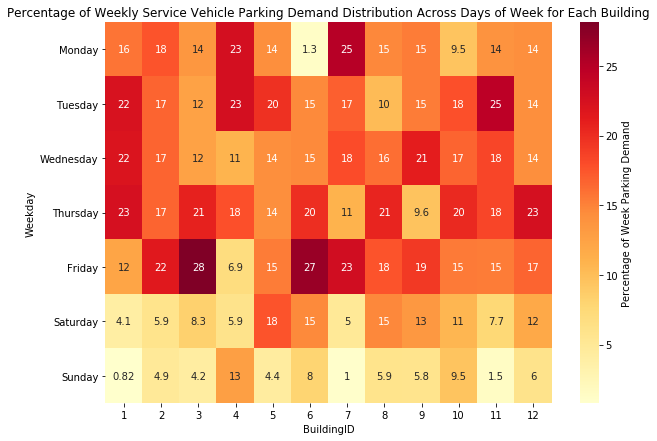

In [35]:
plt.figure(figsize=(10,7))
plt.title("Percentage of Weekly Service Vehicle Parking Demand Distribution Across Days of Week for Each Building")
sn.heatmap(percent_dist_across_week_for_each_building_serviceVehicle.loc[percent_dist_across_week_for_each_building_serviceVehicle.index!='All', percent_dist_across_week_for_each_building_serviceVehicle.columns!='All Buildings Average'],\
           cmap='YlOrRd', annot=True, cbar_kws={'label':'Percentage of Week Parking Demand'});
plt.savefig('Percentage of Weekly Service Vehicle Parking Demand Distribution Across Days of Week for Each Building.png')

<h1> Percentage Of Weekly Total Vehicle Parking Demand Distribution Across Days Of Week For Each Building

In [36]:
pivot_mean=allVehicle_df.astype({'AllVehicle_NumberOfVehiclesPerDay':'float'}).pivot_table(index='Weekday', columns='BuildingID', values='AllVehicle_NumberOfVehiclesPerDay', aggfunc= 'mean', margins=True);
pivot_mean.drop(['All'], axis=0, inplace=True)
pivot_mean.rename(columns={'All': 'All Buildings Average'}, inplace=True)
pivot_mean=pivot_mean.rename(columns={1:5, 2:2, 3:1, 4:6, 5:12, 6:10, 7:7, 8:4, 9:8, 10:11, 11:9, 12:3})[[1,2,3,4,5,6,7,8,9,10,11,12,'All Buildings Average']]
percent_dist_across_week_for_each_building_allVehicle = (100*pivot_mean.div(pivot_mean.sum(), axis=1)).reindex(index=['Monday', 'Tuesday','Wednesday','Thursday','Friday', 'Saturday','Sunday', 'All'])
percent_dist_across_week_for_each_building_allVehicle.loc['All'] = percent_dist_across_week_for_each_building_allVehicle.sum()
percent_dist_across_week_for_each_building_allVehicle

BuildingID           1           2           3           4           5  \
Weekday                                                                  
Monday       16.492147   16.341463   15.228426   18.471338   19.421488   
Tuesday      22.513089   20.487805   16.243655   18.152866   19.008264   
Wednesday    20.680628   12.682927   15.736041   14.649682   18.181818   
Thursday     20.418848   17.560976   19.543147   20.700637   16.942149   
Friday       12.303665   20.487805   19.543147   13.057325   13.223140   
Saturday      5.759162    8.536585   10.659898    8.598726   11.157025   
Sunday        1.832461    3.902439    3.045685    6.369427    2.066116   
All         100.000000  100.000000  100.000000  100.000000  100.000000   

BuildingID           6           7           8           9          10  \
Weekday                                                                  
Monday       12.272727   17.475728   13.333333   16.759777   11.904762   
Tuesday      16.818182   17.961165   13.333333   22.346369   19.642857   
Wednesday    15.454545   17.961165   20.000000   16.201117   16.071429   
Thursday     15.454545   17.475728   17.777778   16.759777   19.642857   
Friday       25.454545   17.961165   16.666667   16.201117   16.666667   
Saturday     10.454545    5.339806   13.333333    7.821229   10.119048   
Sunday        4.090909    5.825243    5.555556    3.910615    5.952381   
All         100.000000  100.000000  100.000000  100.000000  100.000000   

BuildingID          11          12  All Buildings Average  
Weekday                                                    
Monday       11.904762   14.893617              15.829888  
Tuesday      20.238095   12.765957              19.078559  
Wednesday    17.261905   14.893617              16.981689  
Thursday     16.071429   19.858156              18.635558  
Friday       19.642857   20.567376              16.834022  
Saturday     11.309524   12.765957               8.889545  
Sunday        3.571429    4.255319               3.750738  
All         100.000000  100.000000             100.000000

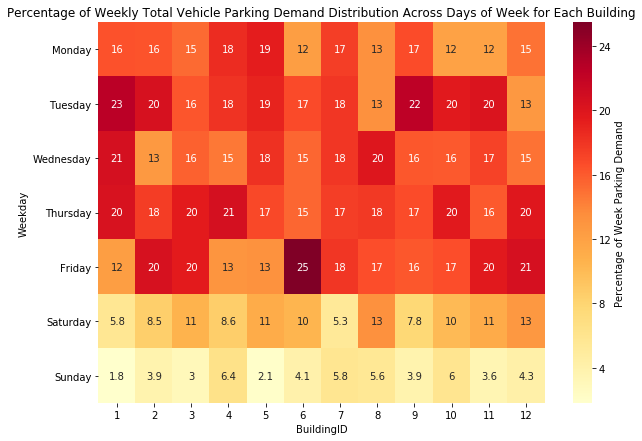

In [37]:
plt.figure(figsize=(10,7))
plt.title("Percentage of Weekly Total Vehicle Parking Demand Distribution Across Days of Week for Each Building")
sn.heatmap(percent_dist_across_week_for_each_building_allVehicle.loc[percent_dist_across_week_for_each_building_allVehicle.index!='All', percent_dist_across_week_for_each_building_allVehicle.columns!='All Buildings Average'],\
           cmap='YlOrRd', annot=True, cbar_kws={'label':'Percentage of Week Parking Demand'});
plt.savefig('Percentage of Weekly Total Vehicle Parking Demand Distribution Across Days of Week for Each Building.png')

In [38]:
with pd.ExcelWriter(path='Result_Tables.xlsx', engine='xlsxwriter') as writer:
    
    numberOfVehiclePerDay_across_week_for_each_building_largeVehicle.to_excel(writer, sheet_name='NumLargeDailyDemandWeek_Build',\
                                                                          header=['Building 1', 'Building 2','Building 3', 'Building 4', 'Building 5', 'Building 6',\
                                                                                 'Building 7', 'Building 8', 'Building 9', 'Building 10', 'Building 11', 'Building 12', 'All Buildings Average']);
    
    numberOfVehiclePerDay_across_week_for_each_building_courierServiceVehicle.to_excel(writer, sheet_name='NumCourierDailyDemandWeek_Build',\
                                                                          header=['Building 1', 'Building 2','Building 3', 'Building 4', 'Building 5', 'Building 6',\
                                                                                 'Building 7', 'Building 8', 'Building 9', 'Building 10', 'Building 11', 'Building 12', 'All Buildings Average']);
    
    numberOfVehiclePerDay_across_week_for_each_building_serviceVehicle.to_excel(writer, sheet_name='NumServiceDailyDemandWeek_Build',\
                                                                          header=['Building 1', 'Building 2','Building 3', 'Building 4', 'Building 5', 'Building 6',\
                                                                                 'Building 7', 'Building 8', 'Building 9', 'Building 10', 'Building 11', 'Building 12', 'All Buildings Average']);
    
    numberOfVehiclePerDay_across_week_for_each_building_allVehicle.to_excel(writer, sheet_name='NumAllDailyDemandWeek_Build',\
                                                                          header=['Building 1', 'Building 2','Building 3', 'Building 4', 'Building 5', 'Building 6',\
                                                                                 'Building 7', 'Building 8', 'Building 9', 'Building 10', 'Building 11', 'Building 12', 'All Buildings Average']);
    
    percent_dist_across_week_for_each_building_largeVehicle.to_excel(writer, sheet_name='PtLargeWeeklyDemandWeek_Build',\
                                                                          header=['Building 1', 'Building 2','Building 3', 'Building 4', 'Building 5', 'Building 6',\
                                                                                 'Building 7', 'Building 8', 'Building 9', 'Building 10', 'Building 11', 'Building 12', 'All Buildings Average']);
    
    percent_dist_across_week_for_each_building_courierServiceVehicle.to_excel(writer, sheet_name='PtCourierWeeklyDemandWeek_Build',\
                                                                          header=['Building 1', 'Building 2','Building 3', 'Building 4', 'Building 5', 'Building 6',\
                                                                                 'Building 7', 'Building 8', 'Building 9', 'Building 10', 'Building 11', 'Building 12', 'All Buildings Average']);
    
    percent_dist_across_week_for_each_building_serviceVehicle.to_excel(writer, sheet_name='PtServiceWeeklyDemandWeek_Build',\
                                                                          header=['Building 1', 'Building 2','Building 3', 'Building 4', 'Building 5', 'Building 6',\
                                                                                 'Building 7', 'Building 8', 'Building 9', 'Building 10', 'Building 11', 'Building 12', 'All Buildings Average']);
    
    percent_dist_across_week_for_each_building_allVehicle.to_excel(writer, sheet_name='PtAllWeeklyDemandWeek_Build',\
                                                                          header=['Building 1', 'Building 2','Building 3', 'Building 4', 'Building 5', 'Building 6',\
                                                                                 'Building 7', 'Building 8', 'Building 9', 'Building 10', 'Building 11', 'Building 12', 'All Buildings Average']);
    

<h1>

<h1> Parking Time of Day Temporal Distribution Anaysis

<h1>

In [39]:
df_arrivalTimeParkingData=pd.read_csv(filepath_or_buffer='ParkingArrivalTimeData.csv');
print("df_arrivalTimeParkingData shape is",df_arrivalTimeParkingData.shape);
df_arrivalTimeParkingData.head()

df_arrivalTimeParkingData shape is (3774, 13)


BuildingID           Street ParkingLocation  ParkingSpaceLength_ft  \
0           1  Connecticut Ave       On-street                    200   
1           1  Connecticut Ave       On-street                    200   
2           1  Connecticut Ave       On-street                    200   
3           1  Connecticut Ave       On-street                    200   
4           1  Connecticut Ave       On-street                    200   

   ParkingDistanceFromNearestEntrance_ft        ArrivalDateTime   Weekday  \
0                                     57  04/07/2018 8:00:00 AM  Saturday   
1                                     57  04/07/2018 4:20:00 AM  Saturday   
2                                     57  04/07/2018 1:40:00 AM  Saturday   
3                                     57  04/06/2018 7:40:00 PM    Friday   
4                                     57  04/06/2018 7:10:00 PM    Friday   

  WeekendOrWeekday ArrivalTime  ParkingDuration_min VehicleTypePurpose  \
0          Weekend  8:00:00 AM                210.0    Service Vehicle   
1          Weekend  4:20:00 AM                  3.0              Other   
2          Weekend  1:40:00 AM                  9.0              Other   
3          Weekday  7:40:00 PM                 50.0    Service Vehicle   
4          Weekday  7:10:00 PM                160.0    Service Vehicle   

  ParkingType_LegalOrIllegal  NumberOfVehicle  
0                      Legal                1  
1                      Legal                1  
2                      Legal                1  
3                      Legal                1  
4                      Legal                1

In [40]:
df_arrivalTimeParkingData.describe(include='all')

BuildingID Street ParkingLocation  ParkingSpaceLength_ft  \
count   3774.000000   3774            3774            3774.000000   
unique          NaN     28               5                    NaN   
top             NaN   M St       On-street                    NaN   
freq            NaN    561            2240                    NaN   
mean       5.907260    NaN             NaN             193.693164   
std        3.696315    NaN             NaN             108.242575   
min        1.000000    NaN             NaN               0.000000   
25%        3.000000    NaN             NaN             120.000000   
50%        5.000000    NaN             NaN             190.000000   
75%        9.000000    NaN             NaN             270.000000   
max       12.000000    NaN             NaN             400.000000   

        ParkingDistanceFromNearestEntrance_ft         ArrivalDateTime  \
count                             3774.000000                    3774   
unique                                    NaN                    2510   
top                                       NaN  04/24/2018 12:00:00 PM   
freq                                      NaN                       9   
mean                               103.484367                     NaN   
std                                 78.001836                     NaN   
min                                 10.000000                     NaN   
25%                                 60.000000                     NaN   
50%                                 79.000000                     NaN   
75%                                118.000000                     NaN   
max                                350.000000                     NaN   

        Weekday WeekendOrWeekday  ArrivalTime  ParkingDuration_min  \
count      3774             3774         3774          3682.000000   
unique        7                2          420                  NaN   
top     Tuesday          Weekday  10:00:00 AM                  NaN   
freq        737             3241           74                  NaN   
mean        NaN              NaN          NaN            42.992124   
std         NaN              NaN          NaN            89.875006   
min         NaN              NaN          NaN             1.000000   
25%         NaN              NaN          NaN             5.000000   
50%         NaN              NaN          NaN            20.000000   
75%         NaN              NaN          NaN            40.000000   
max         NaN              NaN          NaN          2880.000000   

       VehicleTypePurpose ParkingType_LegalOrIllegal  NumberOfVehicle  
count                3774                       3774           3774.0  
unique                  4                          2              NaN  
top         Large Vehicle                      Legal              NaN  
freq                 1368                       3544              NaN  
mean                  NaN                        NaN              1.0  
std                   NaN                        NaN              0.0  
min                   NaN                        NaN              1.0  
25%                   NaN                        NaN              1.0  
50%                   NaN                        NaN              1.0  
75%                   NaN                        NaN              1.0  
max                   NaN                        NaN              1.0

In [41]:
df_arrivalTimeParkingData_isnull=df_arrivalTimeParkingData.isnull();
for column in df_arrivalTimeParkingData_isnull:
    print(column);
    print(df_arrivalTimeParkingData_isnull[column].value_counts());

BuildingID
False    3774
Name: BuildingID, dtype: int64
Street
False    3774
Name: Street, dtype: int64
ParkingLocation
False    3774
Name: ParkingLocation, dtype: int64
ParkingSpaceLength_ft
False    3774
Name: ParkingSpaceLength_ft, dtype: int64
ParkingDistanceFromNearestEntrance_ft
False    3774
Name: ParkingDistanceFromNearestEntrance_ft, dtype: int64
ArrivalDateTime
False    3774
Name: ArrivalDateTime, dtype: int64
Weekday
False    3774
Name: Weekday, dtype: int64
WeekendOrWeekday
False    3774
Name: WeekendOrWeekday, dtype: int64
ArrivalTime
False    3774
Name: ArrivalTime, dtype: int64
ParkingDuration_min
False    3682
True       92
Name: ParkingDuration_min, dtype: int64
VehicleTypePurpose
False    3774
Name: VehicleTypePurpose, dtype: int64
ParkingType_LegalOrIllegal
False    3774
Name: ParkingType_LegalOrIllegal, dtype: int64
NumberOfVehicle
False    3774
Name: NumberOfVehicle, dtype: int64


In [42]:
df_buildingChar.head()

BuildingID                  Address  NumberOfFloors  GroundFloorArea_ksqft  \
0           1  1025 Connecticut Ave NW              10                 30.467   
1           2           1212 4th St SE               8                 88.000   
2           3              130 M St NE              13                 85.424   
3           4             1301 U St NW               8                 35.330   
4           5        1400 Irving St NW               7                 46.241   

   TotalPerimeter_ft  SharingPerimeter_ft  NumberOfLoadingDocks  \
0                716                  285                     1   
1               1312                    0                     1   
2               1228                  612                     1   
3                916                  121                     0   
4               1237                   30                     0   

   OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  NumberOfSupermarket  \
0                                    320             164                    0   
1                                    540             400                    1   
2                                    180               0                    1   
3                                    315             200                    0   
4                                    460               0                    0   

   NumberOfRetailAndOthers  NumberOfAccomodationAndFood  \
0                        5                            2   
1                        1                            3   
2                        0                            1   
3                        1                            4   
4                        0                            6   

   NumberOfNonFreightIntensiveAtGF  SupermarketArea_ksqft  \
0                                2                0.00000   
1                                3               31.06400   
2                                0               41.00352   
3                                1                0.00000   
4                                1                0.00000   

   RetailAndOthersArea_ksqft  AccomodationAndFoodArea_ksqft  \
0                  11.912597                       3.960710   
1                   4.048000                      10.560000   
2                   0.000000                      11.105120   
3                   4.062950                      11.305600   
4                   0.000000                      12.762516   

   NonFreightIntensiveAtGFArea_ksqft  NumberOfResidentialUnits  \
0                           5.301258                         0   
1                           7.920000                       217   
2                           0.000000                       643   
3                           1.413200                       190   
4                           2.312050                       373   

   ResidentialAreaTotal_ksqft  NumberOfCommericalOfficeAtAboveFloors  \
0                      0.0000                                    354   
1                    190.4000                                      0   
2                    651.2928                                      0   
3                    165.6200                                      0   
4                    201.7200                                      0   

   CommericalOfficeAtAboveFloorsArea_ksqft  
0                                 219.3624  
1                                   0.0000  
2                                   0.0000  
3                                   0.0000  
4                                   0.0000

In [43]:
df_arrivalTime = pd.merge(left=df_buildingChar, right=df_arrivalTimeParkingData, left_on=['BuildingID'], right_on=['BuildingID'], how='inner');
df_arrivalTime = df_arrivalTime[df_arrivalTime['VehicleTypePurpose']!='Other'].drop(columns=['Street']).reset_index(drop=True)
print("df_arrivalTime shape is", df_arrivalTime.shape);
df_arrivalTime.head()

df_arrivalTime shape is (3191, 32)


BuildingID                  Address  NumberOfFloors  GroundFloorArea_ksqft  \
0           1  1025 Connecticut Ave NW              10                 30.467   
1           1  1025 Connecticut Ave NW              10                 30.467   
2           1  1025 Connecticut Ave NW              10                 30.467   
3           1  1025 Connecticut Ave NW              10                 30.467   
4           1  1025 Connecticut Ave NW              10                 30.467   

   TotalPerimeter_ft  SharingPerimeter_ft  NumberOfLoadingDocks  \
0                716                  285                     1   
1                716                  285                     1   
2                716                  285                     1   
3                716                  285                     1   
4                716                  285                     1   

   OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  NumberOfSupermarket  \
0                                    320             164                    0   
1                                    320             164                    0   
2                                    320             164                    0   
3                                    320             164                    0   
4                                    320             164                    0   

   NumberOfRetailAndOthers  NumberOfAccomodationAndFood  \
0                        5                            2   
1                        5                            2   
2                        5                            2   
3                        5                            2   
4                        5                            2   

   NumberOfNonFreightIntensiveAtGF  SupermarketArea_ksqft  \
0                                2                    0.0   
1                                2                    0.0   
2                                2                    0.0   
3                                2                    0.0   
4                                2                    0.0   

   RetailAndOthersArea_ksqft  AccomodationAndFoodArea_ksqft  \
0                  11.912597                        3.96071   
1                  11.912597                        3.96071   
2                  11.912597                        3.96071   
3                  11.912597                        3.96071   
4                  11.912597                        3.96071   

   NonFreightIntensiveAtGFArea_ksqft  NumberOfResidentialUnits  \
0                           5.301258                         0   
1                           5.301258                         0   
2                           5.301258                         0   
3                           5.301258                         0   
4                           5.301258                         0   

   ResidentialAreaTotal_ksqft  NumberOfCommericalOfficeAtAboveFloors  \
0                         0.0                                    354   
1                         0.0                                    354   
2                         0.0                                    354   
3                         0.0                                    354   
4                         0.0                                    354   

   CommericalOfficeAtAboveFloorsArea_ksqft ParkingLocation  \
0                                 219.3624       On-street   
1                                 219.3624       On-street   
2                                 219.3624       On-street   
3                                 219.3624       On-street   
4                                 219.3624       On-street   

   ParkingSpaceLength_ft  ParkingDistanceFromNearestEntrance_ft  \
0                    200                                     57   
1                    200                                     57   
2                    200                                     57   
3                    200                              

In [44]:
#df_arrivalTime.to_csv('df_arrivalTime.csv', index=False)

In [45]:
df_arrivalTime.describe(include='all')

BuildingID      Address  NumberOfFloors  GroundFloorArea_ksqft  \
count   3191.00000         3191     3191.000000            3191.000000   
unique         NaN           12             NaN                    NaN   
top            NaN  130 M St NE             NaN                    NaN   
freq           NaN          598             NaN                    NaN   
mean       6.02225          NaN        9.998746              58.029253   
std        3.67007          NaN        2.181426              31.681583   
min        1.00000          NaN        6.000000              13.795000   
25%        3.00000          NaN        8.000000              30.467000   
50%        6.00000          NaN       10.000000              44.427000   
75%        9.00000          NaN       12.000000              85.424000   
max       12.00000          NaN       13.000000             106.885000   

        TotalPerimeter_ft  SharingPerimeter_ft  NumberOfLoadingDocks  \
count         3191.000000          3191.000000           3191.000000   
unique                NaN                  NaN                   NaN   
top                   NaN                  NaN                   NaN   
freq                  NaN                  NaN                   NaN   
mean          1045.062050           163.506738              0.719210   
std            264.043572           231.687531              0.449455   
min            510.000000             0.000000              0.000000   
25%            900.000000             0.000000              0.000000   
50%           1228.000000             0.000000              1.000000   
75%           1273.000000           285.000000              1.000000   
max           1312.000000           612.000000              1.000000   

        OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  \
count                             3191.000000     3191.000000   
unique                                    NaN             NaN   
top                                       NaN             NaN   
freq                                      NaN             NaN   
mean                               402.431840      194.151050   
std                                200.671154      147.458768   
min                                180.000000        0.000000   
25%                                190.000000        0.000000   
50%                                330.000000      200.000000   
75%                                540.000000      340.000000   
max                                820.000000      400.000000   

        NumberOfSupermarket  NumberOfRetailAndOthers  \
count           3191.000000              3191.000000   
unique                  NaN                      NaN   
top                     NaN                      NaN   
freq                    NaN                      NaN   
mean               0.534315                 1.107803   
std                0.498899                 1.303830   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                1.000000                 1.000000   
75%                1.000000                 1.000000   
max                1.000000                 5.000000   

        NumberOfAccomodationAndFood  NumberOfNonFreightIntensiveAtGF  \
count                   3191.000000                      3191.000000   
unique                          NaN                              NaN   
top                             NaN                              NaN   
freq                            NaN                              NaN   
mean                       3.060483                         1.904732   
std                        2.204251                         1.914230   
min                        1.000000                         0.000000   
25%                        1.000000                         1.000000   
50%                        3.000000                         1.000000   
75%                        3.000000                         2.000000   
max     

In [46]:
df_arrivalTime['Weekday'].unique()

array(['Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday',
       'Sunday'], dtype=object)

In [47]:
df_arrivalTime_mTuWSa = df_arrivalTime[df_arrivalTime['Weekday'].isin(['Monday', 'Tuesday', 'Wednesday', 'Sunday'])].reset_index(drop=True);
print("df_arrivalTime_mTuWSa shape is", df_arrivalTime_mTuWSa.shape)
df_arrivalTime_mTuWSa.head()

df_arrivalTime_mTuWSa shape is (1884, 32)


BuildingID                  Address  NumberOfFloors  GroundFloorArea_ksqft  \
0           1  1025 Connecticut Ave NW              10                 30.467   
1           1  1025 Connecticut Ave NW              10                 30.467   
2           1  1025 Connecticut Ave NW              10                 30.467   
3           1  1025 Connecticut Ave NW              10                 30.467   
4           1  1025 Connecticut Ave NW              10                 30.467   

   TotalPerimeter_ft  SharingPerimeter_ft  NumberOfLoadingDocks  \
0                716                  285                     1   
1                716                  285                     1   
2                716                  285                     1   
3                716                  285                     1   
4                716                  285                     1   

   OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  NumberOfSupermarket  \
0                                    320             164                    0   
1                                    320             164                    0   
2                                    320             164                    0   
3                                    320             164                    0   
4                                    320             164                    0   

   NumberOfRetailAndOthers  NumberOfAccomodationAndFood  \
0                        5                            2   
1                        5                            2   
2                        5                            2   
3                        5                            2   
4                        5                            2   

   NumberOfNonFreightIntensiveAtGF  SupermarketArea_ksqft  \
0                                2                    0.0   
1                                2                    0.0   
2                                2                    0.0   
3                                2                    0.0   
4                                2                    0.0   

   RetailAndOthersArea_ksqft  AccomodationAndFoodArea_ksqft  \
0                  11.912597                        3.96071   
1                  11.912597                        3.96071   
2                  11.912597                        3.96071   
3                  11.912597                        3.96071   
4                  11.912597                        3.96071   

   NonFreightIntensiveAtGFArea_ksqft  NumberOfResidentialUnits  \
0                           5.301258                         0   
1                           5.301258                         0   
2                           5.301258                         0   
3                           5.301258                         0   
4                           5.301258                         0   

   ResidentialAreaTotal_ksqft  NumberOfCommericalOfficeAtAboveFloors  \
0                         0.0                                    354   
1                         0.0                                    354   
2                         0.0                                    354   
3                         0.0                                    354   
4                         0.0                                    354   

   CommericalOfficeAtAboveFloorsArea_ksqft ParkingLocation  \
0                                 219.3624       On-street   
1                                 219.3624       On-street   
2                                 219.3624       On-street   
3                                 219.3624       On-street   
4                                 219.3624       On-street   

   ParkingSpaceLength_ft  ParkingDistanceFromNearestEntrance_ft  \
0                    200                                     57   
1                    200                                     57   
2                    200                                     57   
3                    200                              

In [48]:
df_arrivalTime_mTuWSa['ArrivalDateTime']=pd.to_datetime(df_arrivalTime_mTuWSa['ArrivalDateTime'], format='%m/%d/%Y %I:%M:%S %p');
df_arrivalTime_mTuWSa['ArrivalTime'] = pd.to_datetime(df_arrivalTime_mTuWSa['ArrivalTime'], format= '%I:%M:%S %p');
df_arrivalTime_mTuWSa[(df_arrivalTime_mTuWSa['BuildingID']==7) & (df_arrivalTime_mTuWSa['VehicleTypePurpose']=='Large Vehicle')].sort_values(by='ArrivalTime');

<h4> Arrival Time Binning

In [49]:
df_arrivalTime_mTuWSa['ArrivalTime_binned'] = df_arrivalTime_mTuWSa['ArrivalTime'].dt.floor('60min');
df_arrivalTime_mTuWSa_binned = df_arrivalTime_mTuWSa.groupby(by=['BuildingID', 'WeekendOrWeekday', 'Weekday', 'ArrivalTime_binned', 'VehicleTypePurpose'], as_index=False)['NumberOfVehicle'].count()
#df_arrivalTime_mTuWSa_binned['ArrivalTime_binned'] = df_arrivalTime_mTuWSa_binned['ArrivalTime_binned'].dt.time
#df_arrivalTime_mTuWSa_binned[(df_arrivalTime_mTuWSa_binned['ArrivalTime_binned']>='1900-01-01 00:00:00') & (df_arrivalTime_mTuWSa_binned['ArrivalTime_binned']<='1900-01-01 2:00:00') & (df_arrivalTime_mTuWSa_binned['VehicleTypePurpose']=='Large Vehicle')].sort_values(by='ArrivalTime_binned')
df_arrivalTime_mTuWSa_binned.head()

BuildingID WeekendOrWeekday Weekday  ArrivalTime_binned  \
0           1          Weekday  Monday 1900-01-01 06:00:00   
1           1          Weekday  Monday 1900-01-01 07:00:00   
2           1          Weekday  Monday 1900-01-01 08:00:00   
3           1          Weekday  Monday 1900-01-01 08:00:00   
4           1          Weekday  Monday 1900-01-01 09:00:00   

        VehicleTypePurpose  NumberOfVehicle  
0            Large Vehicle                1  
1            Large Vehicle                2  
2            Large Vehicle                2  
3          Service Vehicle                1  
4  Courier Service Vehicle                1

In [50]:
agg_data = df_arrivalTime_mTuWSa_binned.groupby([ 'WeekendOrWeekday', 'ArrivalTime_binned', 'VehicleTypePurpose'], as_index=False)['NumberOfVehicle'].mean()
#agg_data = agg_data[(agg_data['VehicleTypePurpose']=='Service Vehicle')& (agg_data['WeekendOrWeekday']=='Weekday')]
agg_data

WeekendOrWeekday  ArrivalTime_binned       VehicleTypePurpose  \
0            Weekday 1900-01-01 00:00:00  Courier Service Vehicle   
1            Weekday 1900-01-01 00:00:00            Large Vehicle   
2            Weekday 1900-01-01 00:00:00          Service Vehicle   
3            Weekday 1900-01-01 01:00:00  Courier Service Vehicle   
4            Weekday 1900-01-01 01:00:00            Large Vehicle   
5            Weekday 1900-01-01 02:00:00            Large Vehicle   
6            Weekday 1900-01-01 02:00:00          Service Vehicle   
7            Weekday 1900-01-01 03:00:00            Large Vehicle   
8            Weekday 1900-01-01 03:00:00          Service Vehicle   
9            Weekday 1900-01-01 04:00:00            Large Vehicle   
10           Weekday 1900-01-01 04:00:00          Service Vehicle   
11           Weekday 1900-01-01 05:00:00  Courier Service Vehicle   
12           Weekday 1900-01-01 05:00:00            Large Vehicle   
13           Weekday 1900-01-01 05:00:00          Service Vehicle   
14           Weekday 1900-01-01 06:00:00  Courier Service Vehicle   
15           Weekday 1900-01-01 06:00:00            Large Vehicle   
16           Weekday 1900-01-01 06:00:00          Service Vehicle   
17           Weekday 1900-01-01 07:00:00  Courier Service Vehicle   
18           Weekday 1900-01-01 07:00:00            Large Vehicle   
19           Weekday 1900-01-01 07:00:00          Service Vehicle   
20           Weekday 1900-01-01 08:00:00  Courier Service Vehicle   
21           Weekday 1900-01-01 08:00:00            Large Vehicle   
22           Weekday 1900-01-01 08:00:00          Service Vehicle   
23           Weekday 1900-01-01 09:00:00  Courier Service Vehicle   
24           Weekday 1900-01-01 09:00:00            Large Vehicle   
25           Weekday 1900-01-01 09:00:00          Service Vehicle   
26           Weekday 1900-01-01 10:00:00  Courier Service Vehicle   
27           Weekday 1900-01-01 10:00:00            Large Vehicle   
28           Weekday 1900-01-01 10:00:00          Service Vehicle   
29           Weekday 1900-01-01 11:00:00  Courier Service Vehicle   
30           Weekday 1900-01-01 11:00:00            Large Vehicle   
31           Weekday 1900-01-01 11:00:00          Service Vehicle   
32           Weekday 1900-01-01 12:00:00  Courier Service Vehicle   
33           Weekday 1900-01-01 12:00:00            Large Vehicle   
34           Weekday 1900-01-01 12:00:00          Service Vehicle   
35           Weekday 1900-01-01 13:00:00  Courier Service Vehicle   
36           Weekday 1900-01-01 13:00:00            Large Vehicle   
37           Weekday 1900-01-01 13:00:00          Service Vehicle   
38           Weekday 1900-01-01 14:00:00  Courier Service Vehicle   
39           Weekday 1900-01-01 14:00:00            Large Vehicle   
40           Weekday 1900-01-01 14:00:00          Service Vehicle   
41           Weekday 1900-01-01 15:00:00  Courier Service Vehicle   
42           Weekday 1900-01-01 15:00:00            Large Vehicle   
43           Weekday 1900-01-01 15:00:00          Service Vehicle   
44           Weekday 1900-01-01 16:00:00  Courier Service Vehicle   
45           Weekday 1900-01-01 16:00:00            Large Vehicle   
46           Weekday 1900-01-01 16:00:00          Service Vehicle   
47           Weekday 1900-01-01 17:00:00  Courier Service Vehicle   
48           Weekday 1900-01-01 17:00:00            Large Vehicle   
49           Weekday 1900-01-01 17:00:00          Service Vehicle   
50           Weekday 1900-01-01 18:00:00  Courier Service Vehicle   
51           Weekday 1900-01-01 18:00:00            Large Vehicle   
52           Weekday 1900-01-01 18:00:00          Service Vehicle   
53           Weekday 1900-01-01 19:00:00  Courier Service Vehicle   
54           Weekday 1900-01-01 19:00:00            Large Vehicle   
55           Weekday 1900-01-01 19:00:00          Service Vehicle   
56           Weekday 1900-01-01 20:00:00  Courier Service Vehicle   
57

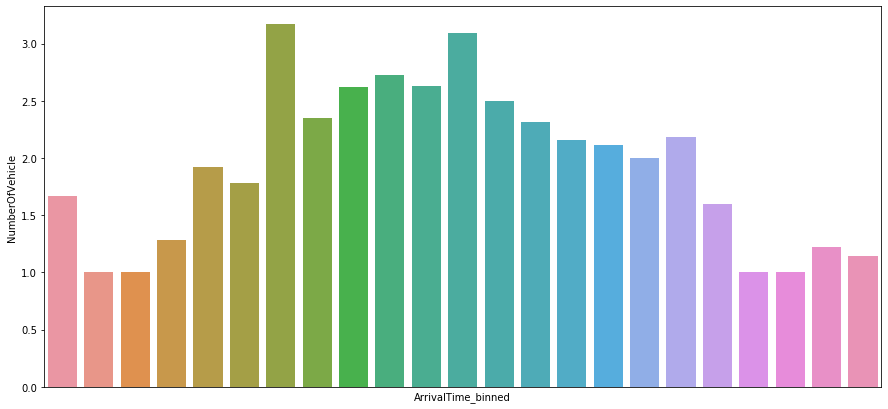

In [51]:
plt.subplots(figsize=(15,7));
chart = sn.barplot(x='ArrivalTime_binned', y='NumberOfVehicle', data=agg_data[(agg_data['WeekendOrWeekday']=='Weekday') & (agg_data['VehicleTypePurpose']=='Service Vehicle')])
plt.xticks(rotation=90);
chart.xaxis.set_major_locator(mdate.HourLocator());
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'));

#chart.xaxis_date();
plt.show();

c:\users\ishra\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


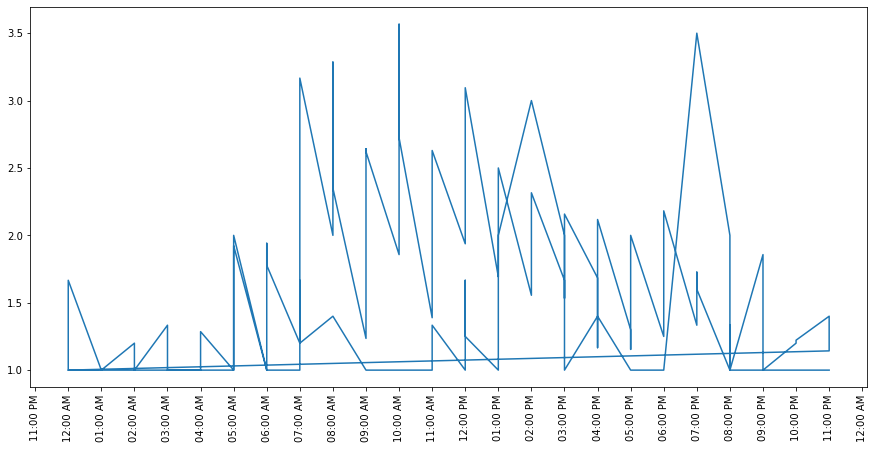

In [52]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(agg_data['ArrivalTime_binned'], agg_data['NumberOfVehicle']);

#set ticks every week
ax.xaxis.set_major_locator(mdate.HourLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.xticks(rotation=90);

In [53]:
df_arrival=df_arrivalTime_mTuWSa[['BuildingID', 'WeekendOrWeekday', 'Weekday','ArrivalTime', 'VehicleTypePurpose', 'NumberOfVehicle']];
#df_arrival.set_index('ArrivalTime').groupby(by=['BuildingID', 'WeekendOrWeekday', 'Weekday', 'VehicleTypePurpose']).resample('H', base=0)[['NumberOfVehicle']].sum().reset_index()
#d = df_arrival.groupby(by=['BuildingID', 'WeekendOrWeekday', 'Weekday', 'VehicleTypePurpose', 'ArrivalTime'])[['NumberOfVehicle']].sum()
df_arrival.set_index('ArrivalTime', inplace=True);
df_arrival.head()

BuildingID WeekendOrWeekday    Weekday  \
ArrivalTime                                                   
1900-01-01 23:30:00           1          Weekday  Wednesday   
1900-01-01 19:50:00           1          Weekday  Wednesday   
1900-01-01 14:50:00           1          Weekday  Wednesday   
1900-01-01 14:50:00           1          Weekday  Wednesday   
1900-01-01 13:30:00           1          Weekday  Wednesday   

                    VehicleTypePurpose  NumberOfVehicle  
ArrivalTime                                              
1900-01-01 23:30:00      Large Vehicle                1  
1900-01-01 19:50:00      Large Vehicle                1  
1900-01-01 14:50:00    Service Vehicle                1  
1900-01-01 14:50:00      Large Vehicle                1  
1900-01-01 13:30:00      Large Vehicle                1

In [54]:
buildingID = list(df_arrival['BuildingID'].unique())
weekendOrWeekday = list(df_arrival['WeekendOrWeekday'].unique())
weekday = list(df_arrival[df_arrival['WeekendOrWeekday']=='Weekday']['Weekday'].unique())
weekend = list(df_arrival[df_arrival['WeekendOrWeekday']=='Weekend']['Weekday'].unique())
vehicleTypePurpose = list(df_arrival['VehicleTypePurpose'].unique())
minMaxHour = [pd.to_datetime('1900-01-01 00:00:00'),  pd.to_datetime('1900-01-01 23:59:00')]
arrivalMaxMinHours_weekday=pd.DataFrame(list(itertools.product(buildingID, weekday, vehicleTypePurpose, minMaxHour)), columns=['BuildingID', 'Weekday', 'VehicleTypePurpose', 'ArrivalTime']);
arrivalMaxMinHours_weekend=pd.DataFrame(list(itertools.product(buildingID, weekend, vehicleTypePurpose, minMaxHour)), columns=['BuildingID', 'Weekday', 'VehicleTypePurpose', 'ArrivalTime']);
arrivalMaxMinHours = arrivalMaxMinHours_weekday.append(arrivalMaxMinHours_weekend);
arrivalMaxMinHours['NumberOfVehicle']=np.nan;
arrivalMaxMinHours['WeekendOrWeekday'] = [('Weekend' if x in ('Saturday', 'Sunday') else 'Weekday') for x in arrivalMaxMinHours['Weekday']]
arrivalMaxMinHours = arrivalMaxMinHours[['BuildingID', 'WeekendOrWeekday', 'Weekday', 'VehicleTypePurpose', 'ArrivalTime', 'NumberOfVehicle']]
arrivalMaxMinHours.reset_index(drop=True, inplace=True)
arrivalMaxMinHours.set_index('ArrivalTime', inplace=True)
arrivalMaxMinHours.head()

BuildingID WeekendOrWeekday    Weekday  \
ArrivalTime                                                   
1900-01-01 00:00:00           1          Weekday  Wednesday   
1900-01-01 23:59:00           1          Weekday  Wednesday   
1900-01-01 00:00:00           1          Weekday  Wednesday   
1900-01-01 23:59:00           1          Weekday  Wednesday   
1900-01-01 00:00:00           1          Weekday  Wednesday   

                          VehicleTypePurpose  NumberOfVehicle  
ArrivalTime                                                    
1900-01-01 00:00:00            Large Vehicle              NaN  
1900-01-01 23:59:00            Large Vehicle              NaN  
1900-01-01 00:00:00          Service Vehicle              NaN  
1900-01-01 23:59:00          Service Vehicle              NaN  
1900-01-01 00:00:00  Courier Service Vehicle              NaN

In [55]:
df_arrival=df_arrival.append(arrivalMaxMinHours)
df_arrival.head()

BuildingID WeekendOrWeekday    Weekday  \
ArrivalTime                                                   
1900-01-01 23:30:00           1          Weekday  Wednesday   
1900-01-01 19:50:00           1          Weekday  Wednesday   
1900-01-01 14:50:00           1          Weekday  Wednesday   
1900-01-01 14:50:00           1          Weekday  Wednesday   
1900-01-01 13:30:00           1          Weekday  Wednesday   

                    VehicleTypePurpose  NumberOfVehicle  
ArrivalTime                                              
1900-01-01 23:30:00      Large Vehicle              1.0  
1900-01-01 19:50:00      Large Vehicle              1.0  
1900-01-01 14:50:00    Service Vehicle              1.0  
1900-01-01 14:50:00      Large Vehicle              1.0  
1900-01-01 13:30:00      Large Vehicle              1.0

In [56]:
df_arrival_hour=df_arrival.groupby(by = ['BuildingID', 'WeekendOrWeekday', 'Weekday', 'VehicleTypePurpose'])[['NumberOfVehicle']].resample('H').count().reset_index()
df_arrival_hour.rename(columns={'ArrivalTime':'ArrivalTime_Hourly'}, inplace=True)
df_arrival_hour

BuildingID WeekendOrWeekday Weekday       VehicleTypePurpose  \
0              1          Weekday  Monday  Courier Service Vehicle   
1              1          Weekday  Monday  Courier Service Vehicle   
2              1          Weekday  Monday  Courier Service Vehicle   
3              1          Weekday  Monday  Courier Service Vehicle   
4              1          Weekday  Monday  Courier Service Vehicle   
...          ...              ...     ...                      ...   
3451          12          Weekend  Sunday          Service Vehicle   
3452          12          Weekend  Sunday          Service Vehicle   
3453          12          Weekend  Sunday          Service Vehicle   
3454          12          Weekend  Sunday          Service Vehicle   
3455          12          Weekend  Sunday          Service Vehicle   

      ArrivalTime_Hourly  NumberOfVehicle  
0    1900-01-01 00:00:00                0  
1    1900-01-01 01:00:00                0  
2    1900-01-01 02:00:00                0  
3    1900-01-01 03:00:00                0  
4    1900-01-01 04:00:00                0  
...                  ...              ...  
3451 1900-01-01 19:00:00                0  
3452 1900-01-01 20:00:00                0  
3453 1900-01-01 21:00:00                0  
3454 1900-01-01 22:00:00                0  
3455 1900-01-01 23:00:00                0  

[3456 rows x 6 columns]

In [57]:
df_arrival_hour.describe(include='all')

BuildingID WeekendOrWeekday  Weekday VehicleTypePurpose  \
count   3456.000000             3456     3456               3456   
unique          NaN                2        4                  3   
top             NaN          Weekday  Tuesday    Service Vehicle   
freq            NaN             2592      864               1152   
first           NaN              NaN      NaN                NaN   
last            NaN              NaN      NaN                NaN   
mean       6.500000              NaN      NaN                NaN   
std        3.452552              NaN      NaN                NaN   
min        1.000000              NaN      NaN                NaN   
25%        3.750000              NaN      NaN                NaN   
50%        6.500000              NaN      NaN                NaN   
75%        9.250000              NaN      NaN                NaN   
max       12.000000              NaN      NaN                NaN   

         ArrivalTime_Hourly  NumberOfVehicle  
count                  3456      3456.000000  
unique                   24              NaN  
top     1900-01-01 12:00:00              NaN  
freq                    144              NaN  
first   1900-01-01 00:00:00              NaN  
last    1900-01-01 23:00:00              NaN  
mean                    NaN         0.545139  
std                     NaN         1.285448  
min                     NaN         0.000000  
25%                     NaN         0.000000  
50%                     NaN         0.000000  
75%                     NaN         1.000000  
max                     NaN        13.000000

In [58]:
temp = df_arrival_hour.groupby(['VehicleTypePurpose','ArrivalTime_Hourly'], as_index=False)['NumberOfVehicle'].mean()
temp['WeekendOrWeekday'] = 'Any Day'
agg_data = df_arrival_hour.groupby(['WeekendOrWeekday', 'VehicleTypePurpose','ArrivalTime_Hourly'], as_index=False)['NumberOfVehicle'].mean().append(temp).reset_index(drop=True)

#agg_data_all

largeVehicleWeekdayTotal=agg_data[(agg_data['VehicleTypePurpose']=='Large Vehicle')&(agg_data['WeekendOrWeekday']=='Weekday')].sum()
courierServiceVehicleWeekdayTotal=agg_data[(agg_data['VehicleTypePurpose']=='Courier Service Vehicle')&(agg_data['WeekendOrWeekday']=='Weekday')].sum()
serviceVehicleWeekdayTotal=agg_data[(agg_data['VehicleTypePurpose']=='Service Vehicle')&(agg_data['WeekendOrWeekday']=='Weekday')].sum()
allVehicleWeekdayTotal = agg_data[(agg_data['WeekendOrWeekday']=='Weekday')].sum()

largeVehicleWeekendTotal=agg_data[(agg_data['VehicleTypePurpose']=='Large Vehicle')&(agg_data['WeekendOrWeekday']=='Weekend')].sum()
courierServiceVehicleWeekendTotal=agg_data[(agg_data['VehicleTypePurpose']=='Courier Service Vehicle')&(agg_data['WeekendOrWeekday']=='Weekend')].sum()
serviceVehicleWeekendTotal=agg_data[(agg_data['VehicleTypePurpose']=='Service Vehicle')&(agg_data['WeekendOrWeekday']=='Weekend')].sum()
allVehicleWeekendTotal = agg_data[(agg_data['WeekendOrWeekday']=='Weekend')].sum()

largeVehicleAnydayTotal=agg_data[(agg_data['VehicleTypePurpose']=='Large Vehicle')&(agg_data['WeekendOrWeekday']=='Any Day')].sum()
courierServiceVehicleAnydayTotal=agg_data[(agg_data['VehicleTypePurpose']=='Courier Service Vehicle')&(agg_data['WeekendOrWeekday']=='Any Day')].sum()
serviceVehicleAnydayTotal=agg_data[(agg_data['VehicleTypePurpose']=='Service Vehicle')&(agg_data['WeekendOrWeekday']=='Any Day')].sum()
allVehicleAnydayTotal = agg_data[(agg_data['WeekendOrWeekday']=='Any Day')].sum()


PercentageOfDailyParkingDemand = (agg_data[(agg_data['VehicleTypePurpose']=='Large Vehicle')&(agg_data['WeekendOrWeekday']=='Weekday')]['NumberOfVehicle']/largeVehicleWeekdayTotal[0]*100)
PercentageOfDailyParkingDemand = PercentageOfDailyParkingDemand.append(agg_data[(agg_data['VehicleTypePurpose']=='Courier Service Vehicle')&(agg_data['WeekendOrWeekday']=='Weekday')]['NumberOfVehicle']/courierServiceVehicleWeekdayTotal[0]*100)
PercentageOfDailyParkingDemand = PercentageOfDailyParkingDemand.append(agg_data[(agg_data['VehicleTypePurpose']=='Service Vehicle')&(agg_data['WeekendOrWeekday']=='Weekday')]['NumberOfVehicle']/serviceVehicleWeekdayTotal[0]*100)

PercentageOfDailyParkingDemand = PercentageOfDailyParkingDemand.append(agg_data[(agg_data['VehicleTypePurpose']=='Large Vehicle')&(agg_data['WeekendOrWeekday']=='Weekend')]['NumberOfVehicle']/largeVehicleWeekendTotal[0]*100)
PercentageOfDailyParkingDemand = PercentageOfDailyParkingDemand.append(agg_data[(agg_data['VehicleTypePurpose']=='Courier Service Vehicle')&(agg_data['WeekendOrWeekday']=='Weekend')]['NumberOfVehicle']/courierServiceVehicleWeekendTotal[0]*100)
PercentageOfDailyParkingDemand = PercentageOfDailyParkingDemand.append(agg_data[(agg_data['VehicleTypePurpose']=='Service Vehicle')&(agg_data['WeekendOrWeekday']=='Weekend')]['NumberOfVehicle']/serviceVehicleWeekendTotal[0]*100)

PercentageOfDailyParkingDemand = PercentageOfDailyParkingDemand.append(agg_data[(agg_data['VehicleTypePurpose']=='Large Vehicle')&(agg_data['WeekendOrWeekday']=='Any Day')]['NumberOfVehicle']/largeVehicleAnydayTotal[0]*100)
PercentageOfDailyParkingDemand = PercentageOfDailyParkingDemand.append(agg_data[(agg_data['VehicleTypePurpose']=='Courier Service Vehicle')&(agg_data['WeekendOrWeekday']=='Any Day')]['NumberOfVehicle']/courierServiceVehicleAnydayTotal[0]*100)
PercentageOfDailyParkingDemand = PercentageOfDailyParkingDemand.append(agg_data[(agg_data['VehicleTypePurpose']=='Service Vehicle')&(agg_data['WeekendOrWeekday']=='Any Day')]['NumberOfVehicle']/serviceVehicleAnydayTotal[0]*100)

PercentageOfDailyParkingDemand.sort_index(inplace=True)
PercentageOfDailyParkingDemand=pd.DataFrame(PercentageOfDailyParkingDemand)
PercentageOfDailyParkingDemand.rename(columns={'NumberOfVehicle':'PercentageOfDailyParkingDemandByVehicleType'}, inplace=True)
PercentageOfDailyParkingDemand
agg_data=pd.merge(agg_data, PercentageOfDailyParkingDemand, left_index=True, right_index=True)

agg_data
#agg_data.to_csv('agg_data.csv')
#d=agg_data.groupby(['VehicleTypePurpose', 'WeekendOrWeekday'], as_index=False)['PercentageOfDailyParkingDemandByVehicleType'].sum()
#d
#pd.set_option('display.max_rows',20)

c:\users\ishra\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


ArrivalTime_Hourly  NumberOfVehicle       VehicleTypePurpose  \
0   1900-01-01 00:00:00         0.027778  Courier Service Vehicle   
1   1900-01-01 01:00:00         0.027778  Courier Service Vehicle   
2   1900-01-01 02:00:00         0.000000  Courier Service Vehicle   
3   1900-01-01 03:00:00         0.000000  Courier Service Vehicle   
4   1900-01-01 04:00:00         0.000000  Courier Service Vehicle   
5   1900-01-01 05:00:00         0.027778  Courier Service Vehicle   
6   1900-01-01 06:00:00         0.027778  Courier Service Vehicle   
7   1900-01-01 07:00:00         0.166667  Courier Service Vehicle   
8   1900-01-01 08:00:00         0.111111  Courier Service Vehicle   
9   1900-01-01 09:00:00         0.583333  Courier Service Vehicle   
10  1900-01-01 10:00:00         1.083333  Courier Service Vehicle   
11  1900-01-01 11:00:00         0.694444  Courier Service Vehicle   
12  1900-01-01 12:00:00         0.861111  Courier Service Vehicle   
13  1900-01-01 13:00:00         0.611111  Courier Service Vehicle   
14  1900-01-01 14:00:00         0.777778  Courier Service Vehicle   
15  1900-01-01 15:00:00         0.833333  Courier Service Vehicle   
16  1900-01-01 16:00:00         0.888889  Courier Service Vehicle   
17  1900-01-01 17:00:00         0.361111  Courier Service Vehicle   
18  1900-01-01 18:00:00         0.277778  Courier Service Vehicle   
19  1900-01-01 19:00:00         0.333333  Courier Service Vehicle   
20  1900-01-01 20:00:00         0.055556  Courier Service Vehicle   
21  1900-01-01 21:00:00         0.000000  Courier Service Vehicle   
22  1900-01-01 22:00:00         0.000000  Courier Service Vehicle   
23  1900-01-01 23:00:00         0.000000  Courier Service Vehicle   
24  1900-01-01 00:00:00         0.250000            Large Vehicle   
25  1900-01-01 01:00:00         0.083333            Large Vehicle   
26  1900-01-01 02:00:00         0.166667            Large Vehicle   
27  1900-01-01 03:00:00         0.222222            Large Vehicle   
28  1900-01-01 04:00:00         0.111111            Large Vehicle   
29  1900-01-01 05:00:00         0.472222            Large Vehicle   
30  1900-01-01 06:00:00         0.916667            Large Vehicle   
31  1900-01-01 07:00:00         2.111111            Large Vehicle   
32  1900-01-01 08:00:00         1.916667            Large Vehicle   
33  1900-01-01 09:00:00         2.055556            Large Vehicle   
34  1900-01-01 10:00:00         2.972222            Large Vehicle   
35  1900-01-01 11:00:00         2.000000            Large Vehicle   
36  1900-01-01 12:00:00         2.000000            Large Vehicle   
37  1900-01-01 13:00:00         1.361111            Large Vehicle   
38  1900-01-01 14:00:00         0.916667            Large Vehicle   
39  1900-01-01 15:00:00         0.638889            Large Vehicle   
40  1900-01-01 16:00:00         0.388889            Large Vehicle   
41  1900-01-01 17:00:00         0.416667            Large Vehicle   
42  1900-01-01 18:00:00         0.250000            Large Vehicle   
43  1900-01-01 19:00:00         0.527778            Large Vehicle   
44  1900-01-01 20:00:00         0.222222            Large Vehicle   
45  1900-01-01 21:00:00         0.361111            Large Vehicle   
46  1900-01-01 22:00:00         0.166667            Large Vehicle   
47  1900-01-01 23:00:00         0.194444            Large Vehicle   
48  1900-01-01 00:00:00         0.138889          Service Vehicle   
49  1900-01-01 01:00:00         0.000000          Service Vehicle   
50  1900-01-01 02:00:00         0.027778          Service Vehicle   
51  1900-01-01 03:00:00         0.055556          Service Vehicle   
52  1900-01-01 04:00:00         0.250000          Service Vehicle   
53  1900-01-01 05:00:00         0.694444          Service Vehicle   
54  1900-01-01 06:00:00         0.888889          Service Vehicle   
55  1900-01-01 07:00:00         1.583333          Service Vehicle   
56  1900-01-01 08:00:00         1.305556          Service Vehicle   
57 

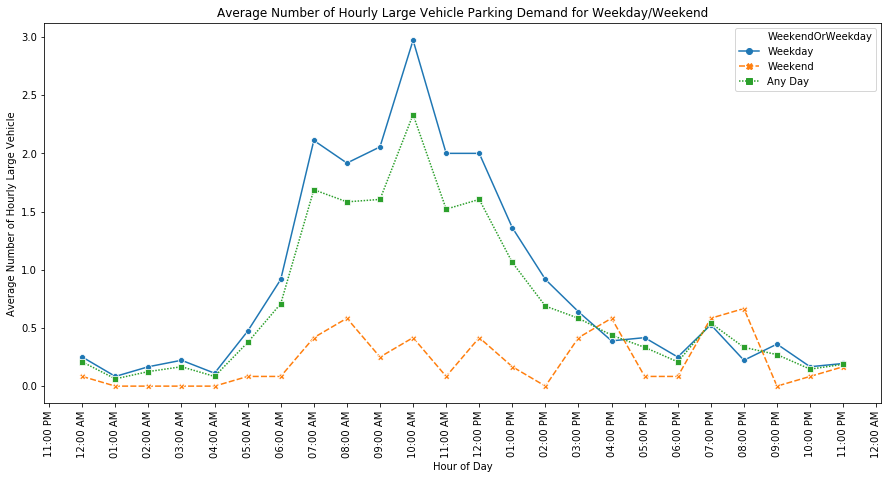

In [59]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='NumberOfVehicle', hue='WeekendOrWeekday', data=agg_data[(agg_data['VehicleTypePurpose']=='Large Vehicle')],\
                 style='WeekendOrWeekday', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Average Number of Hourly Large Vehicle Parking Demand for Weekday/Weekend')
plt.ylabel('Average Number of Hourly Large Vehicle')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.savefig('Average Number of Hourly Large Vehicle Parking Demand for Weekday_Weekend.png')
plt.show()


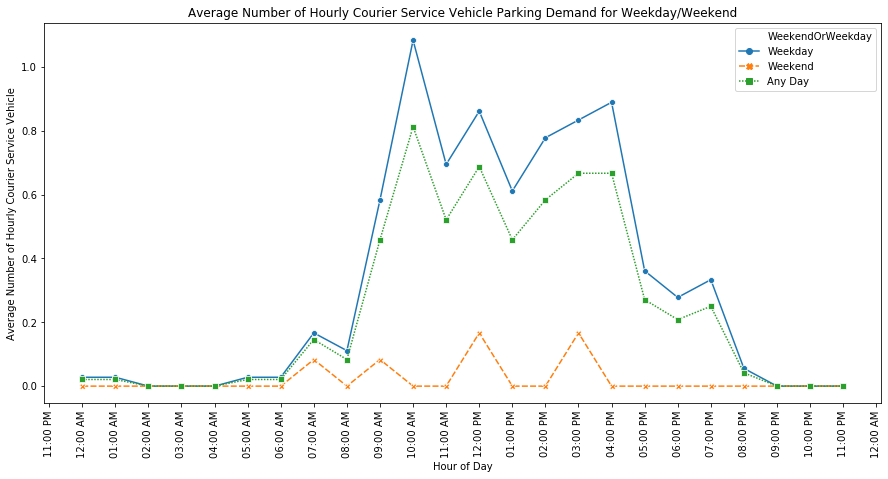

In [60]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='NumberOfVehicle', hue='WeekendOrWeekday', data=agg_data[(agg_data['VehicleTypePurpose']=='Courier Service Vehicle')],\
                 style='WeekendOrWeekday', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Average Number of Hourly Courier Service Vehicle Parking Demand for Weekday/Weekend')
plt.ylabel('Average Number of Hourly Courier Service Vehicle')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.savefig('Average Number of Hourly Courier Service Vehicle Parking Demand for Weekday_Weekend.png')
plt.show()

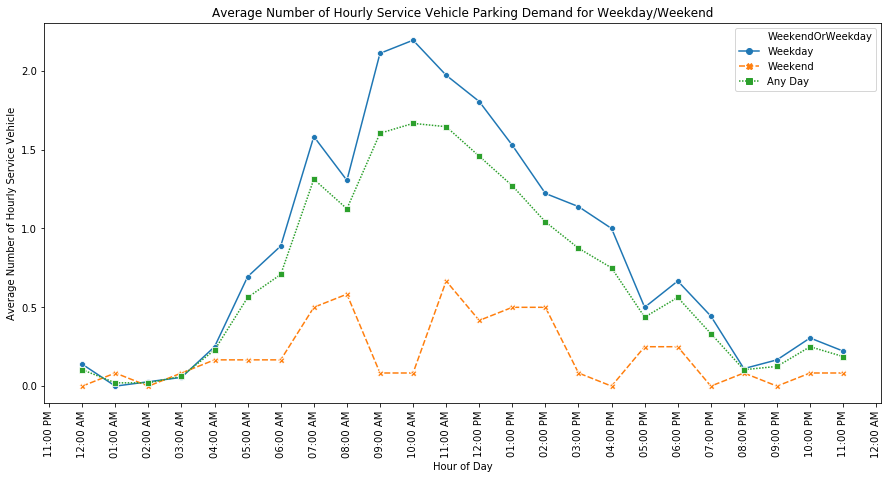

In [61]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='NumberOfVehicle', hue='WeekendOrWeekday', data=agg_data[(agg_data['VehicleTypePurpose']=='Service Vehicle')],\
                 style='WeekendOrWeekday', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Average Number of Hourly Service Vehicle Parking Demand for Weekday/Weekend')
plt.ylabel('Average Number of Hourly Service Vehicle')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.savefig('Average Number of Hourly Service Vehicle Parking Demand for Weekday_Weekend.png')
plt.show()


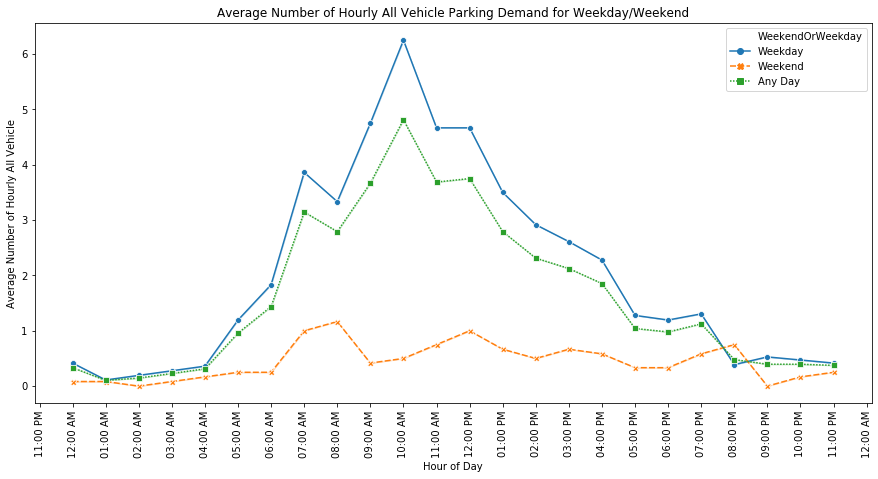

In [62]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='NumberOfVehicle', hue='WeekendOrWeekday', data=agg_data,\
                 style='WeekendOrWeekday', markers=True, legend ='full', estimator = 'sum', ci=False)
plt.xticks(rotation=90)
plt.title('Average Number of Hourly All Vehicle Parking Demand for Weekday/Weekend')
plt.ylabel('Average Number of Hourly All Vehicle')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.savefig('Average Number of Hourly All Vehicle Parking Demand for Weekday_Weekend.png')
plt.show()

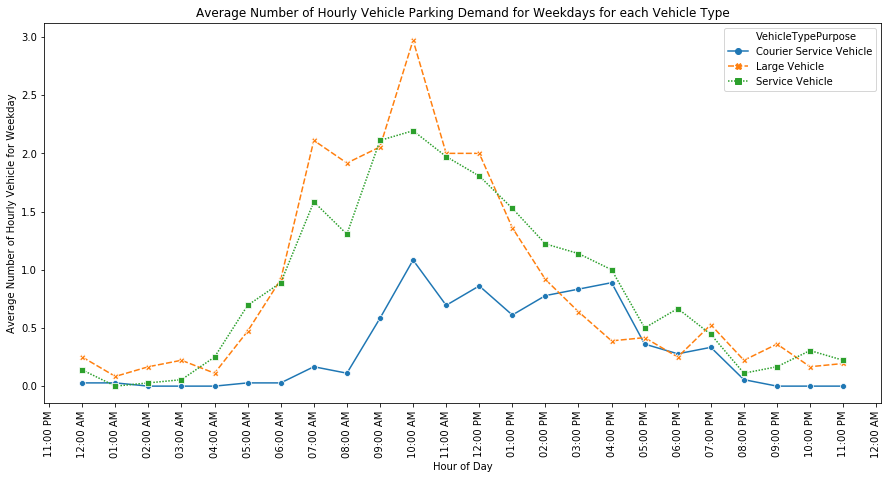

In [63]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='NumberOfVehicle', hue='VehicleTypePurpose', data=agg_data.query("WeekendOrWeekday=='Weekday'"),\
                 style='VehicleTypePurpose', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Average Number of Hourly Vehicle Parking Demand for Weekdays for each Vehicle Type')
plt.ylabel('Average Number of Hourly Vehicle for Weekday')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.show()

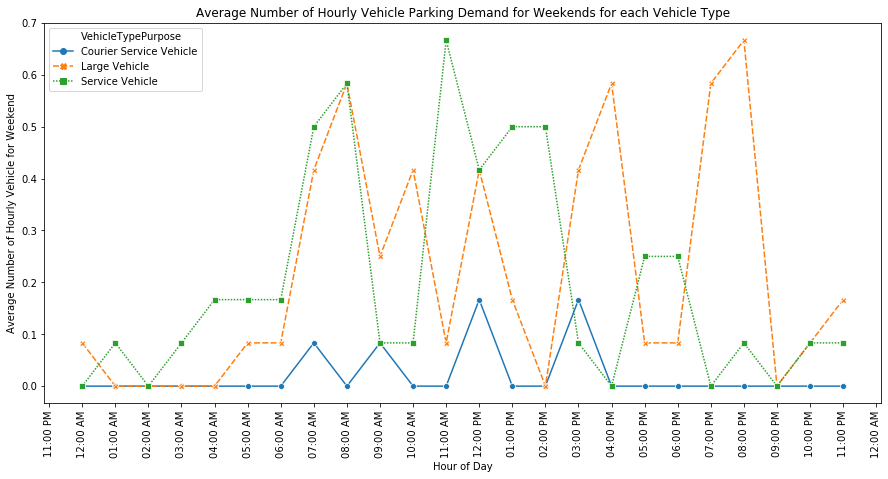

In [64]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='NumberOfVehicle', hue='VehicleTypePurpose', data=agg_data.query("WeekendOrWeekday=='Weekend'"),\
                 style='VehicleTypePurpose', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Average Number of Hourly Vehicle Parking Demand for Weekends for each Vehicle Type')
plt.ylabel('Average Number of Hourly Vehicle for Weekend')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.show()

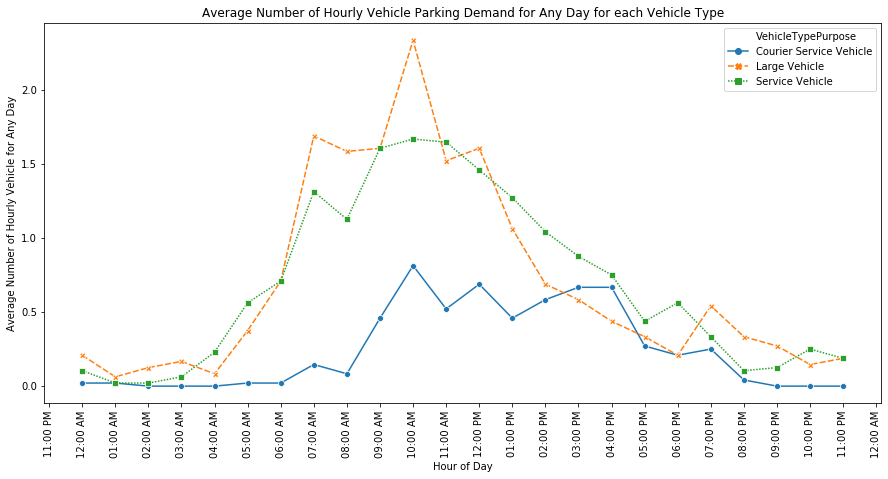

In [65]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='NumberOfVehicle', hue='VehicleTypePurpose', data=agg_data.query("WeekendOrWeekday=='Any Day'"),\
                 style='VehicleTypePurpose', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Average Number of Hourly Vehicle Parking Demand for Any Day for each Vehicle Type')
plt.ylabel('Average Number of Hourly Vehicle for Any Day')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.show()

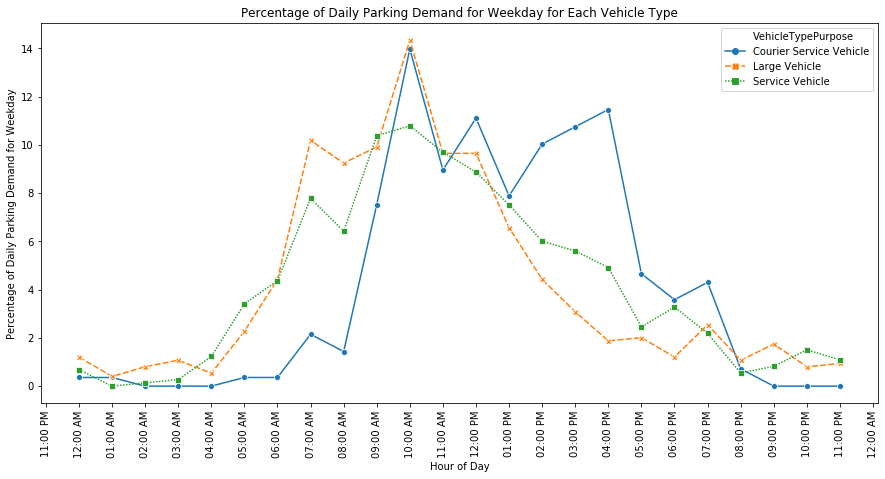

In [66]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='PercentageOfDailyParkingDemandByVehicleType', hue='VehicleTypePurpose', data=agg_data.query("WeekendOrWeekday=='Weekday'"),\
                 style='VehicleTypePurpose', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Percentage of Daily Parking Demand for Weekday for Each Vehicle Type')
plt.ylabel('Percentage of Daily Parking Demand for Weekday')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.savefig('Percentage of Daily Parking Demand for Weekday for Each Vehicle Type.png')
plt.show()

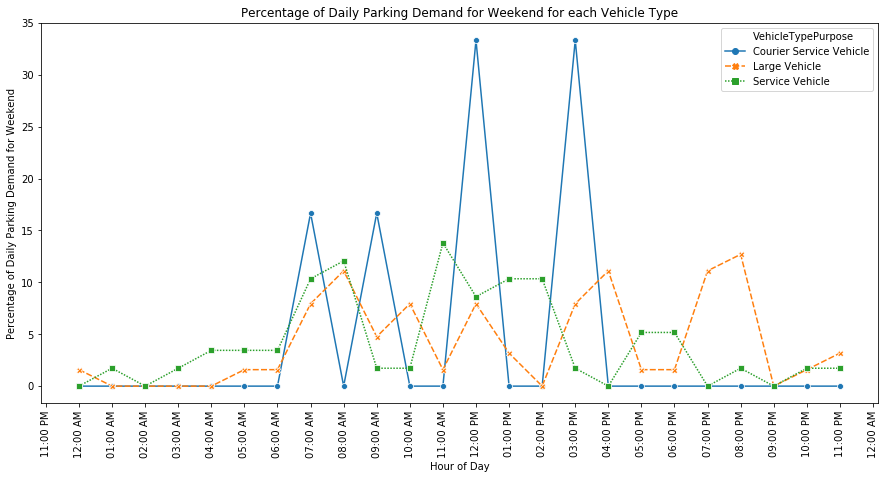

In [67]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='PercentageOfDailyParkingDemandByVehicleType', hue='VehicleTypePurpose', data=agg_data.query("WeekendOrWeekday=='Weekend'"),\
                 style='VehicleTypePurpose', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Percentage of Daily Parking Demand for Weekend for each Vehicle Type')
plt.ylabel('Percentage of Daily Parking Demand for Weekend')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.savefig('Percentage of Daily Parking Demand for Weekend for Each Vehicle Type.png')
plt.show()

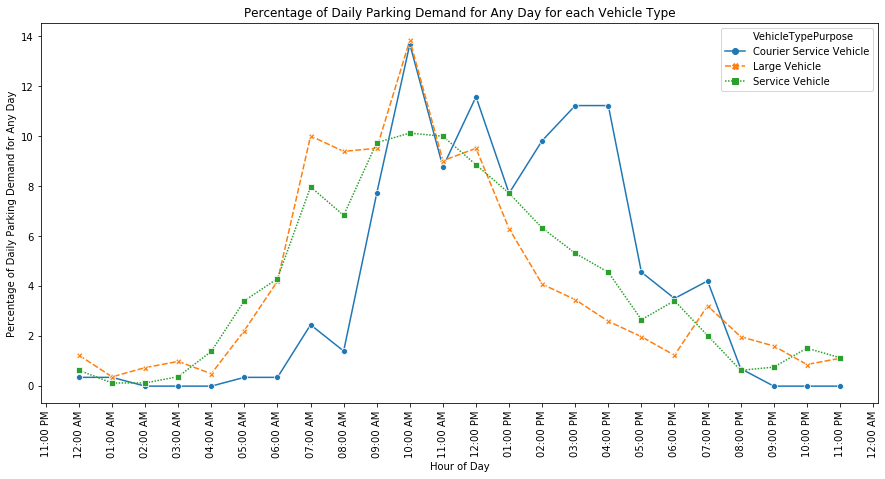

In [68]:
plt.subplots(figsize=(15,7));
chart=sn.lineplot(x='ArrivalTime_Hourly', y='PercentageOfDailyParkingDemandByVehicleType', hue='VehicleTypePurpose', data=agg_data.query("WeekendOrWeekday=='Any Day'"),\
                 style='VehicleTypePurpose', markers=True, legend ='full')
plt.xticks(rotation=90)
plt.title('Percentage of Daily Parking Demand for Any Day for each Vehicle Type')
plt.ylabel('Percentage of Daily Parking Demand for Any Day')
plt.xlabel('Hour of Day')
chart.xaxis.set_major_locator(mdate.HourLocator())
chart.xaxis.set_major_formatter(mdate.DateFormatter('%I:%M %p'))
plt.savefig('Percentage of Daily Parking Demand for Any Day for Each Vehicle Type.png')
plt.show()

In [69]:
commercialLoadingHour = agg_data[(agg_data['ArrivalTime_Hourly']>='1900-01-01 7:00:00') & (agg_data['ArrivalTime_Hourly']<='1900-01-01 18:00:00')]
commercialLoadingHour=commercialLoadingHour.groupby(['WeekendOrWeekday','VehicleTypePurpose'], as_index=False)[['PercentageOfDailyParkingDemandByVehicleType', 'NumberOfVehicle']].sum()
commercialLoadingHour["TimePeriod"]='7:00 AM to 7:00 PM'
commercialLoadingHour
notCommercialLoadingHour = agg_data[(agg_data['ArrivalTime_Hourly']<'1900-01-01 7:00:00') | (agg_data['ArrivalTime_Hourly']>'1900-01-01 18:00:00')]
notCommercialLoadingHour = notCommercialLoadingHour.groupby(['WeekendOrWeekday','VehicleTypePurpose'], as_index=False)[['PercentageOfDailyParkingDemandByVehicleType', 'NumberOfVehicle']].sum()
notCommercialLoadingHour["TimePeriod"]='7:00 PM to 7:00 AM'
notCommercialLoadingHour
agg_data_groupedByCommercialLoadingHour = commercialLoadingHour.append(notCommercialLoadingHour)
agg_data_groupedByCommercialLoadingHour.reset_index(drop=True, inplace=True)
agg_data_groupedByCommercialLoadingHour


WeekendOrWeekday       VehicleTypePurpose  \
0           Any Day  Courier Service Vehicle   
1           Any Day            Large Vehicle   
2           Any Day          Service Vehicle   
3           Weekday  Courier Service Vehicle   
4           Weekday            Large Vehicle   
5           Weekday          Service Vehicle   
6           Weekend  Courier Service Vehicle   
7           Weekend            Large Vehicle   
8           Weekend          Service Vehicle   
9           Any Day  Courier Service Vehicle   
10          Any Day            Large Vehicle   
11          Any Day          Service Vehicle   
12          Weekday  Courier Service Vehicle   
13          Weekday            Large Vehicle   
14          Weekday          Service Vehicle   
15          Weekend  Courier Service Vehicle   
16          Weekend            Large Vehicle   
17          Weekend          Service Vehicle   

    PercentageOfDailyParkingDemandByVehicleType  NumberOfVehicle  \
0                                     93.684211         5.562500   
1                                     80.964153        13.645833   
2                                     83.544304        13.750000   
3                                     93.548387         7.250000   
4                                     82.171582        17.027778   
5                                     83.743169        17.027778   
6                                    100.000000         0.500000   
7                                     66.666667         3.500000   
8                                     81.034483         3.916667   
9                                      6.315789         0.375000   
10                                    19.035847         3.208333   
11                                    16.455696         2.708333   
12                                     6.451613         0.500000   
13                                    17.828418         3.694444   
14                                    16.256831         3.305556   
15                                     0.000000         0.000000   
16                                    33.333333         1.750000   
17                                    18.965517         0.916667   

            TimePeriod  
0   7:00 AM to 7:00 PM  
1   7:00 AM to 7:00 PM  
2   7:00 AM to 7:00 PM  
3   7:00 AM to 7:00 PM  
4   7:00 AM to 7:00 PM  
5   7:00 AM to 7:00 PM  
6   7:00 AM to 7:00 PM  
7   7:00 AM to 7:00 PM  
8   7:00 AM to 7:00 PM  
9   7:00 PM to 7:00 AM  
10  7:00 PM to 7:00 AM  
11  7:00 PM to 7:00 AM  
12  7:00 PM to 7:00 AM  
13  7:00 PM to 7:00 AM  
14  7:00 PM to 7:00 AM  
15  7:00 PM to 7:00 AM  
16  7:00 PM to 7:00 AM  
17  7:00 PM to 7:00 AM

<h1> Percentage Of Weekday Daily Parking Demand across Commercial Loading Zone Hours Time Period and Non-Commercial Loading Zone Hours Time Period by Vehicle Type

In [70]:
PercentWeekdayDemand_pivot = agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Weekday'].pivot_table(index='TimePeriod', columns='VehicleTypePurpose', values='PercentageOfDailyParkingDemandByVehicleType', aggfunc= 'sum', margins=True)
PercentWeekdayDemand_pivot=PercentWeekdayDemand_pivot.drop(columns='All')
PercentWeekdayDemand_pivot

VehicleTypePurpose  Courier Service Vehicle  Large Vehicle  Service Vehicle
TimePeriod                                                                 
7:00 AM to 7:00 PM                93.548387      82.171582        83.743169
7:00 PM to 7:00 AM                 6.451613      17.828418        16.256831
All                              100.000000     100.000000       100.000000

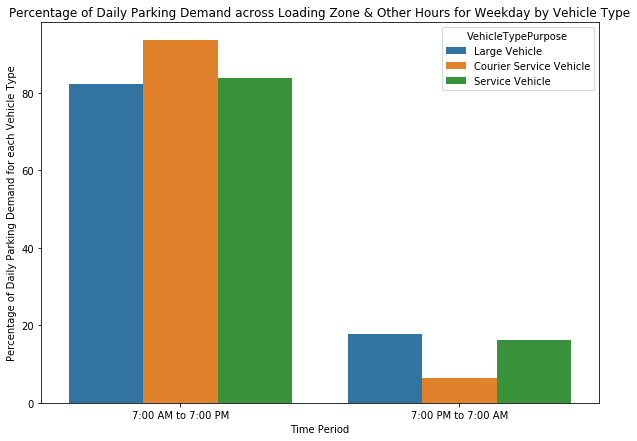

In [71]:
plt.subplots(figsize=(10,7));

sn.barplot(x='TimePeriod', y = 'PercentageOfDailyParkingDemandByVehicleType', hue='VehicleTypePurpose', hue_order=['Large Vehicle', 'Courier Service Vehicle', 'Service Vehicle'],\
           data=agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Weekday'])

plt.title('Percentage of Daily Parking Demand across Loading Zone & Other Hours for Weekday by Vehicle Type')
plt.ylabel('Percentage of Daily Parking Demand for each Vehicle Type')
plt.xlabel('Time Period');
plt.savefig('Percentage of Daily Parking Demand across Commerical Loading Zone Hours and Other Hours for Weekday by Vehicle Type.png')

<h1> Percentage Of Weekend Daily Parking Demand across Commercial Loading Zone Hours Time Period and Non-Commercial Loading Zone Hours Time Period by Vehicle Type

In [72]:
PercentWeekendDemand_pivot = agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Weekend'].pivot_table(index='TimePeriod', columns='VehicleTypePurpose', values='PercentageOfDailyParkingDemandByVehicleType', aggfunc= 'sum', margins=True)
PercentWeekendDemand_pivot=PercentWeekendDemand_pivot.drop(columns='All')
PercentWeekendDemand_pivot

VehicleTypePurpose  Courier Service Vehicle  Large Vehicle  Service Vehicle
TimePeriod                                                                 
7:00 AM to 7:00 PM                    100.0      66.666667        81.034483
7:00 PM to 7:00 AM                      0.0      33.333333        18.965517
All                                   100.0     100.000000       100.000000

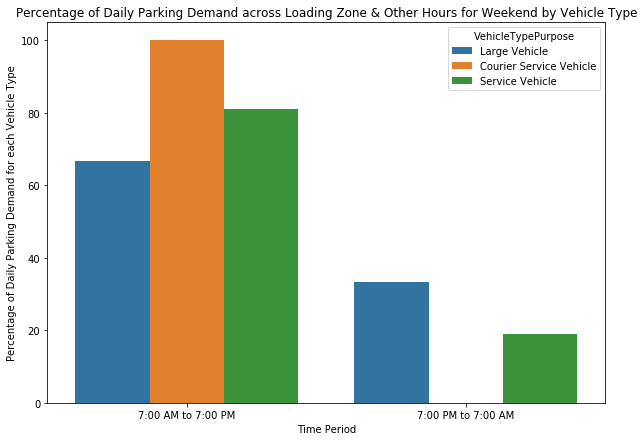

In [73]:
plt.subplots(figsize=(10,7));

sn.barplot(x='TimePeriod', y = 'PercentageOfDailyParkingDemandByVehicleType', hue='VehicleTypePurpose', hue_order=['Large Vehicle', 'Courier Service Vehicle', 'Service Vehicle'],\
           data=agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Weekend'])

plt.title('Percentage of Daily Parking Demand across Loading Zone & Other Hours for Weekend by Vehicle Type')
plt.ylabel('Percentage of Daily Parking Demand for each Vehicle Type')
plt.xlabel('Time Period');
plt.savefig('Percentage of Daily Parking Demand across Loading Zone & Other Hours for Weekend by Vehicle Type.png')

<h1> Percentage Of Any Day Daily Parking Demand across Commercial Loading Zone Hours Time Period and Non-Commercial Loading Zone Hours Time Period by Vehicle Type

In [74]:
PercentAnyDayDemand_pivot = agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Any Day'].pivot_table(index='TimePeriod', columns='VehicleTypePurpose', values='PercentageOfDailyParkingDemandByVehicleType', aggfunc= 'sum', margins=True)
PercentAnyDayDemand_pivot=PercentAnyDayDemand_pivot.drop(columns='All')
PercentAnyDayDemand_pivot

VehicleTypePurpose  Courier Service Vehicle  Large Vehicle  Service Vehicle
TimePeriod                                                                 
7:00 AM to 7:00 PM                93.684211      80.964153        83.544304
7:00 PM to 7:00 AM                 6.315789      19.035847        16.455696
All                              100.000000     100.000000       100.000000

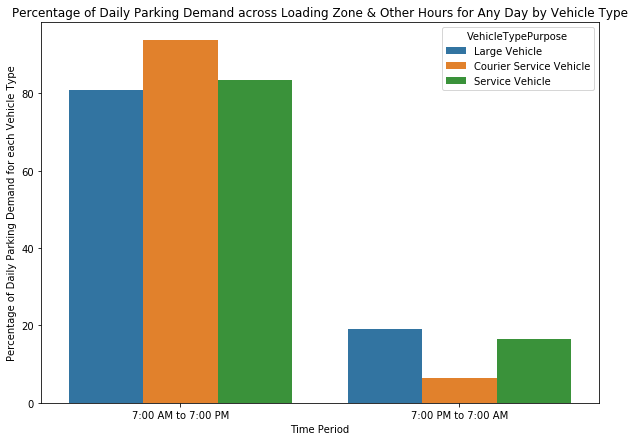

In [75]:
plt.subplots(figsize=(10,7));

sn.barplot(x='TimePeriod', y = 'PercentageOfDailyParkingDemandByVehicleType', hue='VehicleTypePurpose', hue_order=['Large Vehicle', 'Courier Service Vehicle', 'Service Vehicle'],\
           data=agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Any Day'])

plt.title('Percentage of Daily Parking Demand across Loading Zone & Other Hours for Any Day by Vehicle Type')
plt.ylabel('Percentage of Daily Parking Demand for each Vehicle Type')
plt.xlabel('Time Period');
plt.savefig('Percentage of Daily Parking Demand across Loading Zone & Other Hours for Any Day by Vehicle Type.png')

<h1> Average Number Of Vehicle Parking Demand during Commercial Loading Zone Hours Time Period and Non-Commercial Loading Zone Hours Time Period for Weekday by Vehicle Type

In [76]:
WeekdayDemand_pivot = agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Weekday'].pivot_table(index='TimePeriod', columns='VehicleTypePurpose', values='NumberOfVehicle', aggfunc= 'sum', margins=True)
WeekdayDemand_pivot = WeekdayDemand_pivot.rename(columns={'All':'All Vehicle'}, index={'All':'Daily Total'})
WeekdayDemand_pivot

VehicleTypePurpose  Courier Service Vehicle  Large Vehicle  Service Vehicle  \
TimePeriod                                                                    
7:00 AM to 7:00 PM                     7.25      17.027778        17.027778   
7:00 PM to 7:00 AM                     0.50       3.694444         3.305556   
Daily Total                            7.75      20.722222        20.333333   

VehicleTypePurpose  All Vehicle  
TimePeriod                       
7:00 AM to 7:00 PM    41.305556  
7:00 PM to 7:00 AM     7.500000  
Daily Total           48.805556

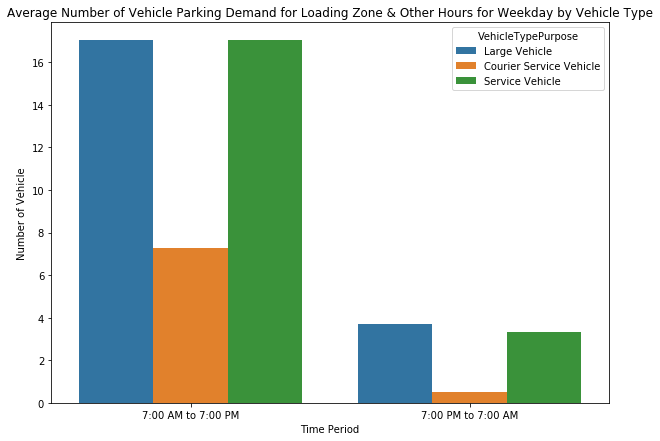

In [77]:
plt.subplots(figsize=(10,7));

sn.barplot(x='TimePeriod', y = 'NumberOfVehicle', hue='VehicleTypePurpose', hue_order=['Large Vehicle', 'Courier Service Vehicle', 'Service Vehicle'],\
           data=agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Weekday'])

plt.title('Average Number of Vehicle Parking Demand for Loading Zone & Other Hours for Weekday by Vehicle Type')
plt.ylabel('Number of Vehicle')
plt.xlabel('Time Period');
plt.savefig('Average Number of Vehicle Parking Demand for Loading Zone & Other Hours for Weekday by Vehicle Type.png')

<h1> Average Number Of Vehicle Parking Demand during Commercial Loading Zone Hours Time Period and Non-Commercial Loading Zone Hours Time Period for Weekend by Vehicle Type

In [78]:
WeekendDemand_pivot = agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Weekend'].pivot_table(index='TimePeriod', columns='VehicleTypePurpose', values='NumberOfVehicle', aggfunc= 'sum', margins=True)
WeekendDemand_pivot = WeekendDemand_pivot.rename(columns={'All':'All Vehicle'}, index={'All':'Daily Total'})
WeekendDemand_pivot

VehicleTypePurpose  Courier Service Vehicle  Large Vehicle  Service Vehicle  \
TimePeriod                                                                    
7:00 AM to 7:00 PM                      0.5           3.50         3.916667   
7:00 PM to 7:00 AM                      0.0           1.75         0.916667   
Daily Total                             0.5           5.25         4.833333   

VehicleTypePurpose  All Vehicle  
TimePeriod                       
7:00 AM to 7:00 PM     7.916667  
7:00 PM to 7:00 AM     2.666667  
Daily Total           10.583333

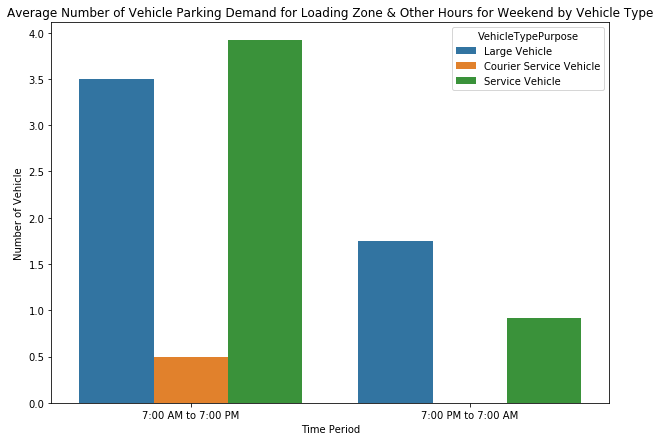

In [79]:
plt.subplots(figsize=(10,7));

sn.barplot(x='TimePeriod', y = 'NumberOfVehicle', hue='VehicleTypePurpose', hue_order=['Large Vehicle', 'Courier Service Vehicle', 'Service Vehicle'],\
           data=agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Weekend'])

plt.title('Average Number of Vehicle Parking Demand for Loading Zone & Other Hours for Weekend by Vehicle Type')
plt.ylabel('Number of Vehicle')
plt.xlabel('Time Period');
plt.savefig('Average Number of Vehicle Parking Demand for Loading Zone & Other Hours for Weekend by Vehicle Type.png')

<h1> Average Number Of Vehicle Parking Demand during Commercial Loading Zone Hours Time Period and Non-Commercial Loading Zone Hours Time Period for Any Day by Vehicle Type

In [80]:
AnyDayDemand_pivot = agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Any Day'].pivot_table(index='TimePeriod', columns='VehicleTypePurpose', values='NumberOfVehicle', aggfunc= 'sum', margins=True)
AnyDayDemand_pivot = AnyDayDemand_pivot.rename(columns={'All':'All Vehicle'}, index={'All':'Daily Total'})
AnyDayDemand_pivot

VehicleTypePurpose  Courier Service Vehicle  Large Vehicle  Service Vehicle  \
TimePeriod                                                                    
7:00 AM to 7:00 PM                   5.5625      13.645833        13.750000   
7:00 PM to 7:00 AM                   0.3750       3.208333         2.708333   
Daily Total                          5.9375      16.854167        16.458333   

VehicleTypePurpose  All Vehicle  
TimePeriod                       
7:00 AM to 7:00 PM    32.958333  
7:00 PM to 7:00 AM     6.291667  
Daily Total           39.250000

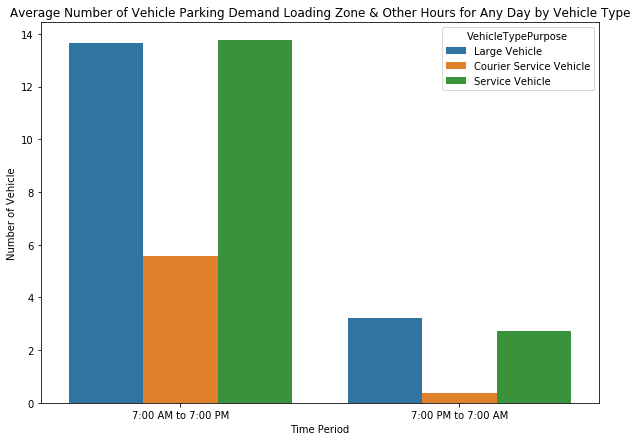

In [81]:
plt.subplots(figsize=(10,7));

sn.barplot(x='TimePeriod', y = 'NumberOfVehicle', hue='VehicleTypePurpose', hue_order=['Large Vehicle', 'Courier Service Vehicle', 'Service Vehicle'],\
           data=agg_data_groupedByCommercialLoadingHour[agg_data_groupedByCommercialLoadingHour['WeekendOrWeekday']=='Any Day'])

plt.title('Average Number of Vehicle Parking Demand Loading Zone & Other Hours for Any Day by Vehicle Type')
plt.ylabel('Number of Vehicle')
plt.xlabel('Time Period');
plt.savefig('Average Number of Vehicle Parking Demand for Loading Zone & Other Hours for Any Day by Vehicle Type.png')

<h1>

<H1>Weekly Analysis

<h1>

In [82]:
allVehicleWeeklyNumber = allVehicle_df.groupby(['BuildingID'], as_index=False)[['LargeVehicle_NumberOfVehiclesPerDay','CourierServiceVehicle_NumberOfVehiclesPerDay',\
                                                       'ServiceVehicle_NumberOfVehiclesPerDay','AllVehicle_NumberOfVehiclesPerDay']].sum().reset_index(drop=True)
allVehicleWeeklyNumber.sum()
allVehicleWeekly = pd.merge(df_buildingChar, allVehicleWeeklyNumber,\
         left_on=['BuildingID'], right_on=['BuildingID'], how='inner');
allVehicleWeekly = allVehicleWeekly.rename(columns={'LargeVehicle_NumberOfVehiclesPerDay':'LargeVehicle_NumberOfVehiclesPerWeek',\
                                                    'CourierServiceVehicle_NumberOfVehiclesPerDay':'CourierServiceVehicle_NumberOfVehiclesPerWeek',
                                                       'ServiceVehicle_NumberOfVehiclesPerDay':'ServiceVehicle_NumberOfVehiclesPerWeek',\
                                                    'AllVehicle_NumberOfVehiclesPerDay':'AllVehicle_NumberOfVehiclesPerWeek'});

print('allVehicleWeekly shape is', allVehicleWeekly.shape)
allVehicleWeekly.to_csv('allVehicleWeekly.csv', index=False)
allVehicleWeekly.head()

allVehicleWeekly shape is (12, 25)


BuildingID                  Address  NumberOfFloors  GroundFloorArea_ksqft  \
0           1  1025 Connecticut Ave NW              10                 30.467   
1           2           1212 4th St SE               8                 88.000   
2           3              130 M St NE              13                 85.424   
3           4             1301 U St NW               8                 35.330   
4           5        1400 Irving St NW               7                 46.241   

   TotalPerimeter_ft  SharingPerimeter_ft  NumberOfLoadingDocks  \
0                716                  285                     1   
1               1312                    0                     1   
2               1228                  612                     1   
3                916                  121                     0   
4               1237                   30                     0   

   OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  NumberOfSupermarket  \
0                                    320             164                    0   
1                                    540             400                    1   
2                                    180               0                    1   
3                                    315             200                    0   
4                                    460               0                    0   

   NumberOfRetailAndOthers  NumberOfAccomodationAndFood  \
0                        5                            2   
1                        1                            3   
2                        0                            1   
3                        1                            4   
4                        0                            6   

   NumberOfNonFreightIntensiveAtGF  SupermarketArea_ksqft  \
0                                2                0.00000   
1                                3               31.06400   
2                                0               41.00352   
3                                1                0.00000   
4                                1                0.00000   

   RetailAndOthersArea_ksqft  AccomodationAndFoodArea_ksqft  \
0                  11.912597                       3.960710   
1                   4.048000                      10.560000   
2                   0.000000                      11.105120   
3                   4.062950                      11.305600   
4                   0.000000                      12.762516   

   NonFreightIntensiveAtGFArea_ksqft  NumberOfResidentialUnits  \
0                           5.301258                         0   
1                           7.920000                       217   
2                           0.000000                       643   
3                           1.413200                       190   
4                           2.312050                       373   

   ResidentialAreaTotal_ksqft  NumberOfCommericalOfficeAtAboveFloors  \
0                      0.0000                                    354   
1                    190.4000                                      0   
2                    651.2928                                      0   
3                    165.6200                                      0   
4                    201.7200                                      0   

   CommericalOfficeAtAboveFloorsArea_ksqft  \
0                                 219.3624   
1                                   0.0000   
2                                   0.0000   
3                                   0.0000   
4                                   0.0000   

   LargeVehicle_NumberOfVehiclesPerWeek  \
0                                   129   
1                                   251   
2                                   193   
3                                   101   
4                                    23   

   CourierServiceVehicle_NumberOfVehiclesPerWeek  \
0                                             22   
1                                             57   
2  

In [83]:
#allVehicleWeekly.to_csv("allVehicleWeekly.csv", index=False);

In [84]:
allVehicleWeekly_describe=allVehicleWeekly.describe().transpose()
allVehicleWeekly_describe.to_csv('allVehicleWeekly_describe.csv')
allVehicleWeekly_describe

count        mean         std  \
BuildingID                                      12.0    6.500000    3.605551   
NumberOfFloors                                  12.0    9.333333    2.146173   
GroundFloorArea_ksqft                           12.0   48.333500   29.222009   
TotalPerimeter_ft                               12.0  999.916667  271.089203   
SharingPerimeter_ft                             12.0  112.250000  183.929396   
NumberOfLoadingDocks                            12.0    0.583333    0.514929   
OnStreetFrontageParkingSpaceLength_ft           12.0  402.916667  180.384165   
AlleyLength_ft                                  12.0  190.583333  145.089601   
NumberOfSupermarket                             12.0    0.333333    0.492366   
NumberOfRetailAndOthers                         12.0    1.166667    1.403459   
NumberOfAccomodationAndFood                     12.0    3.166667    2.037527   
NumberOfNonFreightIntensiveAtGF                 12.0    1.833333    1.800673   
SupermarketArea_ksqft                           12.0    9.075435   15.885421   
RetailAndOthersArea_ksqft                       12.0    2.881167    3.342106   
AccomodationAndFoodArea_ksqft                   12.0    9.397581    7.315159   
NonFreightIntensiveAtGFArea_ksqft               12.0    3.127920    2.326373   
NumberOfResidentialUnits                        12.0  286.833333  196.989078   
ResidentialAreaTotal_ksqft                      12.0  220.585133  181.358800   
NumberOfCommericalOfficeAtAboveFloors           12.0   44.250000  110.019936   
CommericalOfficeAtAboveFloorsArea_ksqft         12.0   28.396533   69.531219   
LargeVehicle_NumberOfVehiclesPerWeek            12.0  119.166667   66.605806   
CourierServiceVehicle_NumberOfVehiclesPerWeek   12.0   45.833333   26.645257   
ServiceVehicle_NumberOfVehiclesPerWeek          12.0  117.166667  117.859572   
AllVehicle_NumberOfVehiclesPerWeek              12.0  282.166667  175.908464   

                                                     min         25%  \
BuildingID                                       1.00000    3.750000   
NumberOfFloors                                   6.00000    8.000000   
GroundFloorArea_ksqft                           13.79500   30.289000   
TotalPerimeter_ft                              510.00000  854.000000   
SharingPerimeter_ft                              0.00000    0.000000   
NumberOfLoadingDocks                             0.00000    0.000000   
OnStreetFrontageParkingSpaceLength_ft          180.00000  311.250000   
AlleyLength_ft                                   0.00000   82.500000   
NumberOfSupermarket                              0.00000    0.000000   
NumberOfRetailAndOthers                          0.00000    0.000000   
NumberOfAccomodationAndFood                      1.00000    2.000000   
NumberOfNonFreightIntensiveAtGF                  0.00000    1.000000   
SupermarketArea_ksqft                            0.00000    0.000000   
RetailAndOthersArea_ksqft                        0.00000    0.000000   
AccomodationAndFoodArea_ksqft                    1.80828    4.435084   
NonFreightIntensiveAtGFArea_ksqft                0.00000    1.664260   
NumberOfResidentialUnits                         0.00000  186.750000   
ResidentialAreaTotal_ksqft                       0.00000  153.441600   
NumberOfCommericalOfficeAtAboveFloors            0.00000    0.000000   
CommericalOfficeAtAboveFloorsArea_ksqft          0.00000    0.000000   
LargeVehicle_NumberOfVehiclesPerWeek            23.00000   71.500000   
CourierServiceVehicle_NumberOfVehiclesPerWeek   14.00000   27.250000   
ServiceVehicle_NumberOfVehiclesPerWeek          52.00000   73.250000   
AllVehicle_NumberOfVehiclesPerWeek             141.00000  176.250000   

                                                      50%          75%  \
BuildingID                                       6.500000     9.250000   
NumberOfFloors                                   9.000000    10.500000   
GroundFloorArea_ksqft  

<h1>Correlation Matrix for Independent and Dependent Variable for Weekly Parking Demand

In [85]:
correlation_matrix_weekly=allVehicleWeekly.drop(columns=['BuildingID', 'AllVehicle_NumberOfVehiclesPerWeek', 'CourierServiceVehicle_NumberOfVehiclesPerWeek', 'ServiceVehicle_NumberOfVehiclesPerWeek', 'LargeVehicle_NumberOfVehiclesPerWeek']).corr(method='pearson');
correlation_matrix_weekly

NumberOfFloors  \
NumberOfFloors                                 1.000000   
GroundFloorArea_ksqft                          0.254687   
TotalPerimeter_ft                             -0.148701   
SharingPerimeter_ft                            0.545808   
NumberOfLoadingDocks                           0.383886   
OnStreetFrontageParkingSpaceLength_ft         -0.276311   
AlleyLength_ft                                 0.020631   
NumberOfSupermarket                            0.487508   
NumberOfRetailAndOthers                       -0.050303   
NumberOfAccomodationAndFood                    0.006930   
NumberOfNonFreightIntensiveAtGF                0.015683   
SupermarketArea_ksqft                          0.533219   
RetailAndOthersArea_ksqft                     -0.114246   
AccomodationAndFoodArea_ksqft                  0.159278   
NonFreightIntensiveAtGFArea_ksqft             -0.052905   
NumberOfResidentialUnits                       0.339892   
ResidentialAreaTotal_ksqft                     0.428523   
NumberOfCommericalOfficeAtAboveFloors          0.272587   
CommericalOfficeAtAboveFloorsArea_ksqft        0.286304   

                                         GroundFloorArea_ksqft  \
NumberOfFloors                                        0.254687   
GroundFloorArea_ksqft                                 1.000000   
TotalPerimeter_ft                                     0.779962   
SharingPerimeter_ft                                   0.200689   
NumberOfLoadingDocks                                  0.435715   
OnStreetFrontageParkingSpaceLength_ft                 0.597481   
AlleyLength_ft                                        0.133256   
NumberOfSupermarket                                   0.676495   
NumberOfRetailAndOthers                              -0.207822   
NumberOfAccomodationAndFood                           0.442353   
NumberOfNonFreightIntensiveAtGF                      -0.181579   
SupermarketArea_ksqft                                 0.900426   
RetailAndOthersArea_ksqft                            -0.089058   
AccomodationAndFoodArea_ksqft                         0.816634   
NonFreightIntensiveAtGFArea_ksqft                     0.339802   
NumberOfResidentialUnits                              0.675868   
ResidentialAreaTotal_ksqft                            0.760955   
NumberOfCommericalOfficeAtAboveFloors                -0.351705   
CommericalOfficeAtAboveFloorsArea_ksqft              -0.362952   

                                         TotalPerimeter_ft  \
NumberOfFloors                                   -0.148701   
GroundFloorArea_ksqft                             0.779962   
TotalPerimeter_ft                                 1.000000   
SharingPerimeter_ft                              -0.016328   
NumberOfLoadingDocks                              0.288884   
OnStreetFrontageParkingSpaceLength_ft             0.535884   
AlleyLength_ft                                    0.164021   
NumberOfSupermarket                               0.377553   
NumberOfRetailAndOthers                          -0.263754   
NumberOfAccomodationAndFood                       0.395197   
NumberOfNonFreightIntensiveAtGF                  -0.257593   
SupermarketArea_ksqft                             0.597215   
RetailAndOthersArea_ksqft                        -0.153535   
AccomodationAndFoodArea_ksqft                     0.622346   
NonFreightIntensiveAtGFArea_ksqft                 0.143469   
NumberOfResidentialUnits                          0.650269   
ResidentialAreaTotal_ksqft                        0.653540   
NumberOfCommericalOfficeAtAboveFloors            -0.570663   
CommericalOfficeAtAboveFloorsArea_ksqft          -0.587220   

                                         SharingPerimeter_ft  \
NumberOfFloors                                      0.545808   
GroundFloorArea_ksqft                               0.200689   
TotalPerimeter_ft                                  -0.016328   
SharingPerimeter_ft                       

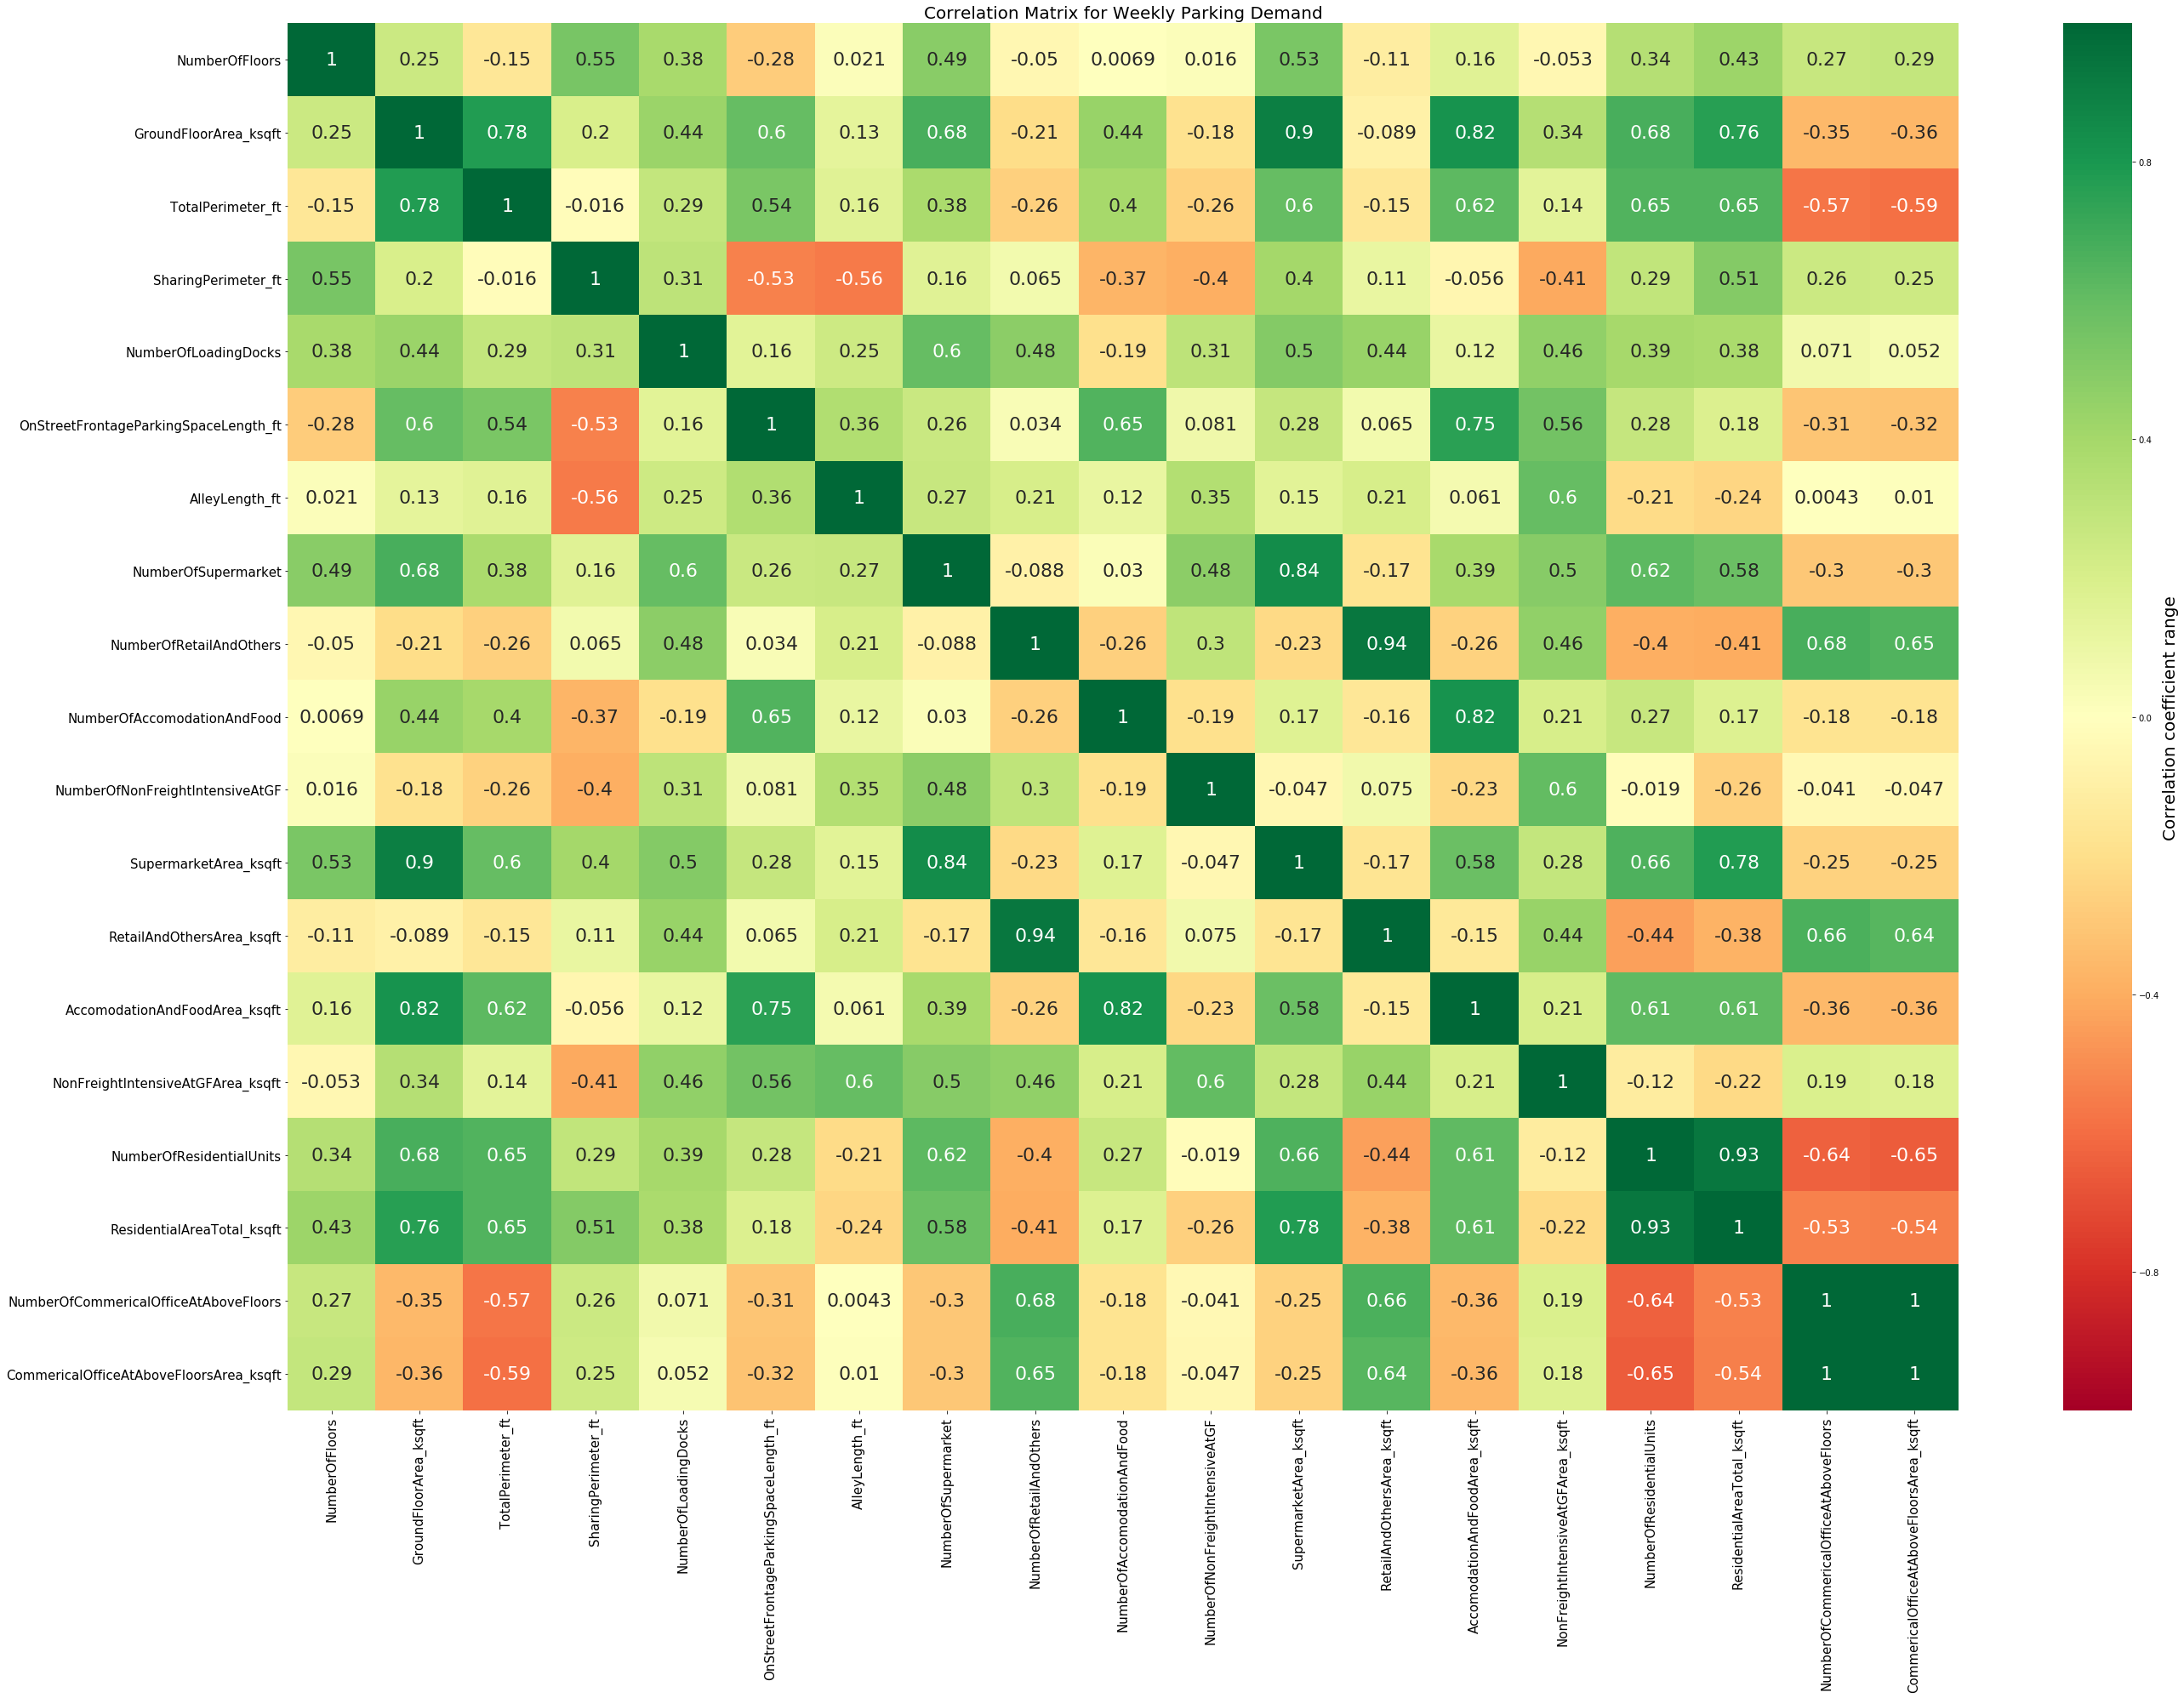

In [86]:
plt.figure(figsize=(44,30))
plt.tick_params(labelsize=15)
plt.title("Correlation Matrix for Weekly Parking Demand", fontsize=20)
ax = sn.heatmap(correlation_matrix_weekly, cmap='RdYlGn', vmax=1, vmin=-1, annot=True, cbar_kws={'label':'Correlation coefficient range'}, annot_kws= {"size":22});
ax.figure.axes[-1].yaxis.label.set_size(20)
plt.savefig('Correlation Matrix_weekly.png')

In [87]:
largeVehicleWeekly = allVehicleWeekly[['BuildingID','LargeVehicle_NumberOfVehiclesPerWeek']].rename(\
                                                            columns={'LargeVehicle_NumberOfVehiclesPerWeek':'NumberOfVehiclesPerWeek'}) 
largeVehicleWeekly['VehicleType']='Large Vehicle';

courierServiceVehicleWeekly = allVehicleWeekly[['BuildingID','CourierServiceVehicle_NumberOfVehiclesPerWeek']].rename(\
                                                            columns={'CourierServiceVehicle_NumberOfVehiclesPerWeek':'NumberOfVehiclesPerWeek'}) 
courierServiceVehicleWeekly['VehicleType']='Courier Service Vehicle';

serviceVehicleWeekly = allVehicleWeekly[['BuildingID','ServiceVehicle_NumberOfVehiclesPerWeek']].rename(\
                                                            columns={'ServiceVehicle_NumberOfVehiclesPerWeek':'NumberOfVehiclesPerWeek'}) 
serviceVehicleWeekly['VehicleType']='Service Vehicle';

totalVehicleWeekly = allVehicleWeekly[['BuildingID','AllVehicle_NumberOfVehiclesPerWeek']].rename(\
                                                            columns={'AllVehicle_NumberOfVehiclesPerWeek':'NumberOfVehiclesPerWeek'}) 
totalVehicleWeekly['VehicleType']='All Vehicle';
totalVehicleWeekly

vehicleWeeklyByType=largeVehicleWeekly.append(courierServiceVehicleWeekly).append(serviceVehicleWeekly).append(totalVehicleWeekly).reset_index(drop=True)
vehicleWeeklyByType = pd.merge(df_buildingChar, vehicleWeeklyByType,\
         left_on=['BuildingID'], right_on=['BuildingID'], how='inner');
print('vehicleWeeklyByType shape is', vehicleWeeklyByType.shape)
vehicleWeeklyByType.head()
#vehicleWeeklyByType.to_csv("vehicleWeeklyByType.csv", index=False);

vehicleWeeklyByType shape is (48, 23)


BuildingID                  Address  NumberOfFloors  GroundFloorArea_ksqft  \
0           1  1025 Connecticut Ave NW              10                 30.467   
1           1  1025 Connecticut Ave NW              10                 30.467   
2           1  1025 Connecticut Ave NW              10                 30.467   
3           1  1025 Connecticut Ave NW              10                 30.467   
4           2           1212 4th St SE               8                 88.000   

   TotalPerimeter_ft  SharingPerimeter_ft  NumberOfLoadingDocks  \
0                716                  285                     1   
1                716                  285                     1   
2                716                  285                     1   
3                716                  285                     1   
4               1312                    0                     1   

   OnStreetFrontageParkingSpaceLength_ft  AlleyLength_ft  NumberOfSupermarket  \
0                                    320             164                    0   
1                                    320             164                    0   
2                                    320             164                    0   
3                                    320             164                    0   
4                                    540             400                    1   

   NumberOfRetailAndOthers  NumberOfAccomodationAndFood  \
0                        5                            2   
1                        5                            2   
2                        5                            2   
3                        5                            2   
4                        1                            3   

   NumberOfNonFreightIntensiveAtGF  SupermarketArea_ksqft  \
0                                2                  0.000   
1                                2                  0.000   
2                                2                  0.000   
3                                2                  0.000   
4                                3                 31.064   

   RetailAndOthersArea_ksqft  AccomodationAndFoodArea_ksqft  \
0                  11.912597                        3.96071   
1                  11.912597                        3.96071   
2                  11.912597                        3.96071   
3                  11.912597                        3.96071   
4                   4.048000                       10.56000   

   NonFreightIntensiveAtGFArea_ksqft  NumberOfResidentialUnits  \
0                           5.301258                         0   
1                           5.301258                         0   
2                           5.301258                         0   
3                           5.301258                         0   
4                           7.920000                       217   

   ResidentialAreaTotal_ksqft  NumberOfCommericalOfficeAtAboveFloors  \
0                         0.0                                    354   
1                         0.0                                    354   
2                         0.0                                    354   
3                         0.0                                    354   
4                       190.4                                      0   

   CommericalOfficeAtAboveFloorsArea_ksqft  NumberOfVehiclesPerWeek  \
0                                 219.3624                      129   
1                                 219.3624                       22   
2                                 219.3624                       91   
3                                 219.3624                      242   
4                                   0.0000                      251   

               VehicleType  
0            Large Vehicle  
1  Courier Service Vehicle  
2          Service Vehicle  
3              All Vehicle  
4            Large Vehicle

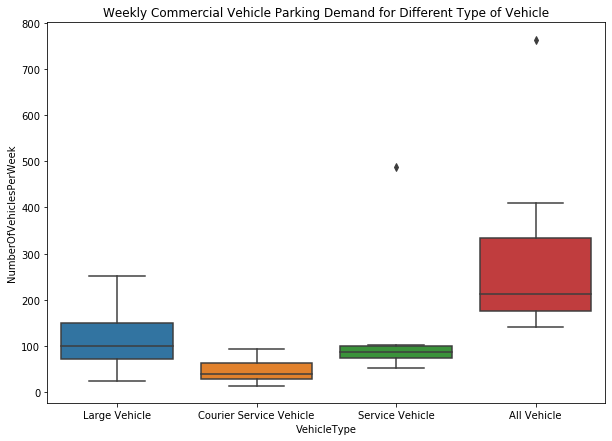

In [88]:
plt.figure(figsize=(10,7))
plt.title("Weekly Commercial Vehicle Parking Demand for Different Type of Vehicle")

sn.boxplot(x='VehicleType', y='NumberOfVehiclesPerWeek', data=vehicleWeeklyByType)

plt.savefig('Weekly Commercial Vehicle Parking Demand for Different Type of Vehicle.png')

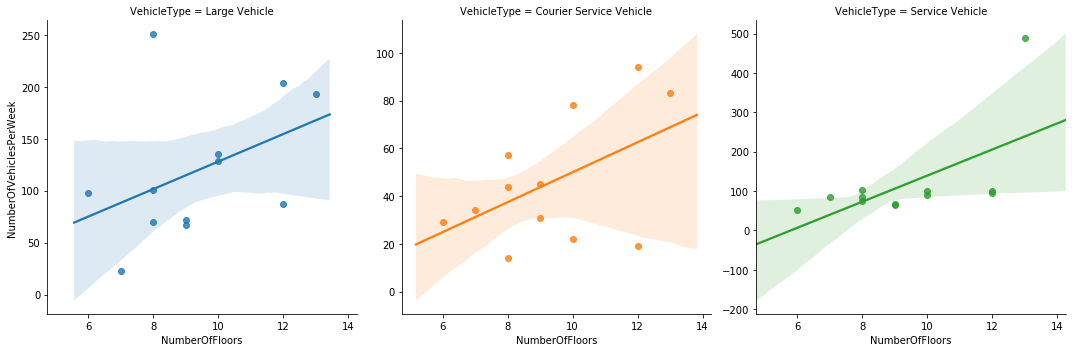

In [89]:


sn.lmplot(x='NumberOfFloors', y='NumberOfVehiclesPerWeek', hue='VehicleType', col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Number of Floors.png')

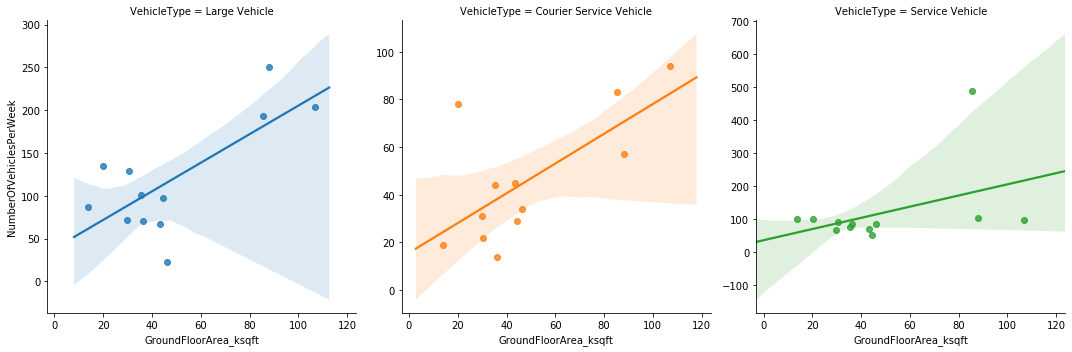

In [90]:
sn.lmplot(x='GroundFloorArea_ksqft', y='NumberOfVehiclesPerWeek', hue='VehicleType', col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Area of Ground-Floor.png')

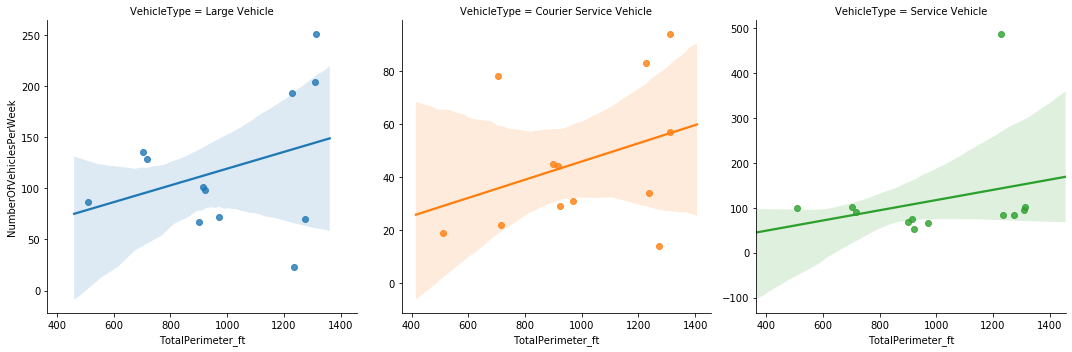

In [91]:
sn.lmplot(x='TotalPerimeter_ft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Total Perimeter of the Building.png')

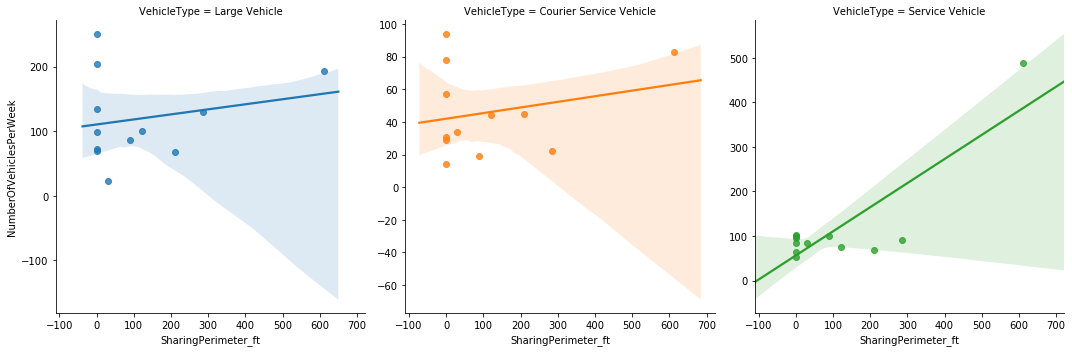

In [92]:
sn.lmplot(x='SharingPerimeter_ft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Perimeter of the Building Shared with other buildings.png')

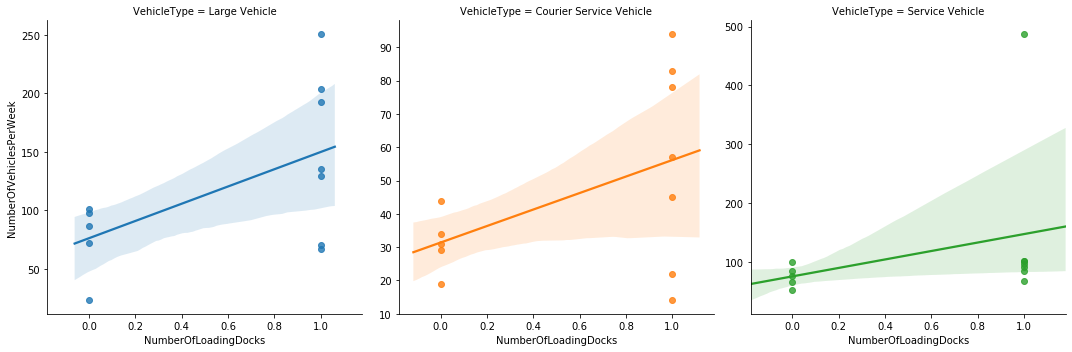

In [93]:
sn.lmplot(x='NumberOfLoadingDocks', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Number of Loading Dock.png')

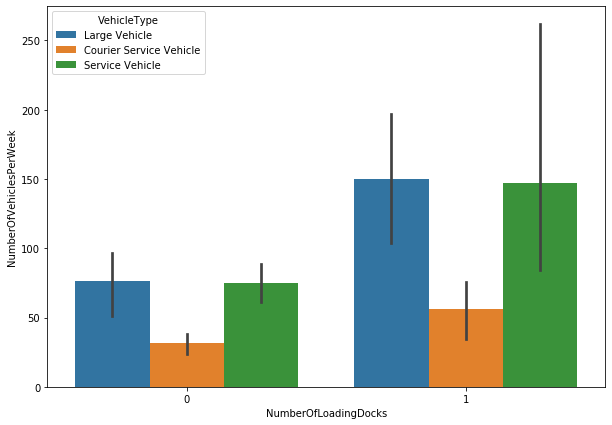

In [94]:
plt.figure(figsize=(10,7))
sn.barplot(x='NumberOfLoadingDocks', y='NumberOfVehiclesPerWeek', hue='VehicleType', data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'])

plt.savefig('Number of Loading Dock.png')

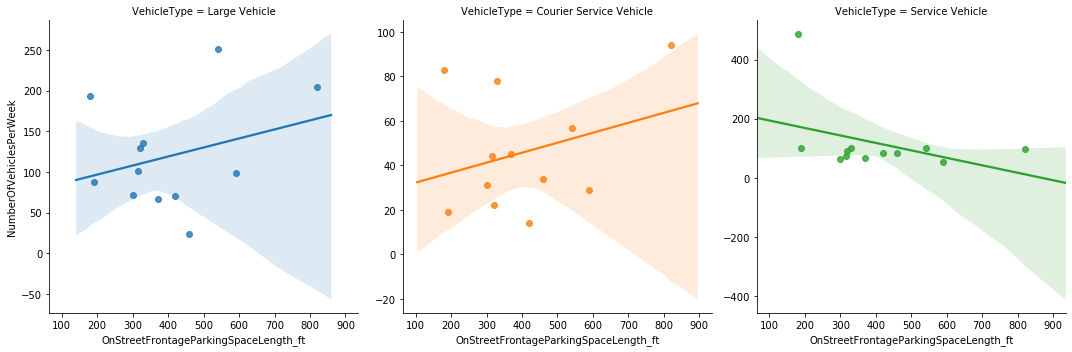

In [95]:
sn.lmplot(x='OnStreetFrontageParkingSpaceLength_ft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('On-Street Parking Space Length.png')

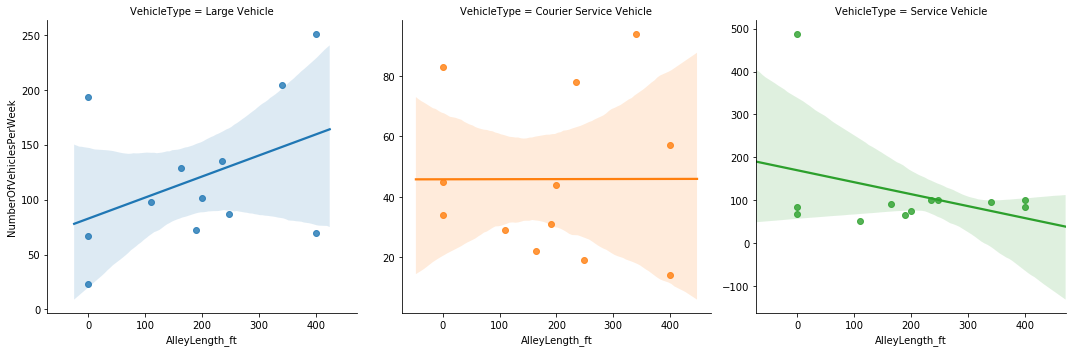

In [96]:
sn.lmplot(x='AlleyLength_ft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Alley Parking Length.png')

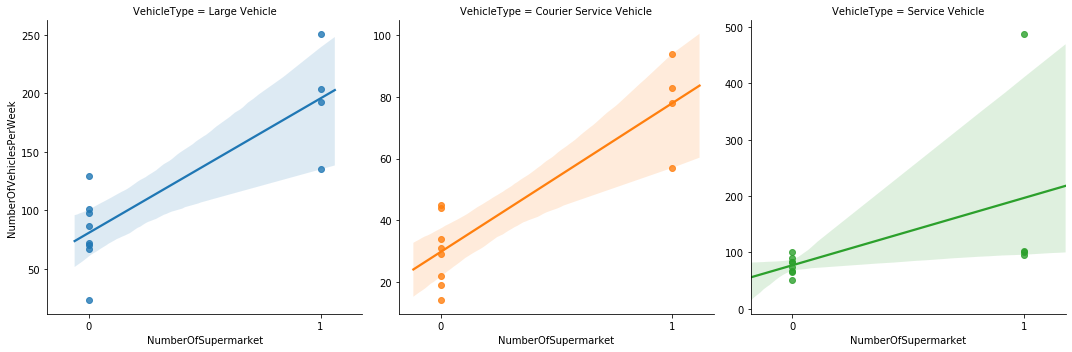

In [97]:
sn.lmplot(x='NumberOfSupermarket', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)
plt.xticks([0,1])
plt.savefig('Number of Supermarket.png')

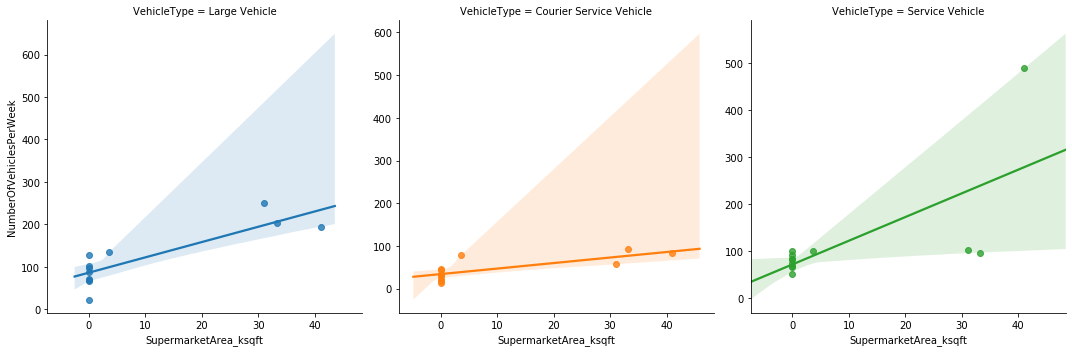

In [98]:
sn.lmplot(x='SupermarketArea_ksqft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Area of Supermarket.png')

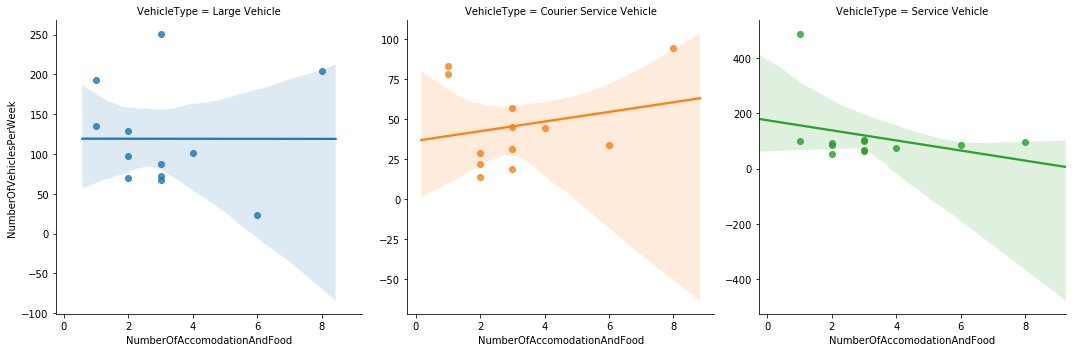

In [99]:
sn.lmplot(x='NumberOfAccomodationAndFood', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Number of Accommodations and Food Services.png')

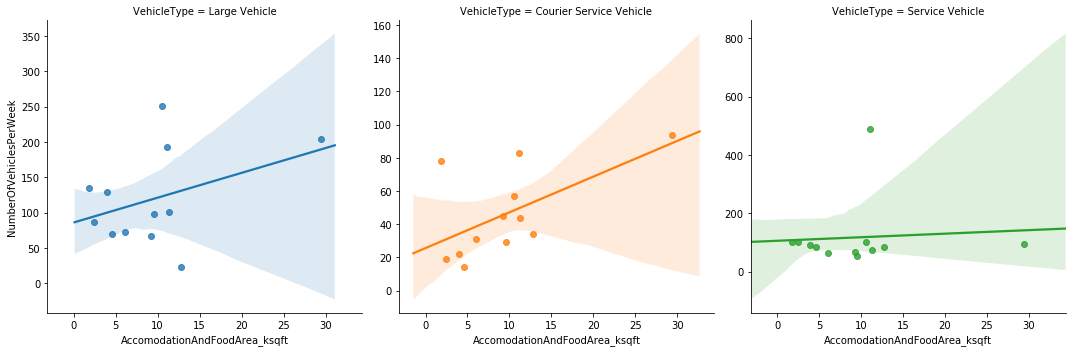

In [100]:
sn.lmplot(x='AccomodationAndFoodArea_ksqft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Area of Accommodations and Food Services.png')

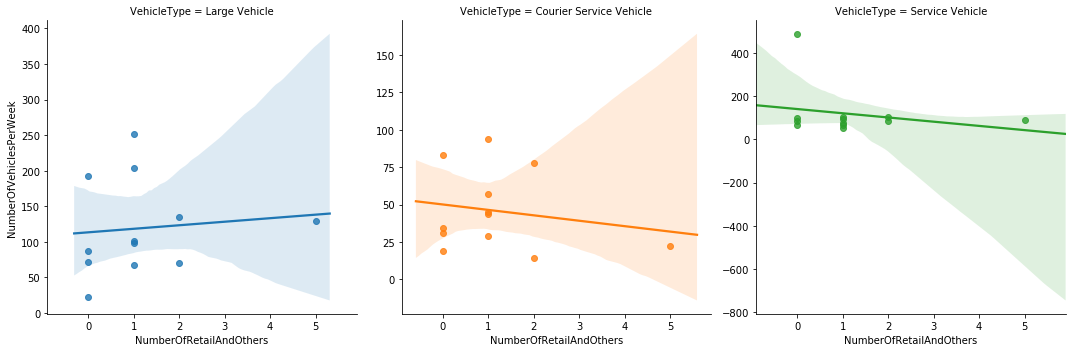

In [101]:
sn.lmplot(x='NumberOfRetailAndOthers', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Number of Retail and Other Businesses.png')

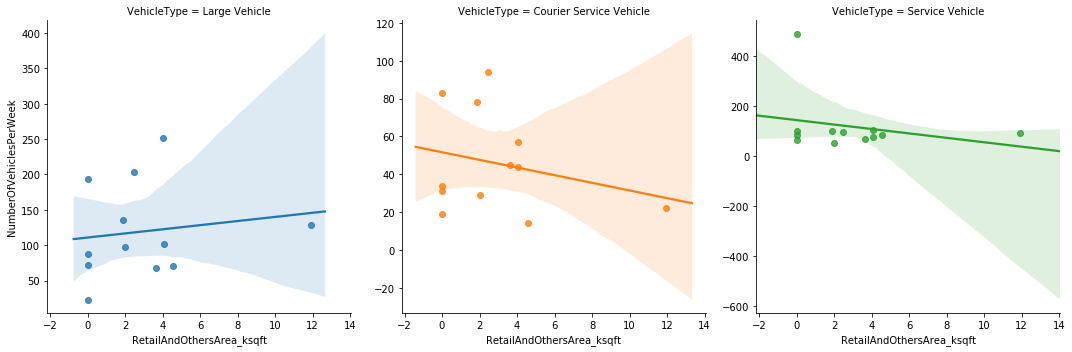

In [86]:
sn.lmplot(x='RetailAndOthersArea_ksqft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Area of Retail and Other Businesses.png')

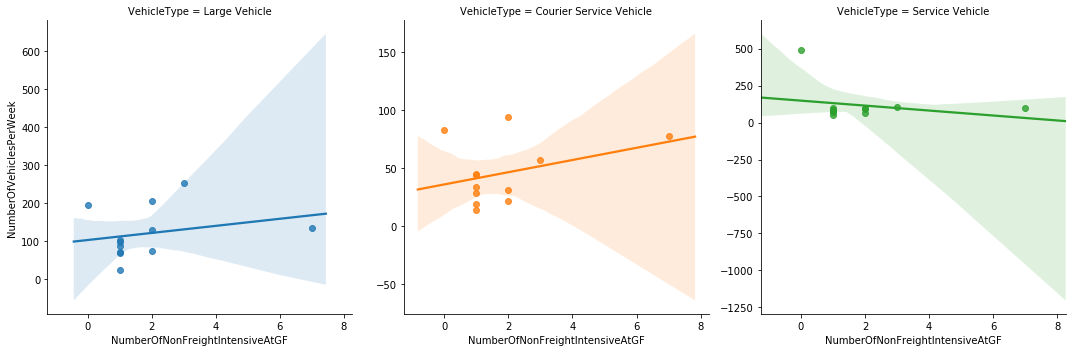

In [87]:
sn.lmplot(x='NumberOfNonFreightIntensiveAtGF', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Number of Non-Freight Intensive Business at Ground-floor.png')

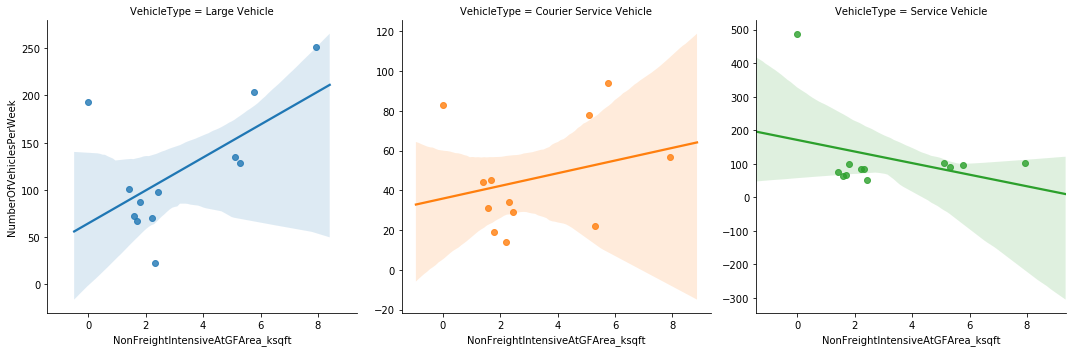

In [88]:
sn.lmplot(x='NonFreightIntensiveAtGFArea_ksqft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Area of Non-Freight Intensive Business at Ground-floor.png')

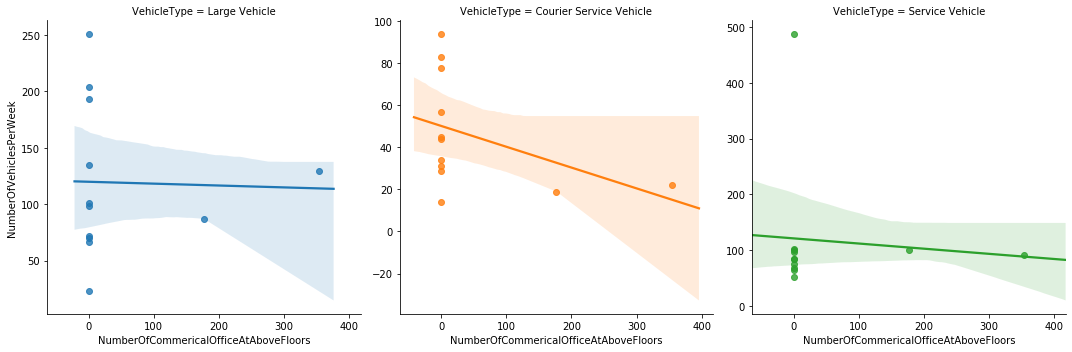

In [89]:
sn.lmplot(x='NumberOfCommericalOfficeAtAboveFloors', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Number of Non-Freight Intensive Business at Above-floors.png')

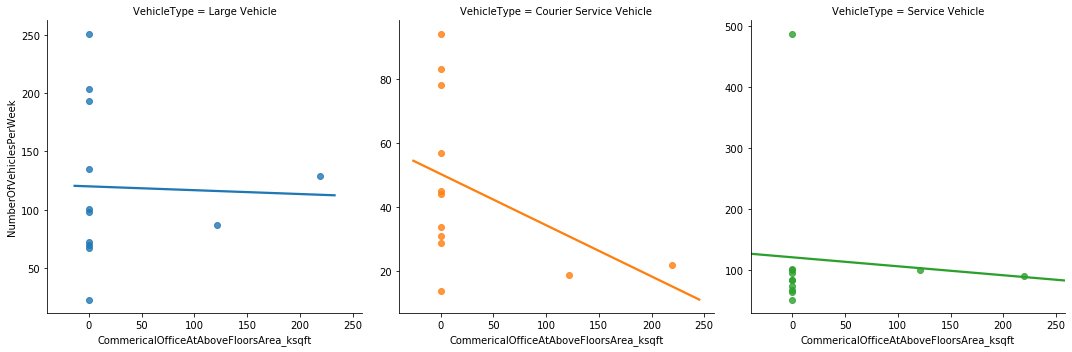

In [90]:
sn.lmplot(x='CommericalOfficeAtAboveFloorsArea_ksqft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5, ci=False)

plt.savefig('Area of Non-Freight Intensive Businesses at Floors above Ground-floor.png')

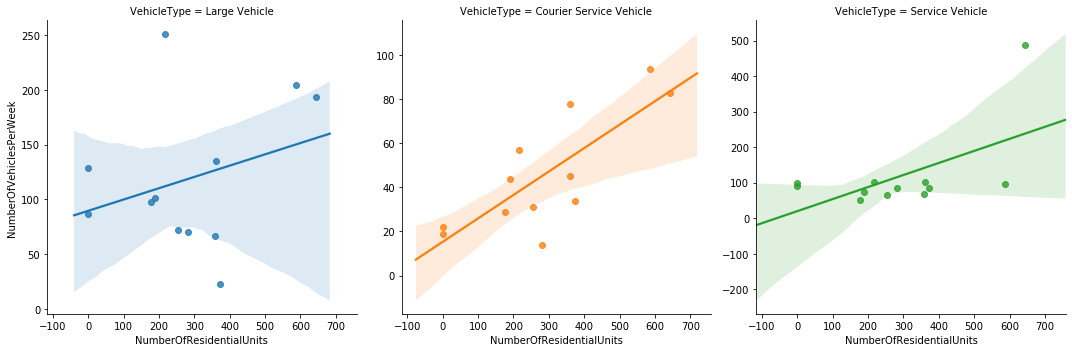

In [91]:
sn.lmplot(x='NumberOfResidentialUnits', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Number of Residential Units.png')

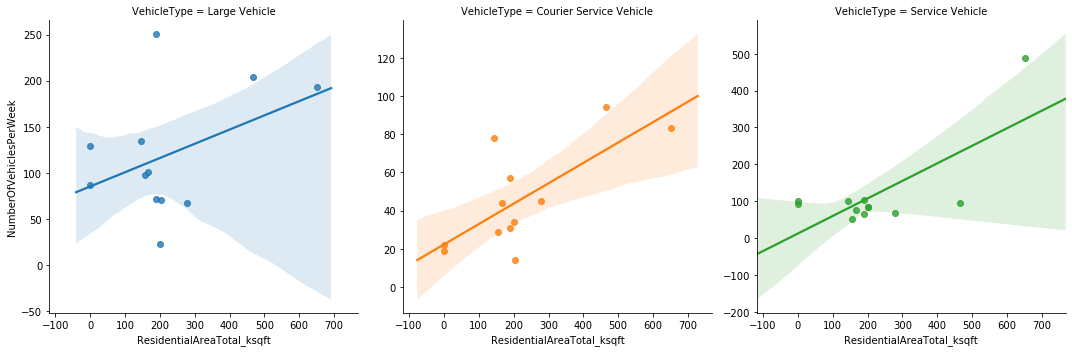

In [92]:
sn.lmplot(x='ResidentialAreaTotal_ksqft', y='NumberOfVehiclesPerWeek', hue='VehicleType',col='VehicleType', sharey=False, data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'], height=5)

plt.savefig('Area of Residential Units in Total.png')

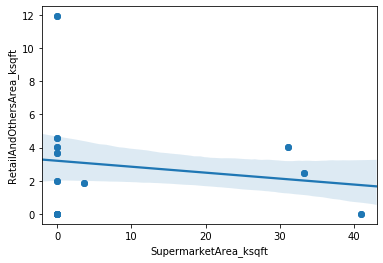

In [93]:
sn.regplot(x='SupermarketArea_ksqft', y='RetailAndOthersArea_ksqft', data=vehicleWeeklyByType[vehicleWeeklyByType['VehicleType']!='All Vehicle'])


<h2>
<h2> commercial zone hours ANOVA
<h2>   

In [102]:

agg_data_weekdayOrWeekend_hourly = df_arrival_hour.groupby(['BuildingID', 'WeekendOrWeekday', 'ArrivalTime_Hourly', 'VehicleTypePurpose'], as_index=False)['NumberOfVehicle'].mean()

#agg_data_all
agg_data_weekdayOrWeekend_hourly


BuildingID WeekendOrWeekday  ArrivalTime_Hourly  \
0              1          Weekday 1900-01-01 00:00:00   
1              1          Weekday 1900-01-01 00:00:00   
2              1          Weekday 1900-01-01 00:00:00   
3              1          Weekday 1900-01-01 01:00:00   
4              1          Weekday 1900-01-01 01:00:00   
...          ...              ...                 ...   
1723          12          Weekend 1900-01-01 22:00:00   
1724          12          Weekend 1900-01-01 22:00:00   
1725          12          Weekend 1900-01-01 23:00:00   
1726          12          Weekend 1900-01-01 23:00:00   
1727          12          Weekend 1900-01-01 23:00:00   

           VehicleTypePurpose  NumberOfVehicle  
0     Courier Service Vehicle         0.000000  
1               Large Vehicle         0.333333  
2             Service Vehicle         0.000000  
3     Courier Service Vehicle         0.000000  
4               Large Vehicle         0.333333  
...                       ...              ...  
1723            Large Vehicle         0.000000  
1724          Service Vehicle         0.000000  
1725  Courier Service Vehicle         0.000000  
1726            Large Vehicle         1.000000  
1727          Service Vehicle         0.000000  

[1728 rows x 5 columns]

In [103]:
agg_data_groupedByVehicleType = agg_data_weekdayOrWeekend_hourly.groupby('VehicleTypePurpose')

largeVehicle_hourly=agg_data_groupedByVehicleType.get_group('Large Vehicle').reset_index(drop=True).rename(columns={'NumberOfVehicle':'LargeVehicle_NumberOfVehicle'});
courierServiceVehicle_hourly=agg_data_groupedByVehicleType.get_group('Courier Service Vehicle').reset_index(drop=True).rename(columns={'NumberOfVehicle':'CourierServiceVehicle_NumberOfVehicle'});
serviceVehicle_hourly=agg_data_groupedByVehicleType.get_group('Service Vehicle').reset_index(drop=True).rename(columns={'NumberOfVehicle':'ServiceVehicle_NumberOfVehicle'});

allVehicle_hourly_weekdayOrWeekend = pd.merge(largeVehicle_hourly, courierServiceVehicle_hourly[['BuildingID','WeekendOrWeekday','ArrivalTime_Hourly','CourierServiceVehicle_NumberOfVehicle']],\
         left_on=['BuildingID','WeekendOrWeekday','ArrivalTime_Hourly'], right_on=['BuildingID','WeekendOrWeekday','ArrivalTime_Hourly'], how='inner');
allVehicle_hourly_weekdayOrWeekend = pd.merge(allVehicle_hourly_weekdayOrWeekend, serviceVehicle_hourly[['BuildingID','WeekendOrWeekday','ArrivalTime_Hourly','ServiceVehicle_NumberOfVehicle']],\
         left_on=['BuildingID','WeekendOrWeekday','ArrivalTime_Hourly'], right_on=['BuildingID','WeekendOrWeekday','ArrivalTime_Hourly'], how='inner');
allVehicle_hourly_weekdayOrWeekend['AllVehicle_NumberOfVehicle'] = \
        allVehicle_hourly_weekdayOrWeekend['LargeVehicle_NumberOfVehicle']+allVehicle_hourly_weekdayOrWeekend['CourierServiceVehicle_NumberOfVehicle']+allVehicle_hourly_weekdayOrWeekend['ServiceVehicle_NumberOfVehicle'];


allVehicle_hourly_weekdayOrWeekend.drop(columns='VehicleTypePurpose', inplace=True);
allVehicle_hourly_weekdayOrWeekend

BuildingID WeekendOrWeekday  ArrivalTime_Hourly  \
0             1          Weekday 1900-01-01 00:00:00   
1             1          Weekday 1900-01-01 01:00:00   
2             1          Weekday 1900-01-01 02:00:00   
3             1          Weekday 1900-01-01 03:00:00   
4             1          Weekday 1900-01-01 04:00:00   
5             1          Weekday 1900-01-01 05:00:00   
6             1          Weekday 1900-01-01 06:00:00   
7             1          Weekday 1900-01-01 07:00:00   
8             1          Weekday 1900-01-01 08:00:00   
9             1          Weekday 1900-01-01 09:00:00   
10            1          Weekday 1900-01-01 10:00:00   
11            1          Weekday 1900-01-01 11:00:00   
12            1          Weekday 1900-01-01 12:00:00   
13            1          Weekday 1900-01-01 13:00:00   
14            1          Weekday 1900-01-01 14:00:00   
15            1          Weekday 1900-01-01 15:00:00   
16            1          Weekday 1900-01-01 16:00:00   
17            1          Weekday 1900-01-01 17:00:00   
18            1          Weekday 1900-01-01 18:00:00   
19            1          Weekday 1900-01-01 19:00:00   
20            1          Weekday 1900-01-01 20:00:00   
21            1          Weekday 1900-01-01 21:00:00   
22            1          Weekday 1900-01-01 22:00:00   
23            1          Weekday 1900-01-01 23:00:00   
24            1          Weekend 1900-01-01 00:00:00   
25            1          Weekend 1900-01-01 01:00:00   
26            1          Weekend 1900-01-01 02:00:00   
27            1          Weekend 1900-01-01 03:00:00   
28            1          Weekend 1900-01-01 04:00:00   
29            1          Weekend 1900-01-01 05:00:00   
30            1          Weekend 1900-01-01 06:00:00   
31            1          Weekend 1900-01-01 07:00:00   
32            1          Weekend 1900-01-01 08:00:00   
33            1          Weekend 1900-01-01 09:00:00   
34            1          Weekend 1900-01-01 10:00:00   
35            1          Weekend 1900-01-01 11:00:00   
36            1          Weekend 1900-01-01 12:00:00   
37            1          Weekend 1900-01-01 13:00:00   
38            1          Weekend 1900-01-01 14:00:00   
39            1          Weekend 1900-01-01 15:00:00   
40            1          Weekend 1900-01-01 16:00:00   
41            1          Weekend 1900-01-01 17:00:00   
42            1          Weekend 1900-01-01 18:00:00   
43            1          Weekend 1900-01-01 19:00:00   
44            1          Weekend 1900-01-01 20:00:00   
45            1          Weekend 1900-01-01 21:00:00   
46            1          Weekend 1900-01-01 22:00:00   
47            1          Weekend 1900-01-01 23:00:00   
48            2          Weekday 1900-01-01 00:00:00   
49            2          Weekday 1900-01-01 01:00:00   
50            2          Weekday 1900-01-01 02:00:00   
51            2          Weekday 1900-01-01 03:00:00   
52            2          Weekday 1900-01-01 04:00:00   
53            2          Weekday 1900-01-01 05:00:00   
54            2          Weekday 1900-01-01 06:00:00   
55            2          Weekday 1900-01-01 07:00:00   
56            2          Weekday 1900-01-01 08:00:00   
57            2          Weekday 1900-01-01 09:00:00   
58            2          Weekday 1900-01-01 10:00:00   
59            2          Weekday 1900-01-01 11:00:00   
60            2          Weekday 1900-01-01 12:00:00   
61            2          Weekday 1900-01-01 13:00:00   
62            2          Weekday 1900-01-01 14:00:00   
63            2          Weekday 1900-01-01 15:00:00   
64            2          Weekday 1900-01-01 16:00:00   
65            2          Weekday 1900-01-01 17:00:00   
66            2          Weekday 1900-01-01 18:00:00   
67            2          Weekday 1900-01-01 19:00:00   
68            2          Weekday 1900-01-01 20:00:00   
69            2          Weekday 1900-01-01 21:00:00   
70            2          Week

In [104]:
temp = allVehicle_hourly_weekdayOrWeekend;

commercialLoadingHour = temp[(temp['ArrivalTime_Hourly']>='1900-01-01 7:00:00') & (temp['ArrivalTime_Hourly']<='1900-01-01 18:00:00')]
commercialLoadingHour=commercialLoadingHour.groupby(['BuildingID','WeekendOrWeekday'], as_index=False)[['LargeVehicle_NumberOfVehicle', 'CourierServiceVehicle_NumberOfVehicle',\
                                                                                                        'ServiceVehicle_NumberOfVehicle','AllVehicle_NumberOfVehicle']].sum();
commercialLoadingHour["TimePeriod"]='7:00 AM to 7:00 PM';
commercialLoadingHour
notCommercialLoadingHour = temp[(temp['ArrivalTime_Hourly']<'1900-01-01 7:00:00') | (temp['ArrivalTime_Hourly']>'1900-01-01 18:00:00')]
notCommercialLoadingHour = notCommercialLoadingHour.groupby(['BuildingID','WeekendOrWeekday'], as_index=False)[['LargeVehicle_NumberOfVehicle', 'CourierServiceVehicle_NumberOfVehicle',\
                                                                                                        'ServiceVehicle_NumberOfVehicle','AllVehicle_NumberOfVehicle']].sum();
notCommercialLoadingHour["TimePeriod"]='7:00 PM to 7:00 AM';
notCommercialLoadingHour
vehicle_groupedByCommercialLoadingHour = commercialLoadingHour.append(notCommercialLoadingHour)
vehicle_groupedByCommercialLoadingHour.reset_index(drop=True, inplace=True)
vehicle_groupedByCommercialLoadingHour

BuildingID WeekendOrWeekday  LargeVehicle_NumberOfVehicle  \
0            1          Weekday                     17.333333   
1            1          Weekend                      1.000000   
2            2          Weekday                     33.333333   
3            2          Weekend                      2.000000   
4            3          Weekday                     31.000000   
5            3          Weekend                      7.000000   
6            4          Weekday                     17.333333   
7            4          Weekend                      3.000000   
8            5          Weekday                      2.666667   
9            5          Weekend                      0.000000   
10           6          Weekday                     10.666667   
11           6          Weekend                      2.000000   
12           7          Weekday                      8.000000   
13           7          Weekend                      9.000000   
14           8          Weekday                     20.333333   
15           8          Weekend                      3.000000   
16           9          Weekday                      9.000000   
17           9          Weekend                      5.000000   
18          10          Weekday                      9.000000   
19          10          Weekend                      4.000000   
20          11          Weekday                     17.666667   
21          11          Weekend                      4.000000   
22          12          Weekday                     28.000000   
23          12          Weekend                      2.000000   
24           1          Weekday                      9.000000   
25           1          Weekend                      0.000000   
26           2          Weekday                      8.333333   
27           2          Weekend                      9.000000   
28           3          Weekday                      6.666667   
29           3          Weekend                      3.000000   
30           4          Weekday                      1.000000   
31           4          Weekend                      0.000000   
32           5          Weekday                      0.333333   
33           5          Weekend                      0.000000   
34           6          Weekday                      1.000000   
35           6          Weekend                      0.000000   
36           7          Weekday                      5.666667   
37           7          Weekend                      2.000000   
38           8          Weekday                      2.666667   
39           8          Weekend                      1.000000   
40           9          Weekday                      2.666667   
41           9          Weekend                      1.000000   
42          10          Weekday                      1.333333   
43          10          Weekend                      1.000000   
44          11          Weekday                      1.333333   
45          11          Weekend                      0.000000   
46          12          Weekday                      4.333333   
47          12          Weekend                      4.000000   

    CourierServiceVehicle_NumberOfVehicle  ServiceVehicle_NumberOfVehicle  \
0                                4.000000                       11.000000   
1                                0.000000                        4.000000   
2                                8.333333                       15.000000   
3                                0.000000                        4.000000   
4                               15.000000                       88.666667   
5                                0.000000                        4.000000   
6                                6.666667                        5.666667   
7                                0.000000                        2.000000   
8                                5.000000                        5.333333   
9                                1.000000       

In [105]:
pd.set_option('display.max_rows', 20);

In [106]:
sumOfVehicleDaily = vehicle_groupedByCommercialLoadingHour.groupby(['BuildingID','WeekendOrWeekday'], as_index=False)[['LargeVehicle_NumberOfVehicle', 'CourierServiceVehicle_NumberOfVehicle',\
                    'ServiceVehicle_NumberOfVehicle','AllVehicle_NumberOfVehicle']].sum().rename(columns={'LargeVehicle_NumberOfVehicle':'Large_Sum', 'CourierServiceVehicle_NumberOfVehicle':'Courier_Sum',\
                    'ServiceVehicle_NumberOfVehicle':'Service_Sum','AllVehicle_NumberOfVehicle':'All_Sum'});
sumOfVehicleDaily

BuildingID WeekendOrWeekday  Large_Sum  Courier_Sum  Service_Sum  \
0            1          Weekday  26.333333     4.666667    14.666667   
1            1          Weekend   1.000000     0.000000     4.000000   
2            2          Weekday  41.666667     8.666667    17.333333   
3            2          Weekend  11.000000     0.000000     5.000000   
4            3          Weekday  37.666667    16.333333    98.000000   
..         ...              ...        ...          ...          ...   
19          10          Weekend   5.000000     0.000000     1.000000   
20          11          Weekday  19.000000     5.000000     9.000000   
21          11          Weekend   4.000000     0.000000     3.000000   
22          12          Weekday  32.333333    17.333333    12.333333   
23          12          Weekend   6.000000     2.000000     4.000000   

       All_Sum  
0    45.666667  
1     5.000000  
2    67.666667  
3    16.000000  
4   152.000000  
..         ...  
19    6.000000  
20   33.000000  
21    7.000000  
22   62.000000  
23   12.000000  

[24 rows x 6 columns]

In [109]:
vehicle_groupedByCommercialLoadingHour.WeekendOrWeekday.value_counts(normalize=True)

Weekend    0.5
Weekday    0.5
Name: WeekendOrWeekday, dtype: float64

In [138]:
vehicle_groupedByCommercialLoadingHour = pd.merge(vehicle_groupedByCommercialLoadingHour,sumOfVehicleDaily, left_on=['BuildingID','WeekendOrWeekday'],\
                                                 right_on=['BuildingID','WeekendOrWeekday'], how='inner');

vehicle_groupedByCommercialLoadingHour

BuildingID WeekendOrWeekday  LargeVehicle_NumberOfVehicle  \
0            1          Weekday                     17.333333   
1            1          Weekday                      9.000000   
2            1          Weekend                      1.000000   
3            1          Weekend                      0.000000   
4            2          Weekday                     33.333333   
..         ...              ...                           ...   
43          11          Weekend                      0.000000   
44          12          Weekday                     28.000000   
45          12          Weekday                      4.333333   
46          12          Weekend                      2.000000   
47          12          Weekend                      4.000000   

    CourierServiceVehicle_NumberOfVehicle  ServiceVehicle_NumberOfVehicle  \
0                                4.000000                       11.000000   
1                                0.666667                        3.666667   
2                                0.000000                        4.000000   
3                                0.000000                        0.000000   
4                                8.333333                       15.000000   
..                                    ...                             ...   
43                               0.000000                        0.000000   
44                              16.000000                       11.333333   
45                               1.333333                        1.000000   
46                               2.000000                        4.000000   
47                               0.000000                        0.000000   

    AllVehicle_NumberOfVehicle          TimePeriod  Large_Sum  Courier_Sum  \
0                    32.333333  7:00 AM to 7:00 PM  26.333333     4.666667   
1                    13.333333  7:00 PM to 7:00 AM  26.333333     4.666667   
2                     5.000000  7:00 AM to 7:00 PM   1.000000     0.000000   
3                     0.000000  7:00 PM to 7:00 AM   1.000000     0.000000   
4                    56.666667  7:00 AM to 7:00 PM  41.666667     8.666667   
..                         ...                 ...        ...          ...   
43                    0.000000  7:00 PM to 7:00 AM   4.000000     0.000000   
44                   55.333333  7:00 AM to 7:00 PM  32.333333    17.333333   
45                    6.666667  7:00 PM to 7:00 AM  32.333333    17.333333   
46                    8.000000  7:00 AM to 7:00 PM   6.000000     2.000000   
47                    4.000000  7:00 PM to 7:00 AM   6.000000     2.000000   

    Service_Sum    All_Sum  
0     14.666667  45.666667  
1     14.666667  45.666667  
2      4.000000   5.000000  
3      4.000000   5.000000  
4     17.333333  67.666667  
..          ...        ...  
43     3.000000   7.000000  
44    12.333333  62.000000  
45    12.333333  62.000000  
46     4.000000  12.000000  
47     4.000000  12.000000  

[48 rows x 11 columns]

In [139]:
vehicle_groupedByCommercialLoadingHour['LargeVehicle_PercentageOfDailyDemand'] \
            = vehicle_groupedByCommercialLoadingHour['LargeVehicle_NumberOfVehicle']/vehicle_groupedByCommercialLoadingHour['Large_Sum']*100;

vehicle_groupedByCommercialLoadingHour['CourierServiceVehicle_PercentageOfDailyDemand'] \
            = vehicle_groupedByCommercialLoadingHour['CourierServiceVehicle_NumberOfVehicle']/vehicle_groupedByCommercialLoadingHour['Courier_Sum']*100

vehicle_groupedByCommercialLoadingHour['ServiceVehicle_PercentageOfDailyDemand'] \
            = vehicle_groupedByCommercialLoadingHour['ServiceVehicle_NumberOfVehicle']/vehicle_groupedByCommercialLoadingHour['Service_Sum']*100

vehicle_groupedByCommercialLoadingHour['AllVehicle_PercentageOfDailyDemand'] \
            = vehicle_groupedByCommercialLoadingHour['AllVehicle_NumberOfVehicle']/vehicle_groupedByCommercialLoadingHour['All_Sum']*100

vehicle_groupedByCommercialLoadingHour.drop(columns=['Large_Sum', 'Courier_Sum','Service_Sum','All_Sum'], inplace=True);

vehicle_groupedByCommercialLoadingHour = vehicle_groupedByCommercialLoadingHour[['BuildingID', 'WeekendOrWeekday','TimePeriod',\
                                        'LargeVehicle_NumberOfVehicle','CourierServiceVehicle_NumberOfVehicle','ServiceVehicle_NumberOfVehicle','AllVehicle_NumberOfVehicle',\
                                        'LargeVehicle_PercentageOfDailyDemand','CourierServiceVehicle_PercentageOfDailyDemand','ServiceVehicle_PercentageOfDailyDemand','AllVehicle_PercentageOfDailyDemand']];

vehicle_groupedByCommercialLoadingHour

BuildingID WeekendOrWeekday          TimePeriod  \
0            1          Weekday  7:00 AM to 7:00 PM   
1            1          Weekday  7:00 PM to 7:00 AM   
2            1          Weekend  7:00 AM to 7:00 PM   
3            1          Weekend  7:00 PM to 7:00 AM   
4            2          Weekday  7:00 AM to 7:00 PM   
..         ...              ...                 ...   
43          11          Weekend  7:00 PM to 7:00 AM   
44          12          Weekday  7:00 AM to 7:00 PM   
45          12          Weekday  7:00 PM to 7:00 AM   
46          12          Weekend  7:00 AM to 7:00 PM   
47          12          Weekend  7:00 PM to 7:00 AM   

    LargeVehicle_NumberOfVehicle  CourierServiceVehicle_NumberOfVehicle  \
0                      17.333333                               4.000000   
1                       9.000000                               0.666667   
2                       1.000000                               0.000000   
3                       0.000000                               0.000000   
4                      33.333333                               8.333333   
..                           ...                                    ...   
43                      0.000000                               0.000000   
44                     28.000000                              16.000000   
45                      4.333333                               1.333333   
46                      2.000000                               2.000000   
47                      4.000000                               0.000000   

    ServiceVehicle_NumberOfVehicle  AllVehicle_NumberOfVehicle  \
0                        11.000000                   32.333333   
1                         3.666667                   13.333333   
2                         4.000000                    5.000000   
3                         0.000000                    0.000000   
4                        15.000000                   56.666667   
..                             ...                         ...   
43                        0.000000                    0.000000   
44                       11.333333                   55.333333   
45                        1.000000                    6.666667   
46                        4.000000                    8.000000   
47                        0.000000                    4.000000   

    LargeVehicle_PercentageOfDailyDemand  \
0                              65.822785   
1                              34.177215   
2                             100.000000   
3                               0.000000   
4                              80.000000   
..                                   ...   
43                              0.000000   
44                             86.597938   
45                             13.402062   
46                             33.333333   
47                             66.666667   

    CourierServiceVehicle_PercentageOfDailyDemand  \
0                                       85.714286   
1                                       14.285714   
2                                             NaN   
3                                             NaN   
4                                       96.153846   
..                                            ...   
43                                            NaN   
44                                      92.307692   
45                                       7.692308   
46                                     100.000000   
47                                       0.000000   

    ServiceVehicle_PercentageOfDailyDemand  AllVehicle_PercentageOfDailyDemand  
0                                75.000000                           70.802920  
1                                25.000000                           29.197080  
2                               100.000000                          100.000000  
3                                 0.000000                            0.000000  
4                                86.538462                           83.743842

In [146]:
vehicle_groupedByCommercialLoadingHour['HasCommercialLoadingZone'] = vehicle_groupedByCommercialLoadingHour['BuildingID'].apply(lambda x: 'Yes' if x in (1,4,5,7,8) else 'No');

vehicle_groupedByCommercialLoadingHour

c:\users\ishra\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


BuildingID WeekendOrWeekday          TimePeriod  \
0            1          Weekday  7:00 AM to 7:00 PM   
1            1          Weekday  7:00 PM to 7:00 AM   
2            1          Weekend  7:00 AM to 7:00 PM   
3            1          Weekend  7:00 PM to 7:00 AM   
4            2          Weekday  7:00 AM to 7:00 PM   
..         ...              ...                 ...   
43          11          Weekend  7:00 PM to 7:00 AM   
44          12          Weekday  7:00 AM to 7:00 PM   
45          12          Weekday  7:00 PM to 7:00 AM   
46          12          Weekend  7:00 AM to 7:00 PM   
47          12          Weekend  7:00 PM to 7:00 AM   

    LargeVehicle_NumberOfVehicle  CourierServiceVehicle_NumberOfVehicle  \
0                      17.333333                               4.000000   
1                       9.000000                               0.666667   
2                       1.000000                               0.000000   
3                       0.000000                               0.000000   
4                      33.333333                               8.333333   
..                           ...                                    ...   
43                      0.000000                               0.000000   
44                     28.000000                              16.000000   
45                      4.333333                               1.333333   
46                      2.000000                               2.000000   
47                      4.000000                               0.000000   

    ServiceVehicle_NumberOfVehicle  AllVehicle_NumberOfVehicle  \
0                        11.000000                   32.333333   
1                         3.666667                   13.333333   
2                         4.000000                    5.000000   
3                         0.000000                    0.000000   
4                        15.000000                   56.666667   
..                             ...                         ...   
43                        0.000000                    0.000000   
44                       11.333333                   55.333333   
45                        1.000000                    6.666667   
46                        4.000000                    8.000000   
47                        0.000000                    4.000000   

    LargeVehicle_PercentageOfDailyDemand  \
0                              65.822785   
1                              34.177215   
2                             100.000000   
3                               0.000000   
4                              80.000000   
..                                   ...   
43                              0.000000   
44                             86.597938   
45                             13.402062   
46                             33.333333   
47                             66.666667   

    CourierServiceVehicle_PercentageOfDailyDemand  \
0                                       85.714286   
1                                       14.285714   
2                                             NaN   
3                                             NaN   
4                                       96.153846   
..                                            ...   
43                                            NaN   
44                                      92.307692   
45                                       7.692308   
46                                     100.000000   
47                                       0.000000   

    ServiceVehicle_PercentageOfDailyDemand  \
0                                75.000000   
1                                25.000000   
2                               100.000000   
3                                 0.000000   
4                                86.538462   
..                                     ...   
43                                0.000000   
44                               91.891892   
45                                8.108108   
46                     

In [159]:
vehicle_groupedByCommercialLoadingHour.to_csv('vehicle_groupedByCommercialLoadingHour.csv');

In [148]:
from scipy import stats as stat

In [157]:
data = vehicle_groupedByCommercialLoadingHour
dataForLargeVehicle = data[(data['WeekendOrWeekday']=='Weekday') & (data['TimePeriod']=='7:00 AM to 7:00 PM')][['HasCommercialLoadingZone','LargeVehicle_PercentageOfDailyDemand']];


HasCommercialLoadingZone  LargeVehicle_PercentageOfDailyDemand
0                       Yes                             65.822785
12                      Yes                             94.545455
16                      Yes                             88.888889
24                      Yes                             58.536585
28                      Yes                             88.405797

In [158]:
stat.f_oneway(dataForLargeVehicle[dataForLargeVehicle['HasCommercialLoadingZone']=='Yes']['LargeVehicle_PercentageOfDailyDemand'],dataForLargeVehicle[dataForLargeVehicle['HasCommercialLoadingZone']=='No']['LargeVehicle_PercentageOfDailyDemand'])

F_onewayResult(statistic=0.8929474434269558, pvalue=0.36695172300632395)